# 特徴層可視化

In [11]:
import cv2,os
import numpy as np
from matplotlib import pyplot as plt
import torch
import torchvision.models as models
import torch.nn as nn
from torchvision import transforms
from tqdm import tqdm_notebook as tqdm
from PIL import Image

In [4]:
# model load

# PATH = "../qsub_model/Model_Resnet18_nomask.pkl"
PATH = "./model.pkl"
model = torch.load(PATH)

In [13]:
from torch.nn import functional as F
from collections import OrderedDict
import math

Max_shape_0=256
Max_shape_1=256
device = "cuda"
# 定义钩子函数，获取指定层名称的特征
feature_activation = {} # 保存获取的输出
def get_activation(name):
    def hook(model, input, output):
        feature_activation[name] = output.detach()
    return hook

def feature(img_path):
    img = cv2.imread(img_path)
    imgSize = img.shape
    top_size,bottom_size = (Max_shape_0-imgSize[0])//2,(Max_shape_0-imgSize[0])//2
    left_size,right_size = (Max_shape_1-imgSize[1])//2,(Max_shape_1-imgSize[1])//2
    if (imgSize[0] % 2) != 0:
        top_size,bottom_size = (Max_shape_0-imgSize[0])//2,(Max_shape_0-imgSize[0])//2+1
    if (imgSize[1] % 2) != 0:     
        left_size,right_size = (Max_shape_1-imgSize[1])//2,(Max_shape_1-imgSize[1])//2+1
    imgpad = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,cv2.BORDER_CONSTANT,value=(0,0,0))


    # 将图片处理成模型可以预测的形式
    transform = transforms.Compose([transforms.ToTensor()])
    input_img = transform(imgpad).unsqueeze(0).to(device)
    for name, layer in model.named_modules():
        layer.register_forward_hook(get_activation(name))
    output = model(input_img)
    
    # subplt each feature matrix
    for key in feature_activation:
        bn = feature_activation[key].cpu()
        print(key," : ",bn.shape)
        s = int(imgpad.shape[0]/bn.shape[2])
        n = math.ceil(math.sqrt(bn.shape[1]))
        plt.figure(figsize=(20,20))
        for i in range(bn.shape[1]):
            plt.subplot(n,n,i+1)
            plt.imshow(bn[0,i,
                              int(top_size/s):int((top_size+imgSize[0])/s),
                              int(left_size/s):int((left_size+imgSize[1])/s)],
                           cmap='gray')
            plt.axis('off')
        plt.show()

In [9]:
img01='../../Datasets/211202NDAcquisition/CellsNoMask/NDAcquisition-01x40/NDAcquisition-01x40_XY0001_11.tif'
img02='../../Datasets/211202NDAcquisition/CellsNoMask/NDAcquisition-02Nami_x40/NDAcquisition-02Nami_x40_XY001_2.tif'

/home/acd13264yb/jupyter_env/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


conv1  :  torch.Size([1, 64, 128, 128])


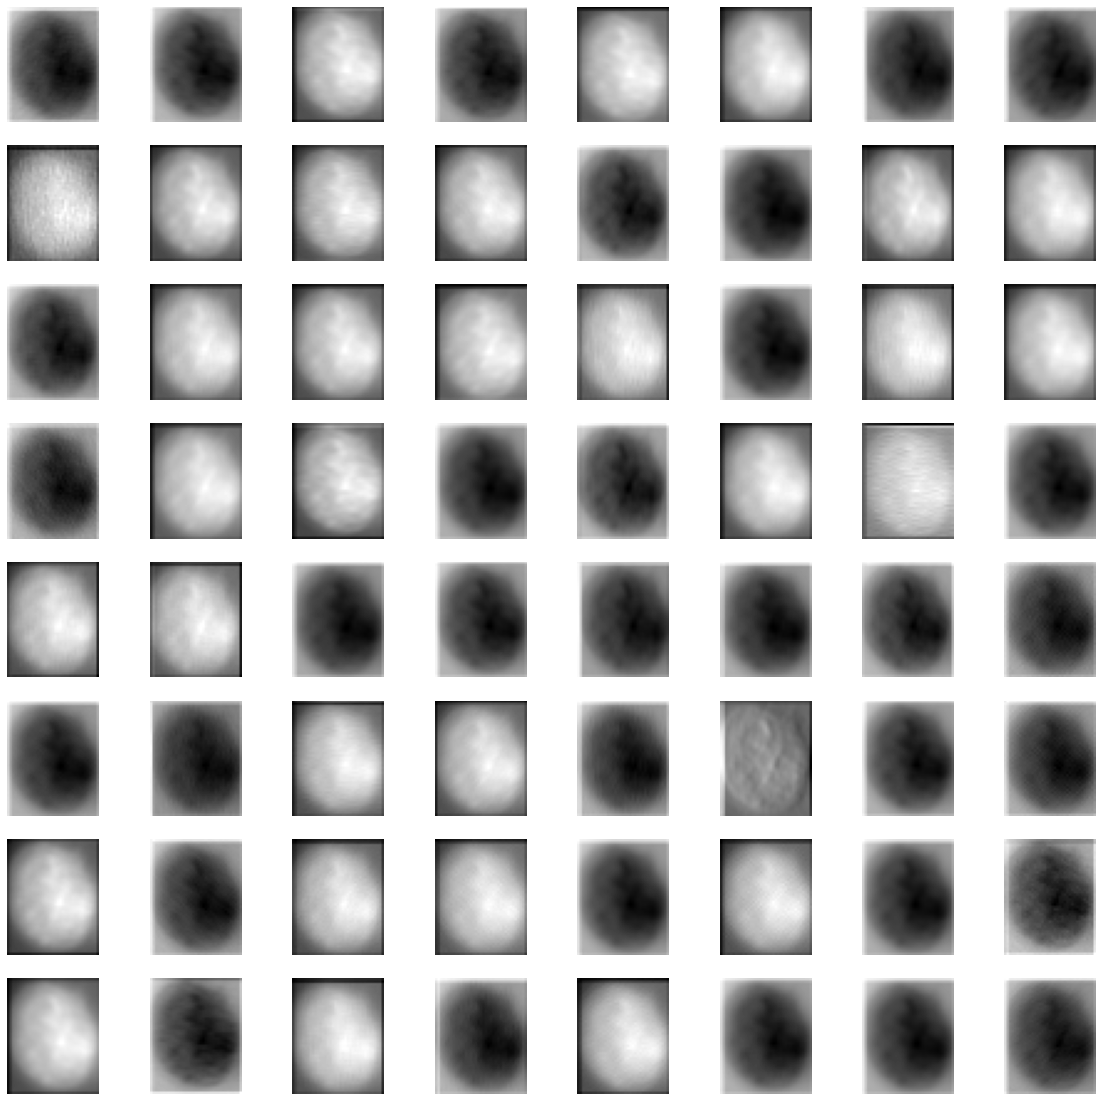

bn1  :  torch.Size([1, 64, 128, 128])


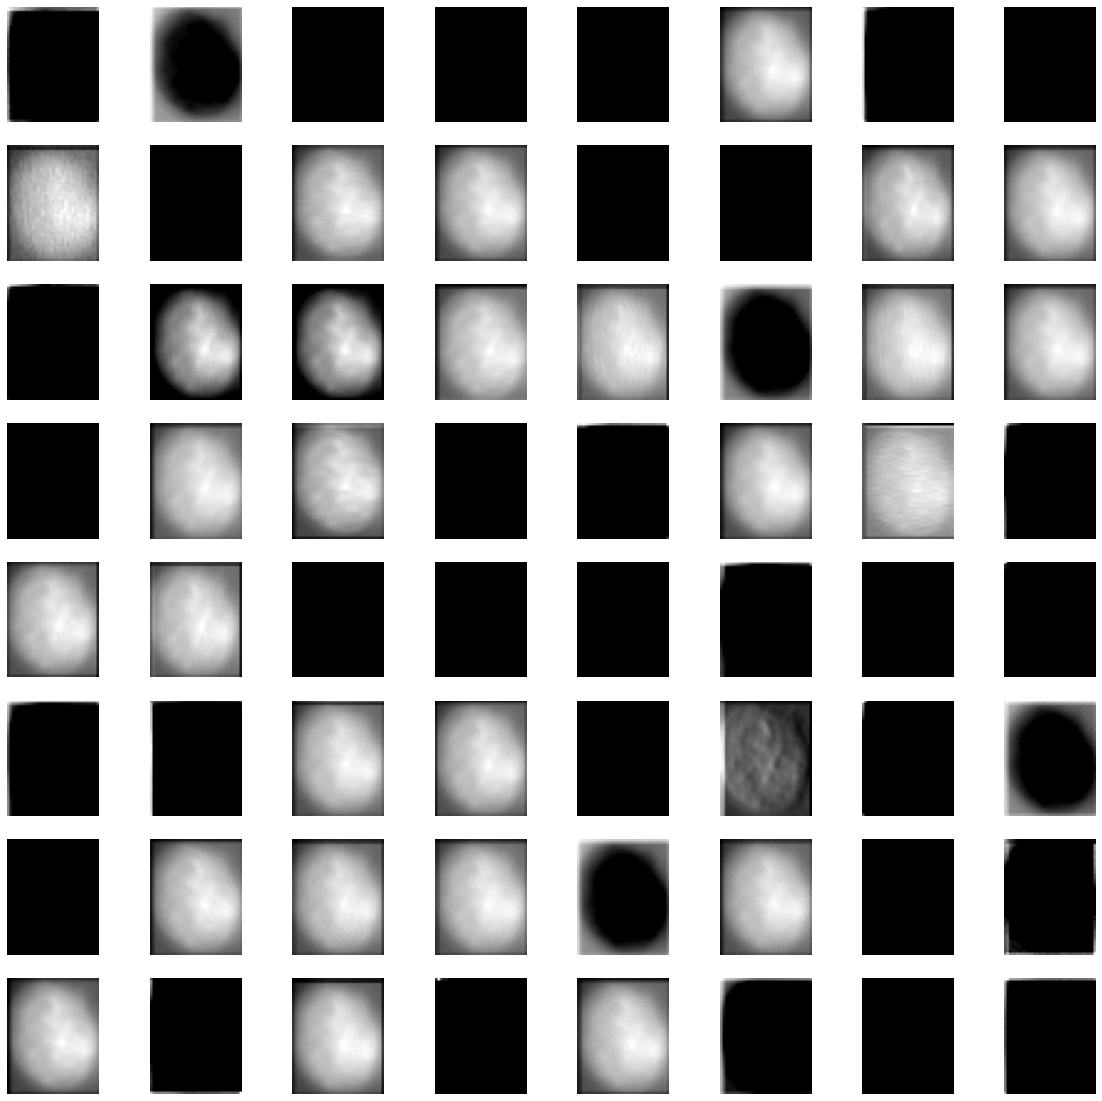

relu  :  torch.Size([1, 64, 128, 128])


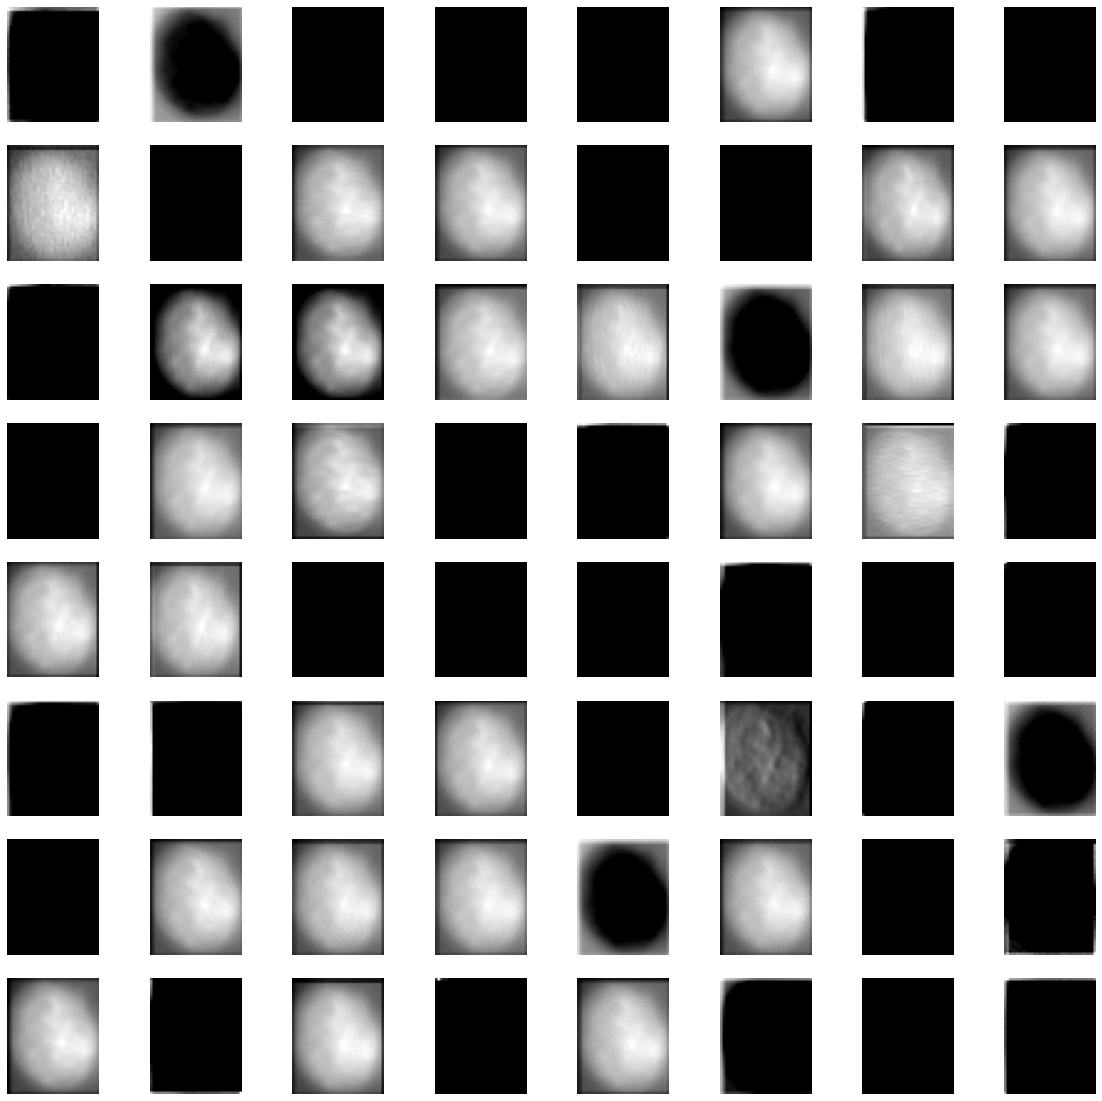

maxpool  :  torch.Size([1, 64, 64, 64])


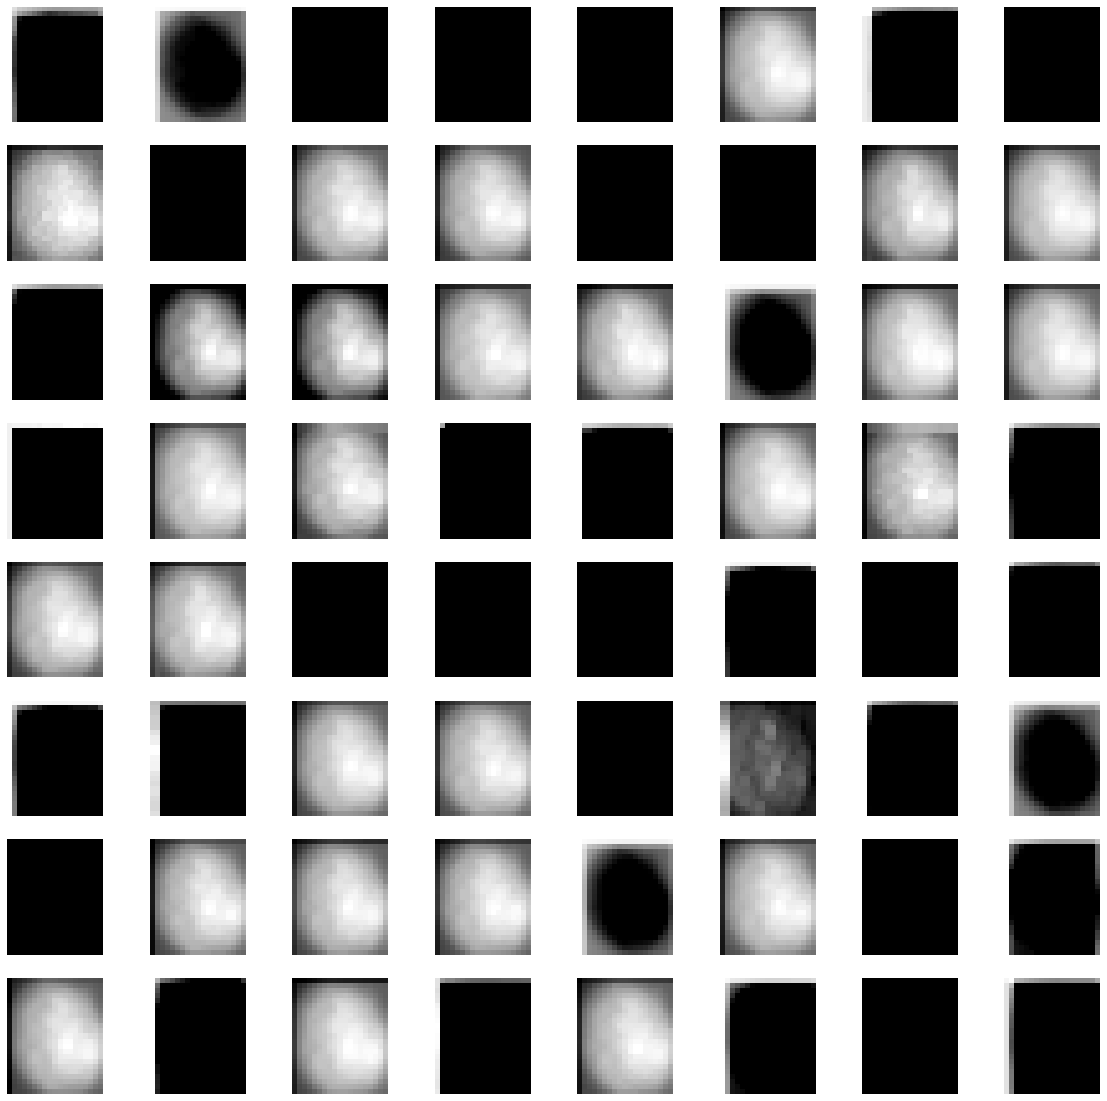

layer1.0.conv1  :  torch.Size([1, 64, 64, 64])


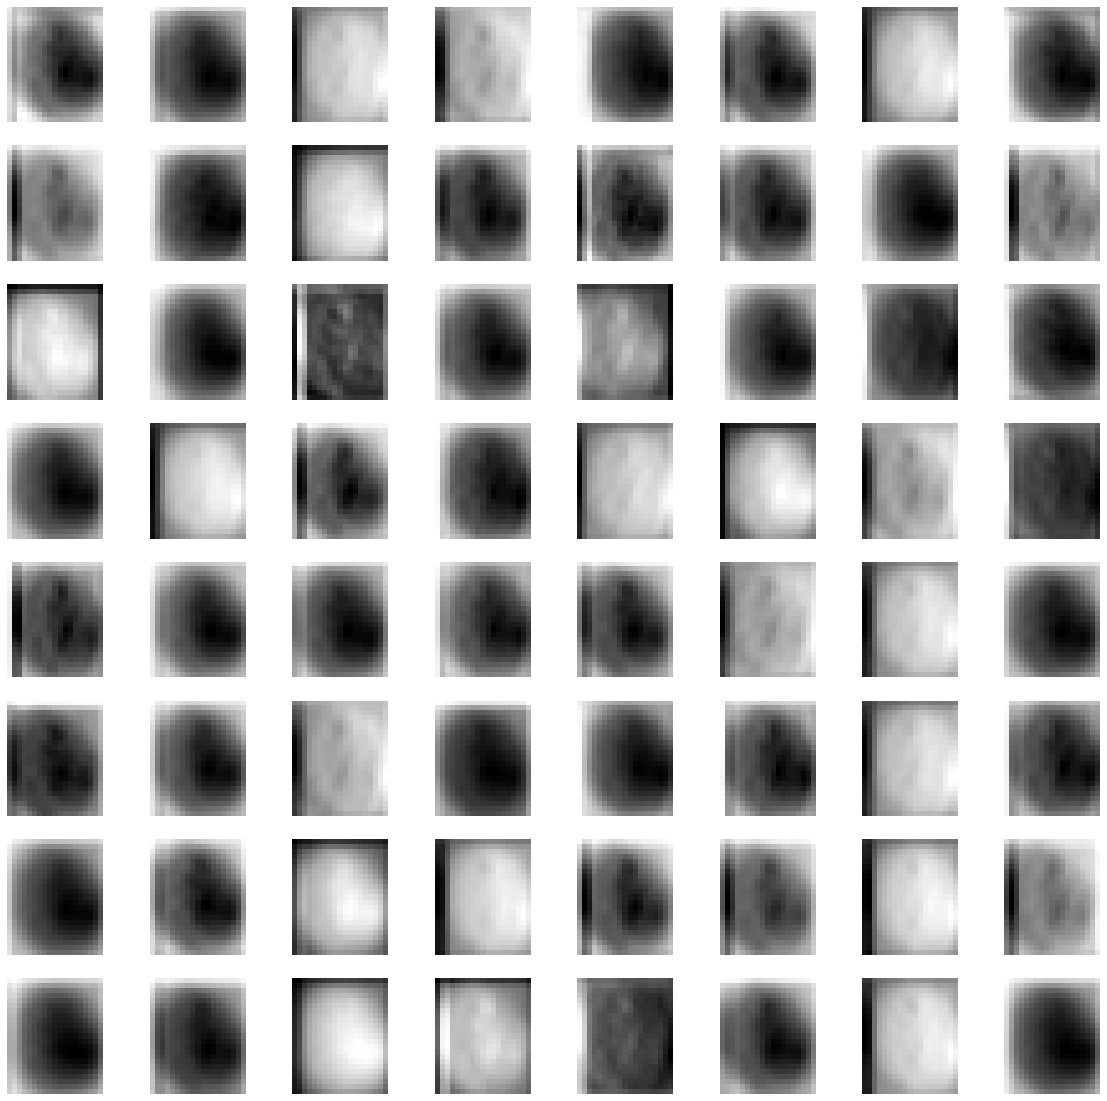

layer1.0.bn1  :  torch.Size([1, 64, 64, 64])


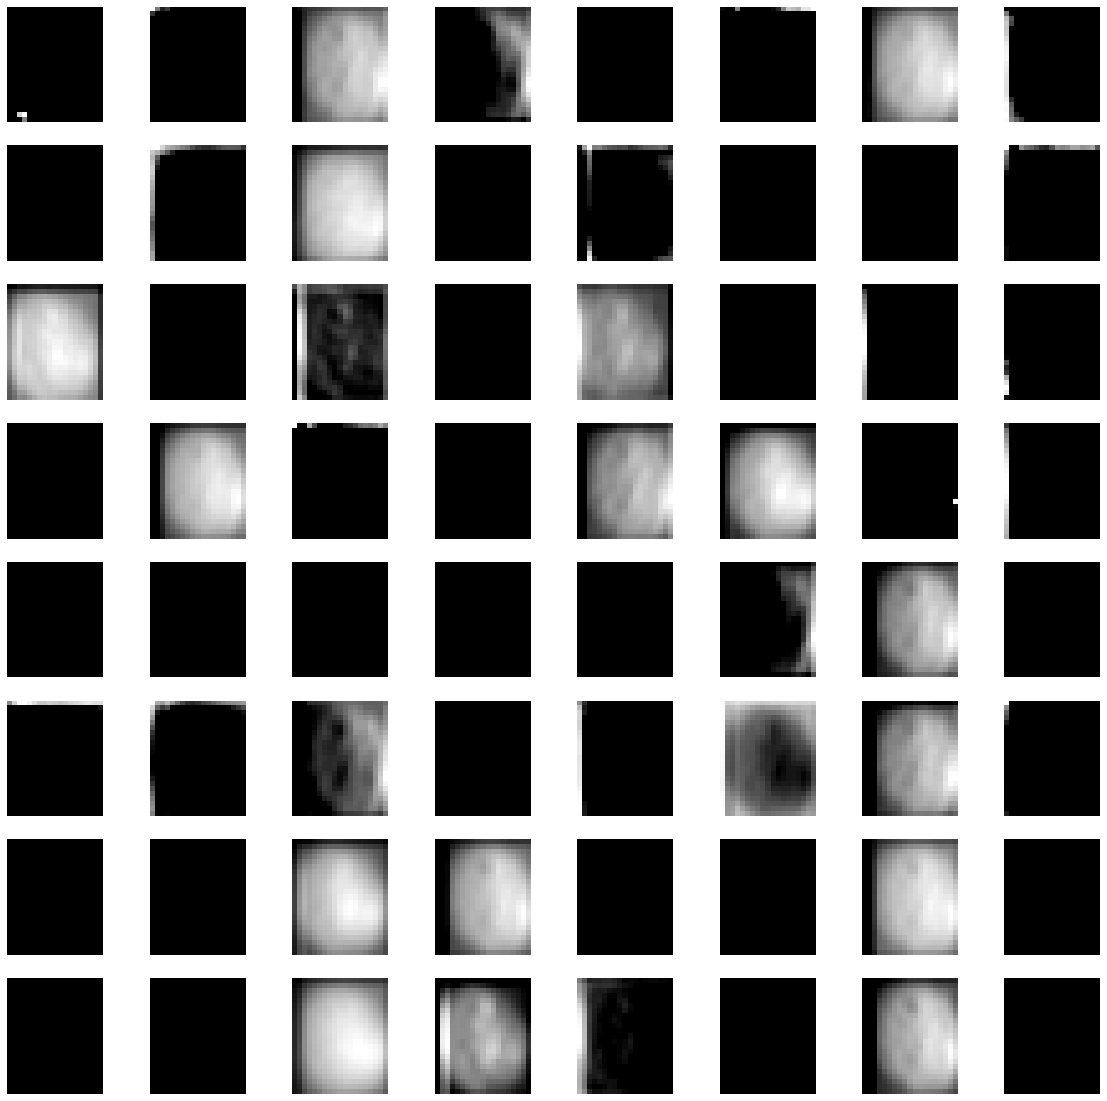

layer1.0.relu  :  torch.Size([1, 64, 64, 64])


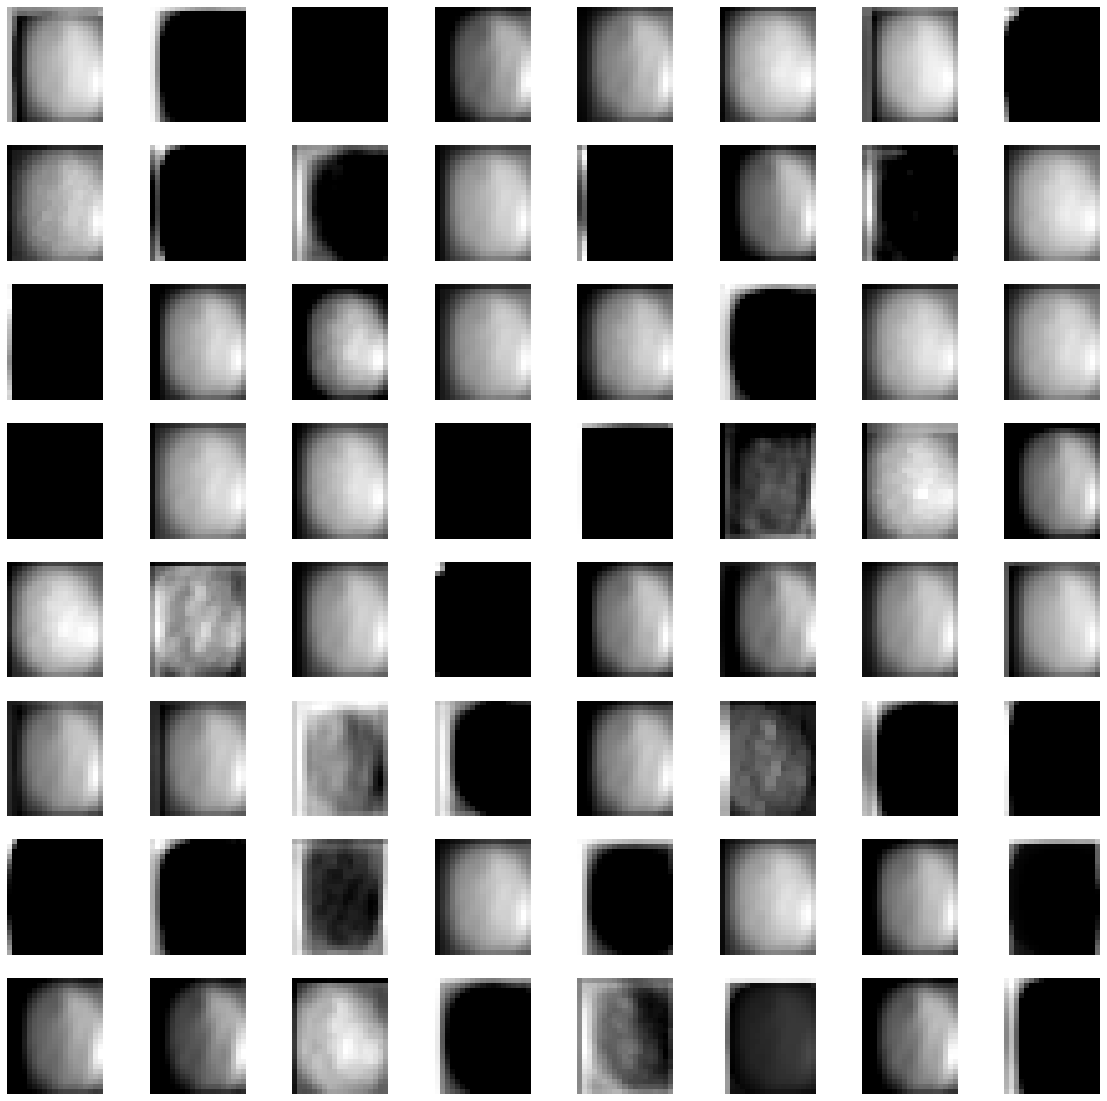

layer1.0.conv2  :  torch.Size([1, 64, 64, 64])


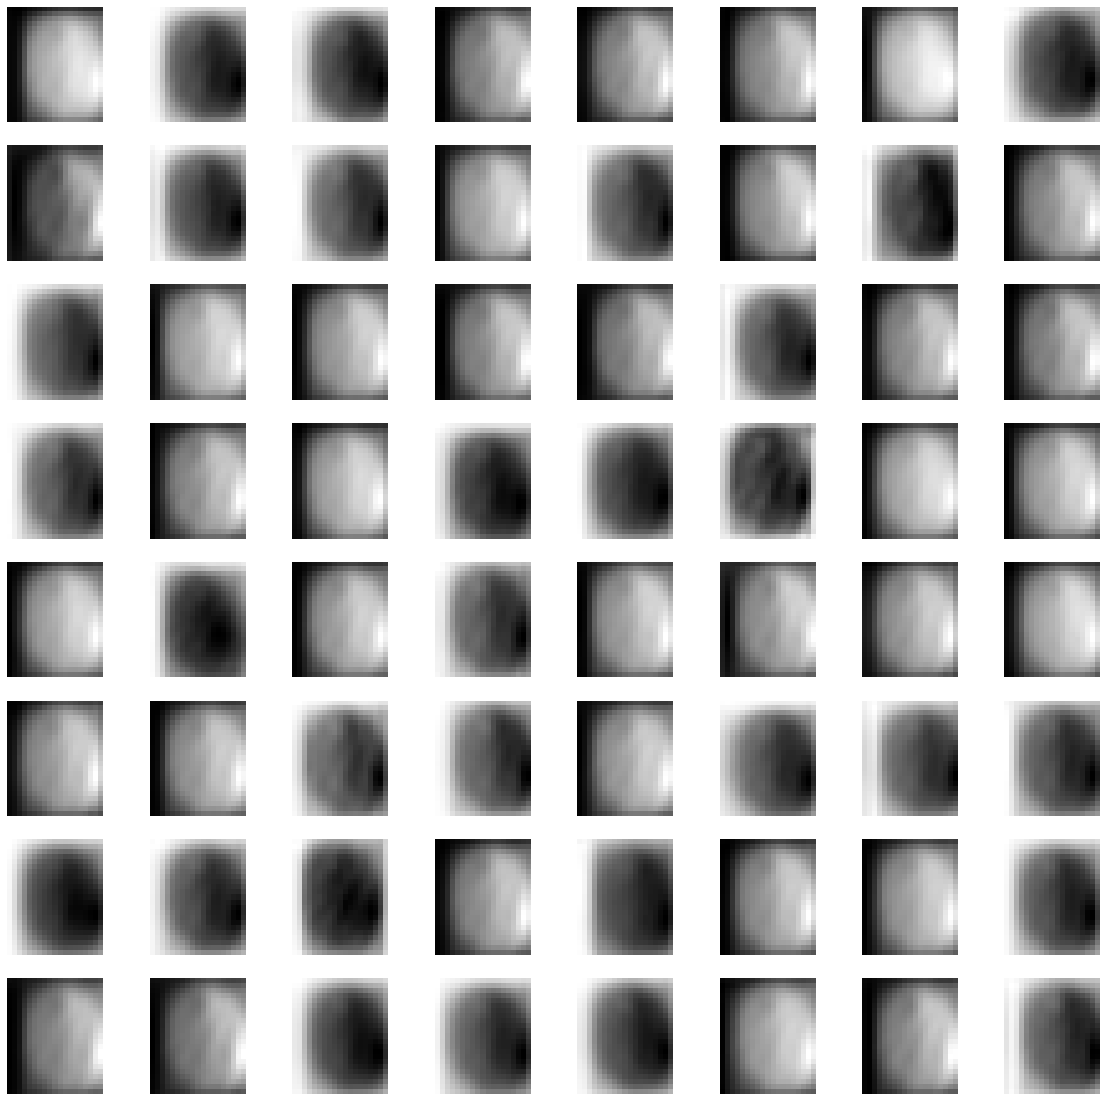

layer1.0.bn2  :  torch.Size([1, 64, 64, 64])


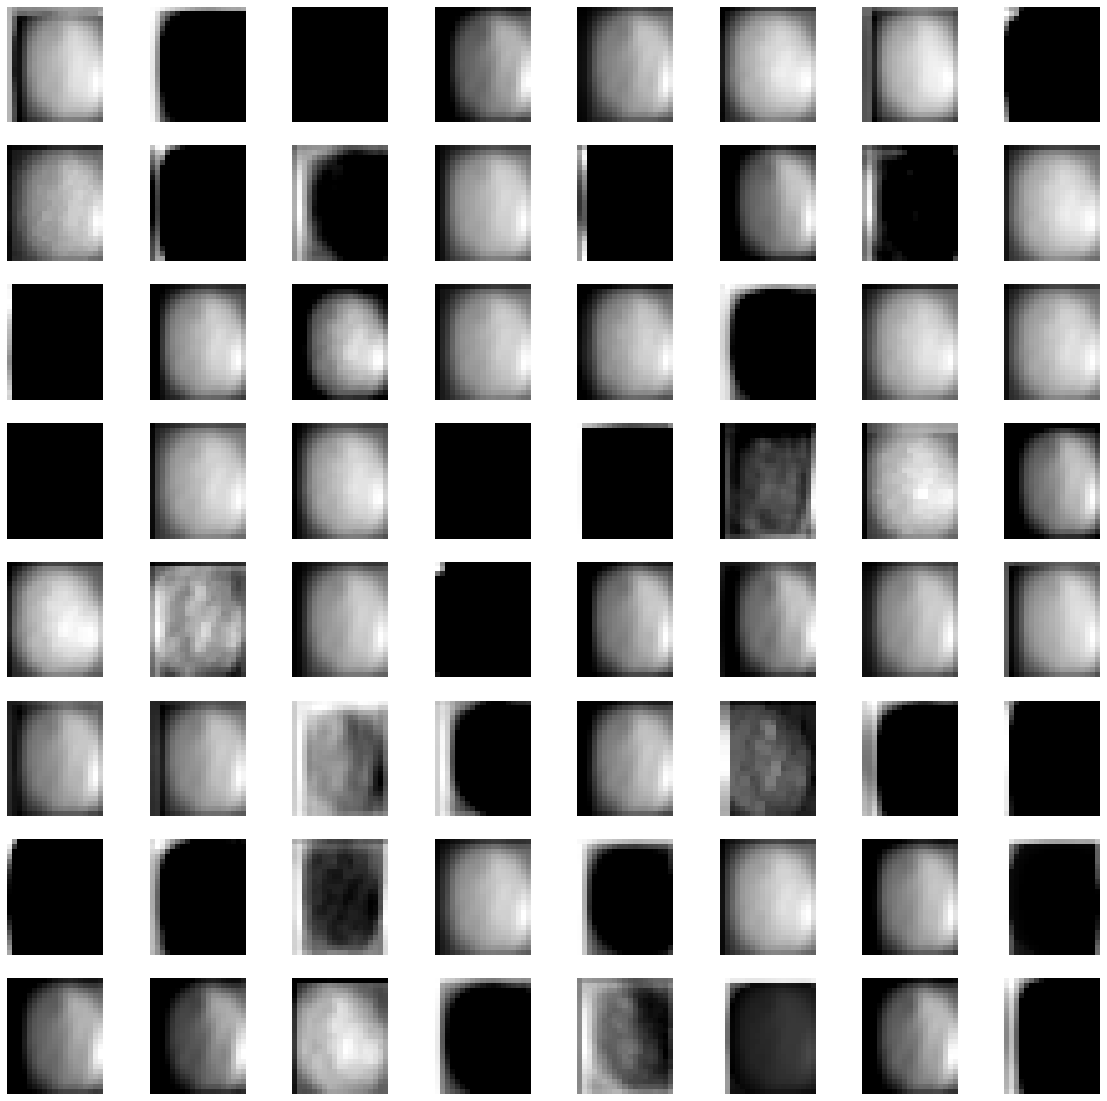

layer1.0  :  torch.Size([1, 64, 64, 64])


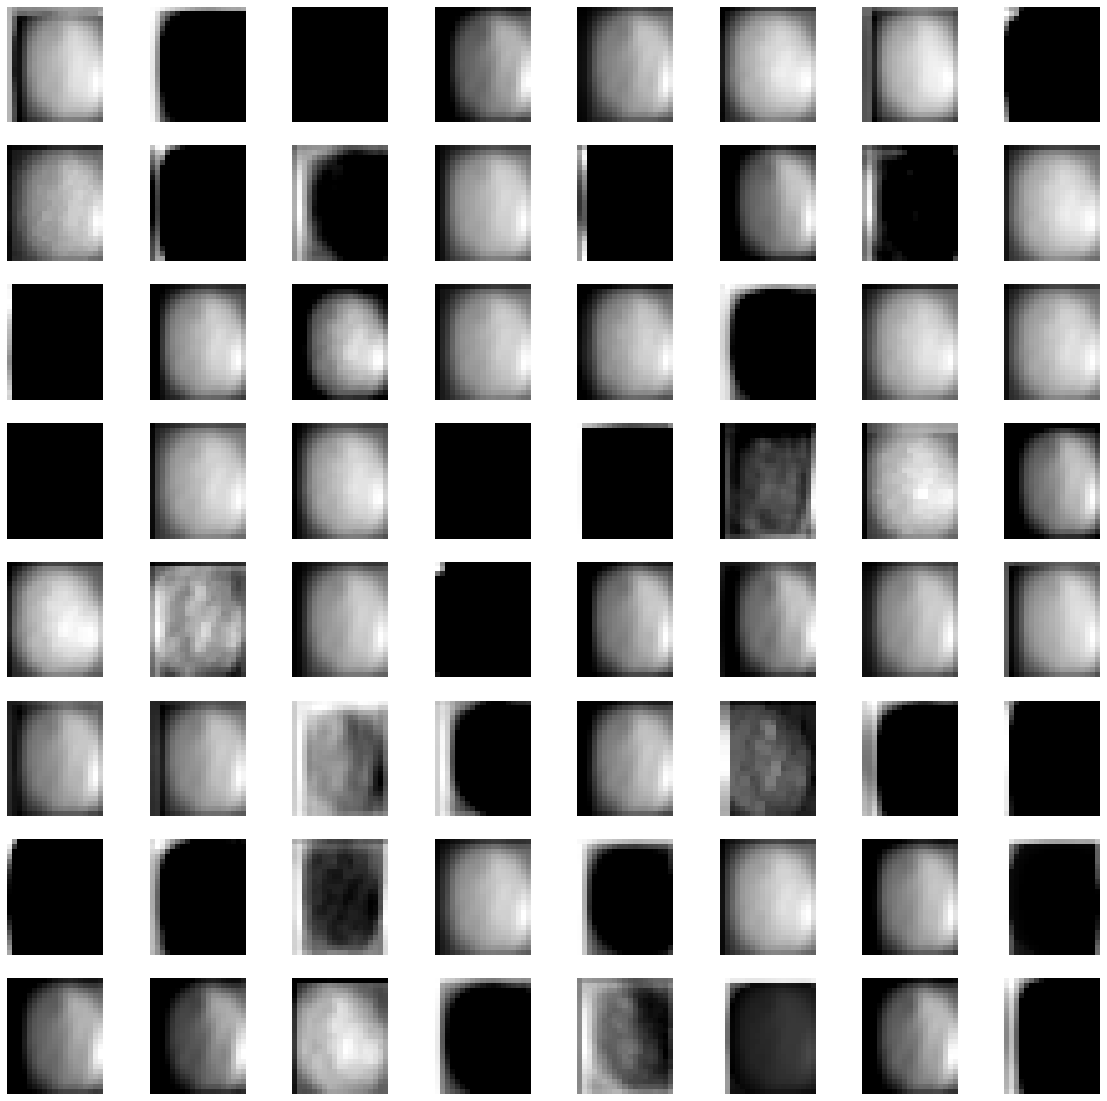

layer1.1.conv1  :  torch.Size([1, 64, 64, 64])


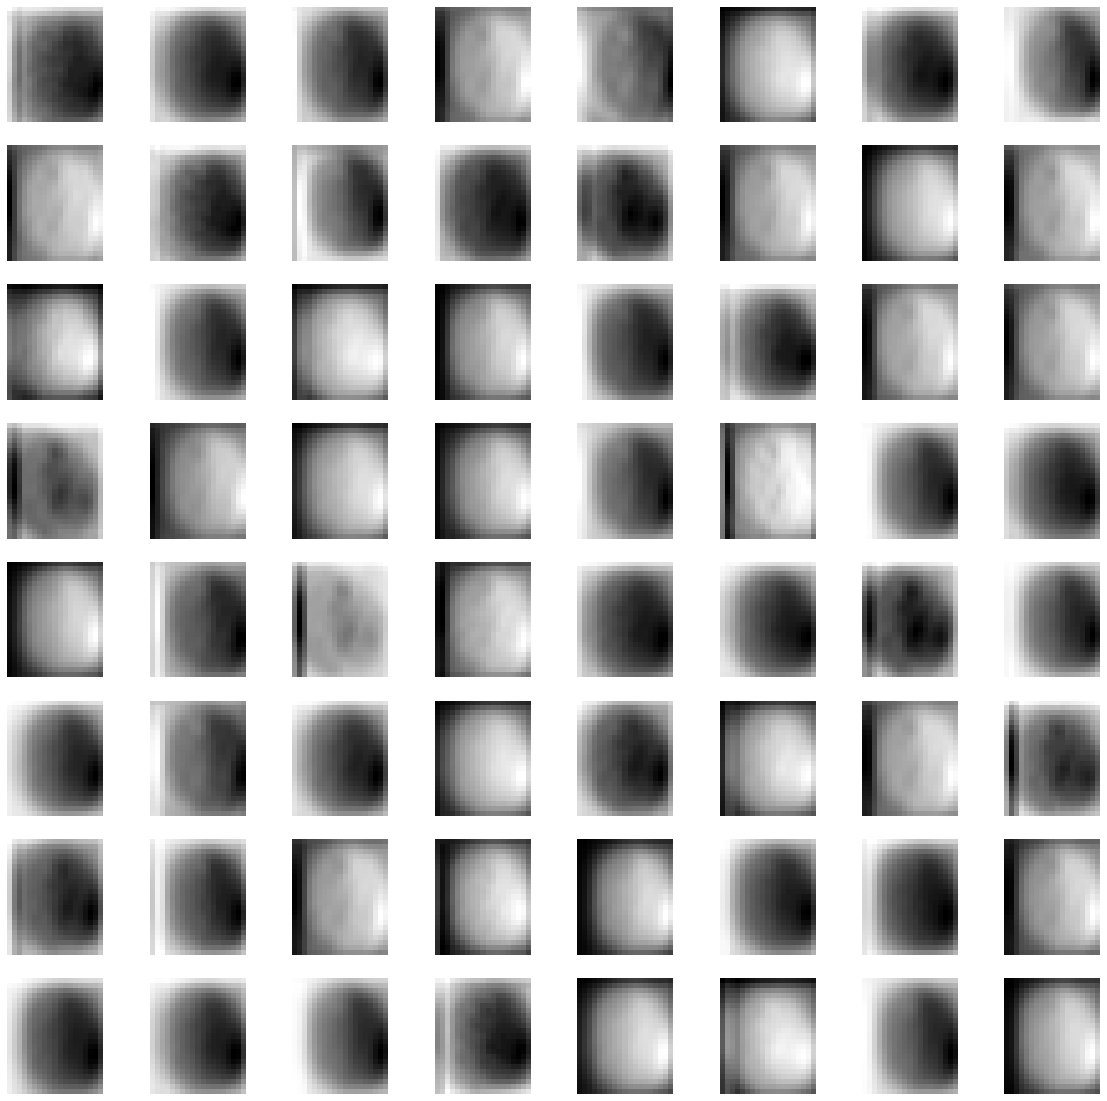

layer1.1.bn1  :  torch.Size([1, 64, 64, 64])


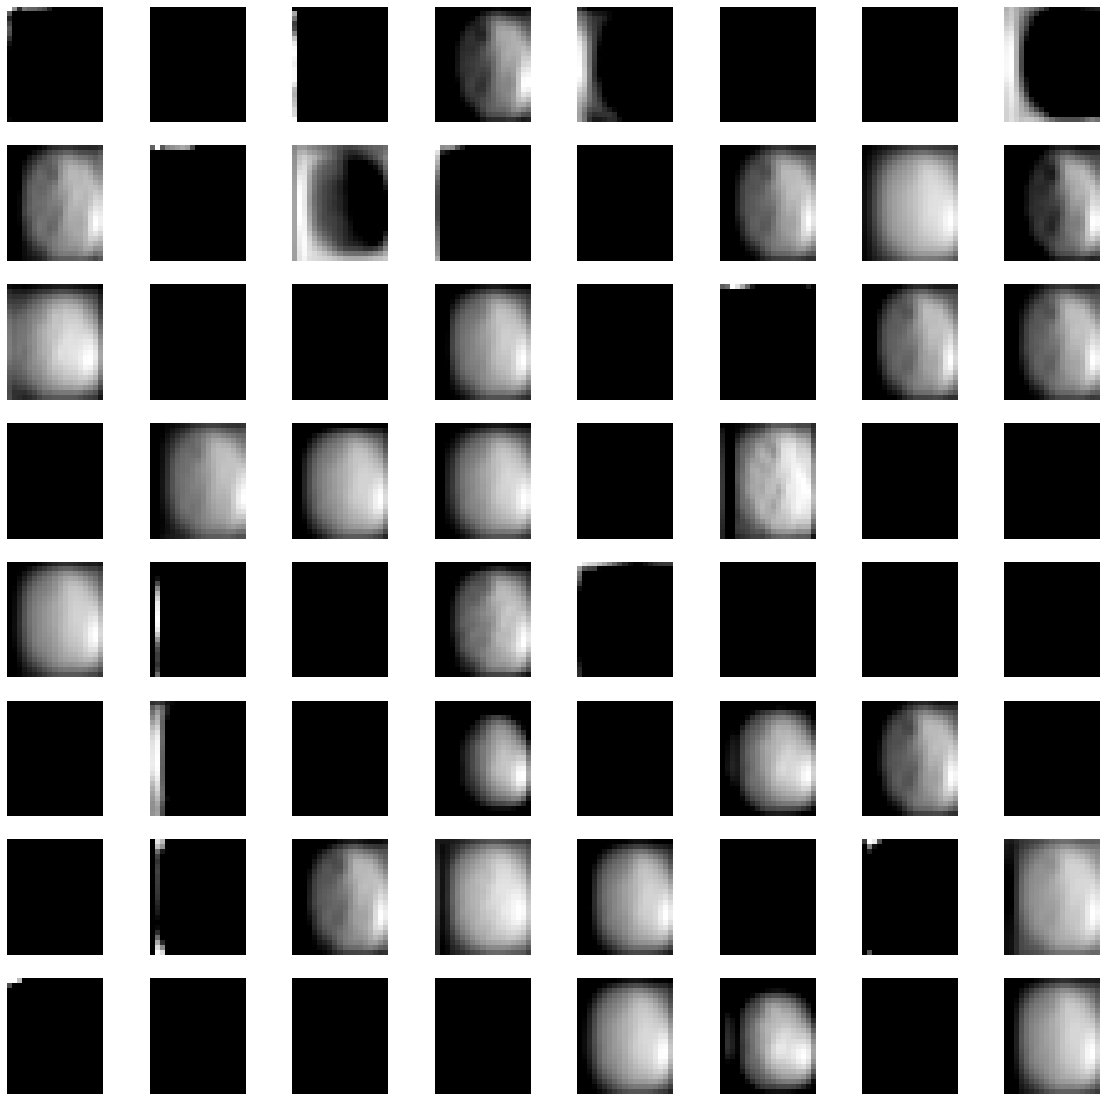

layer1.1.relu  :  torch.Size([1, 64, 64, 64])


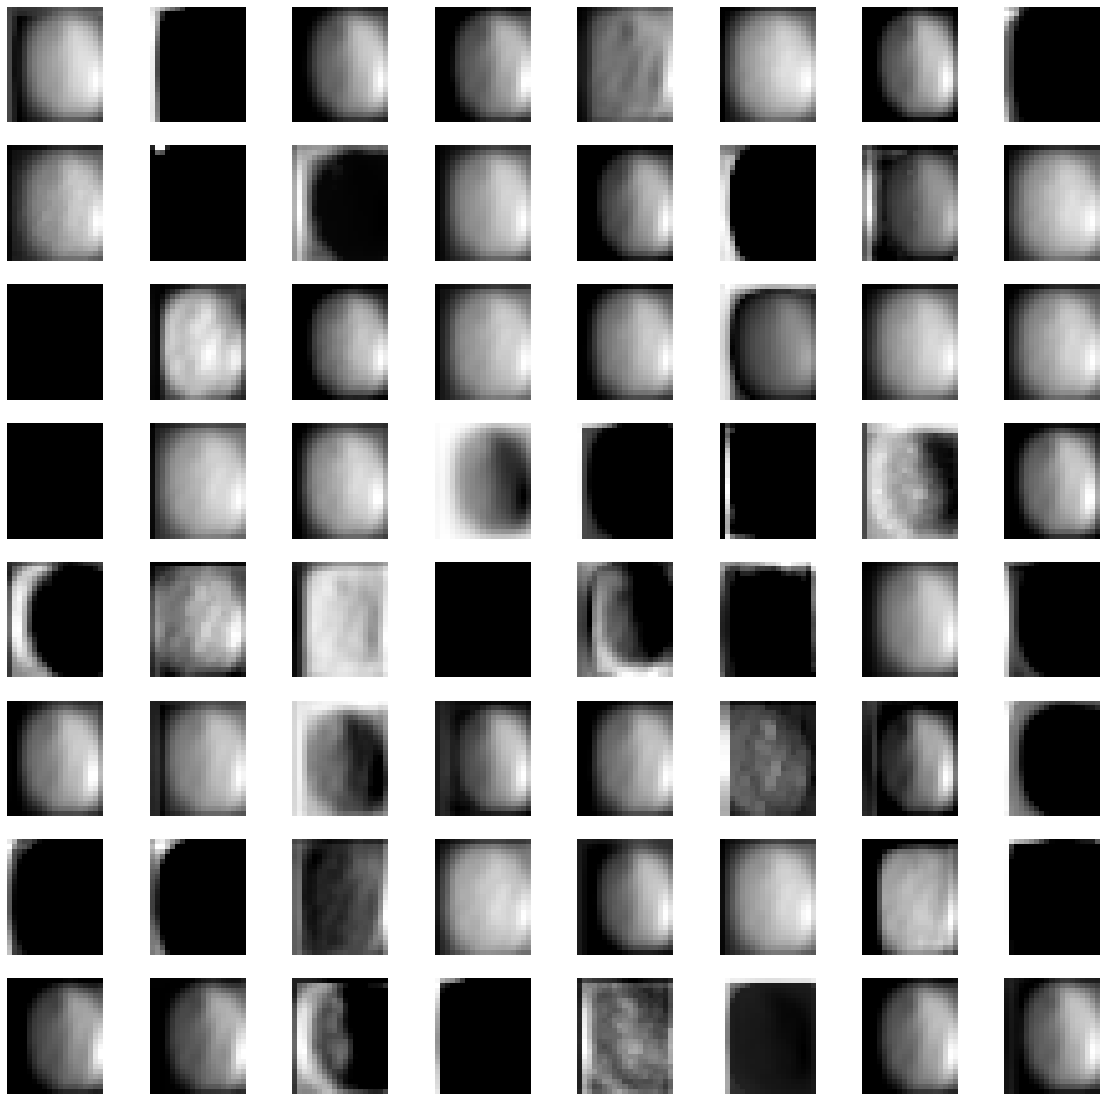

layer1.1.conv2  :  torch.Size([1, 64, 64, 64])


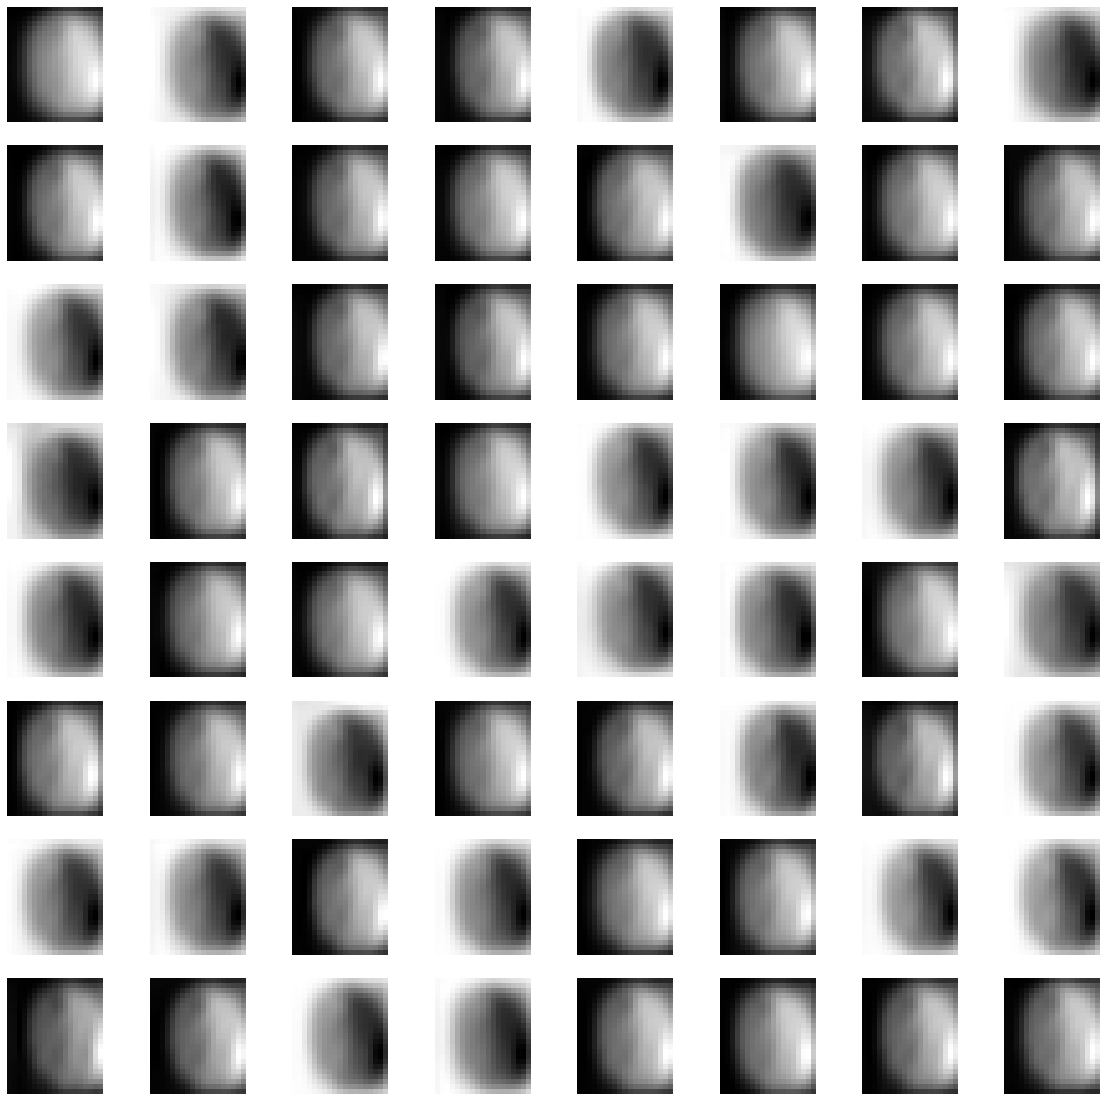

layer1.1.bn2  :  torch.Size([1, 64, 64, 64])


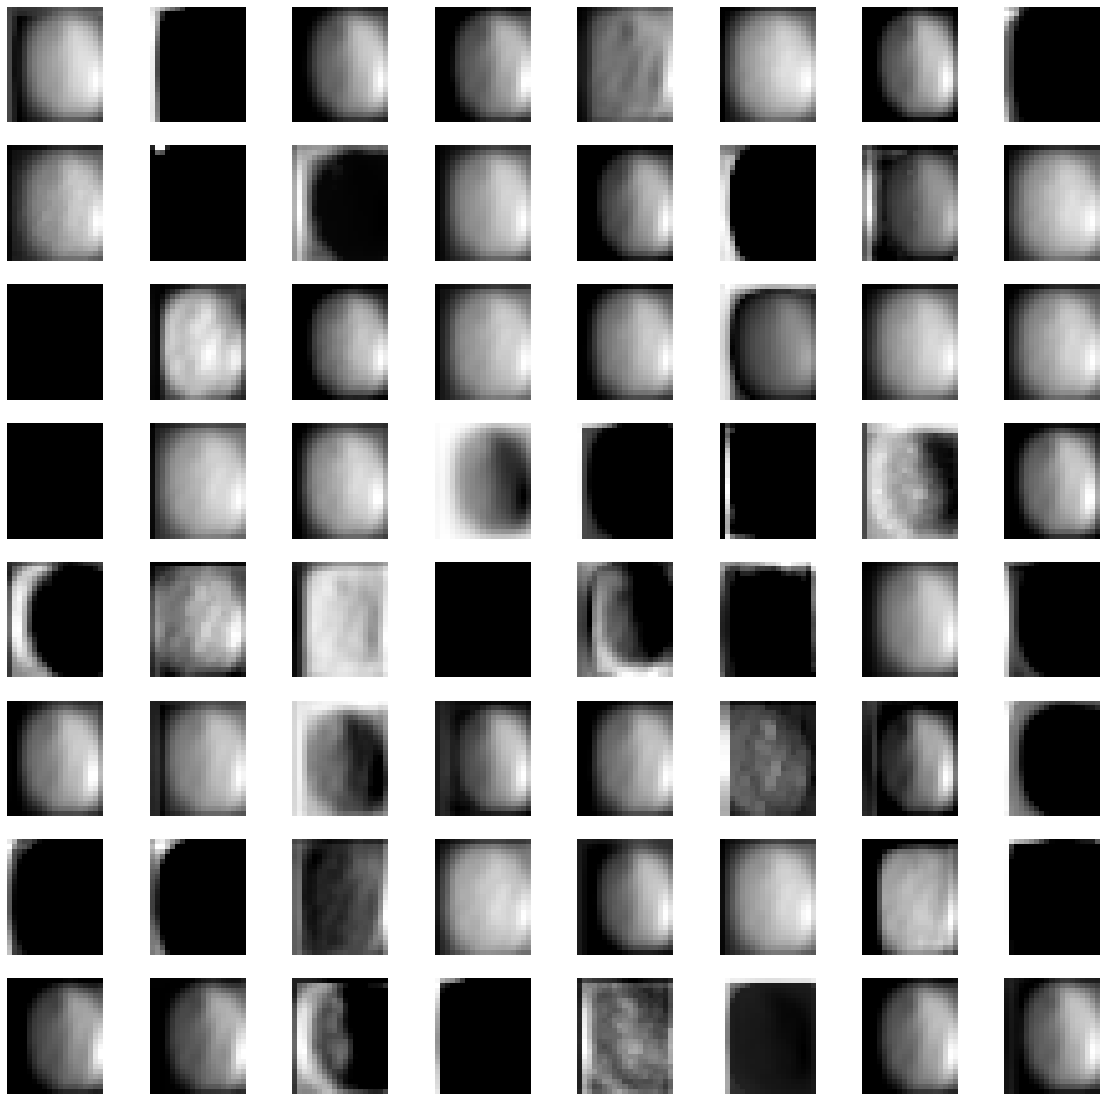

layer1.1  :  torch.Size([1, 64, 64, 64])


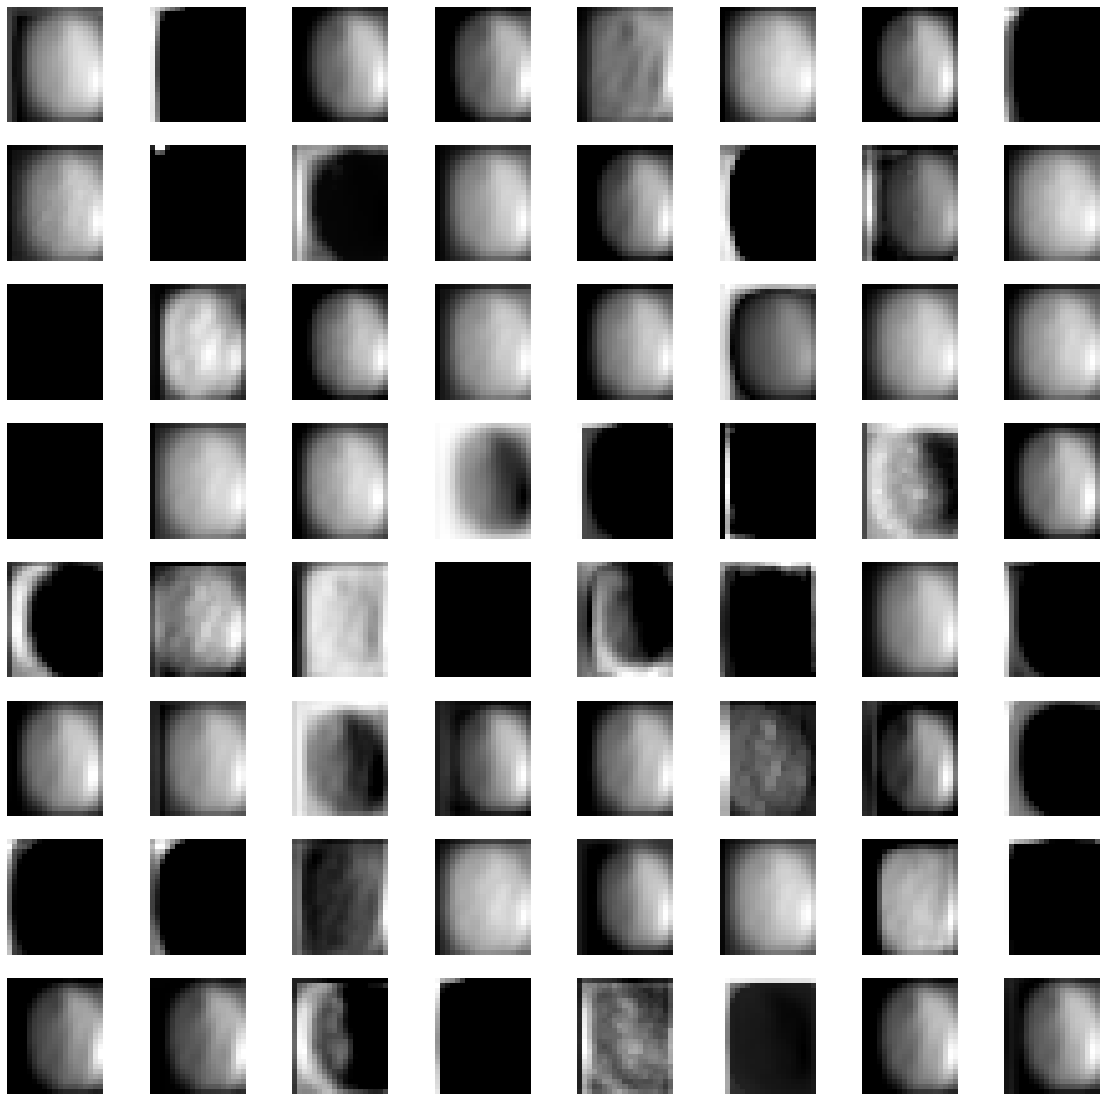

layer1  :  torch.Size([1, 64, 64, 64])


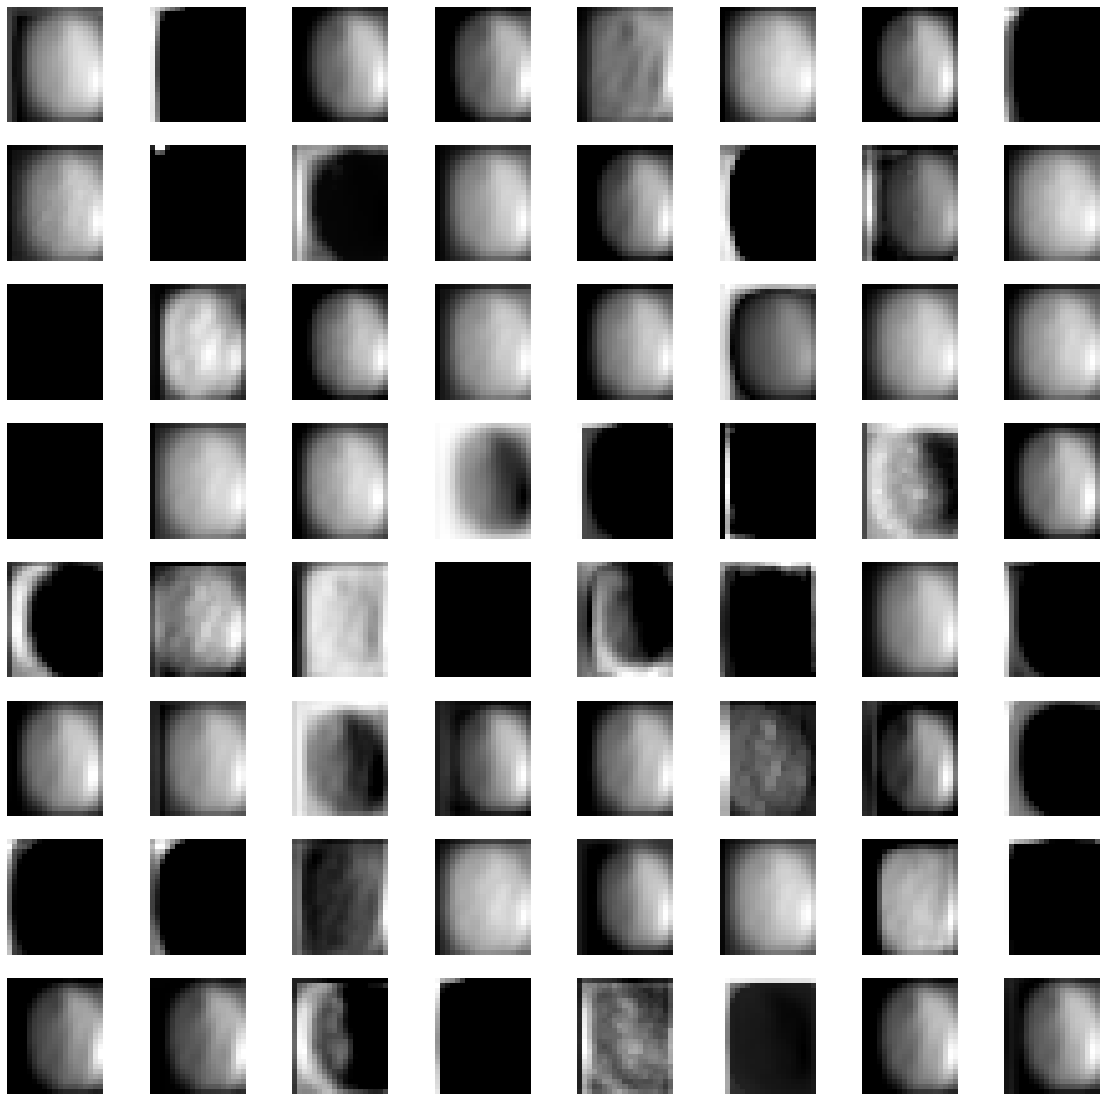

layer2.0.conv1  :  torch.Size([1, 128, 32, 32])


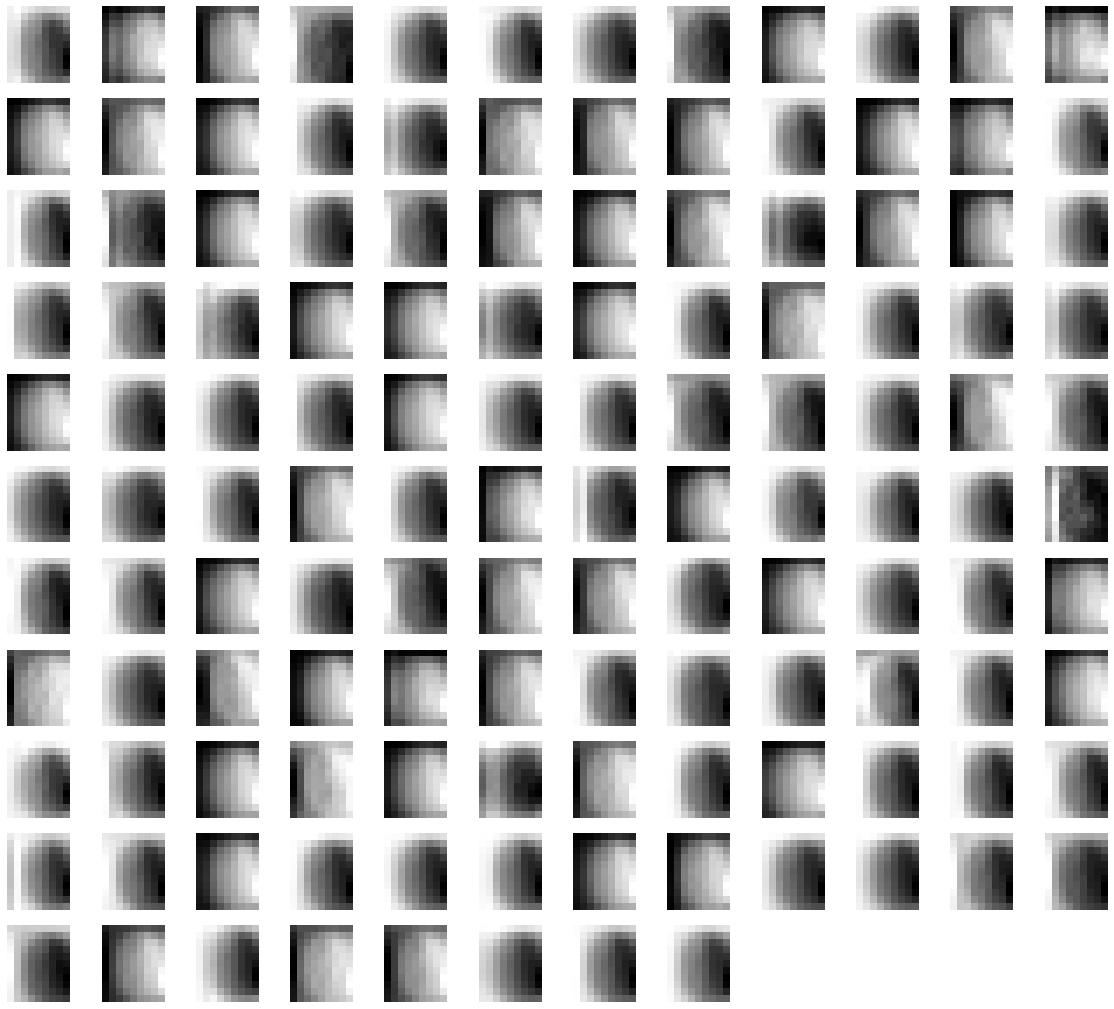

layer2.0.bn1  :  torch.Size([1, 128, 32, 32])


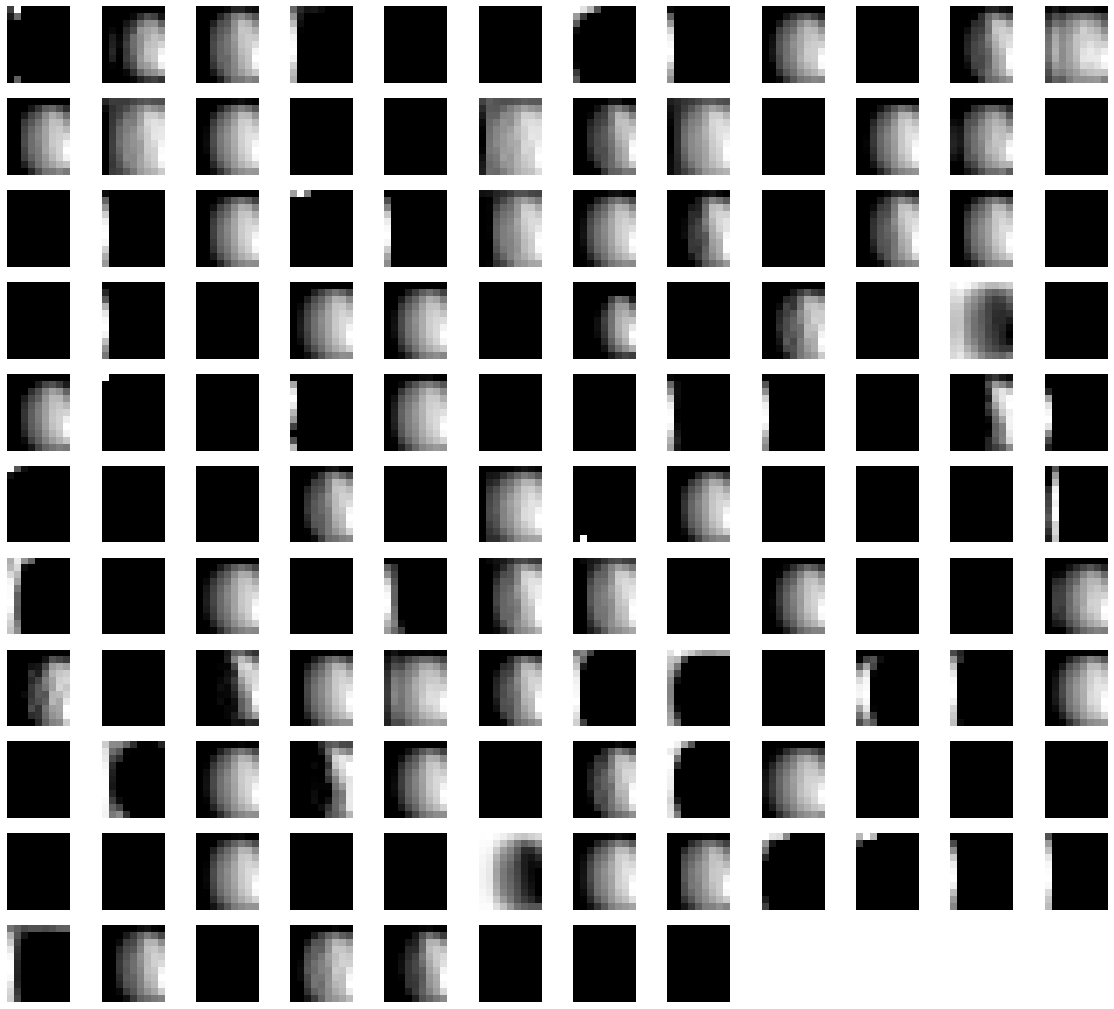

layer2.0.relu  :  torch.Size([1, 128, 32, 32])


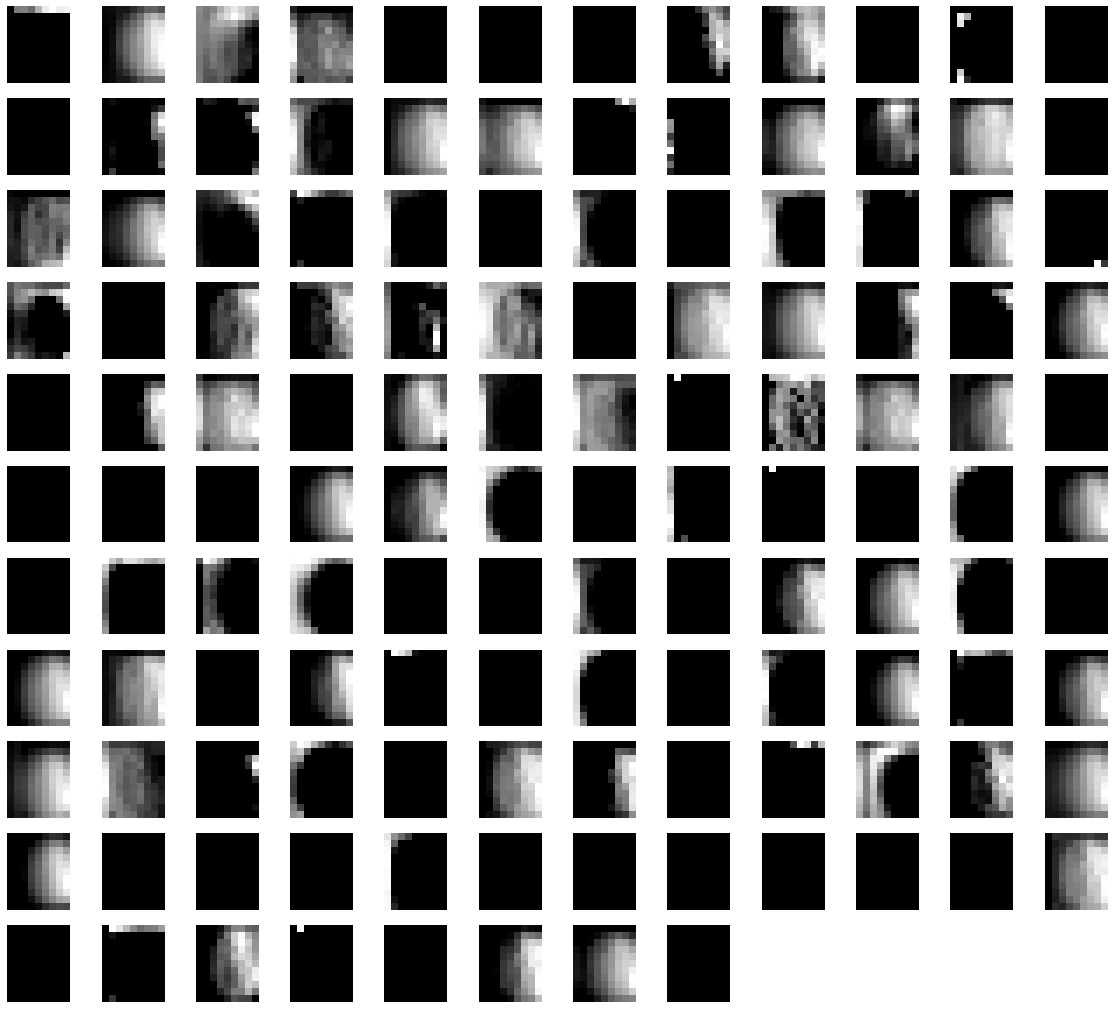

layer2.0.conv2  :  torch.Size([1, 128, 32, 32])


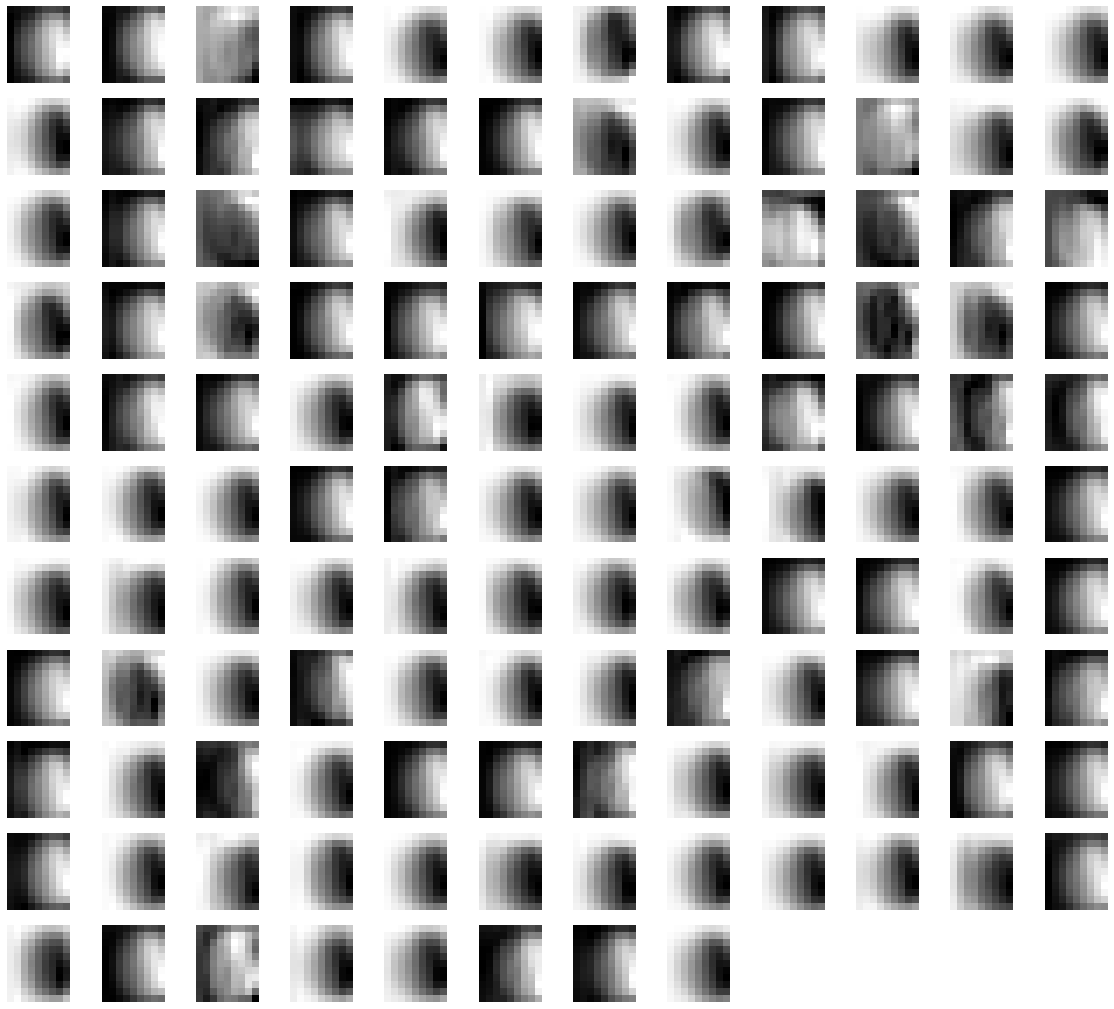

layer2.0.bn2  :  torch.Size([1, 128, 32, 32])


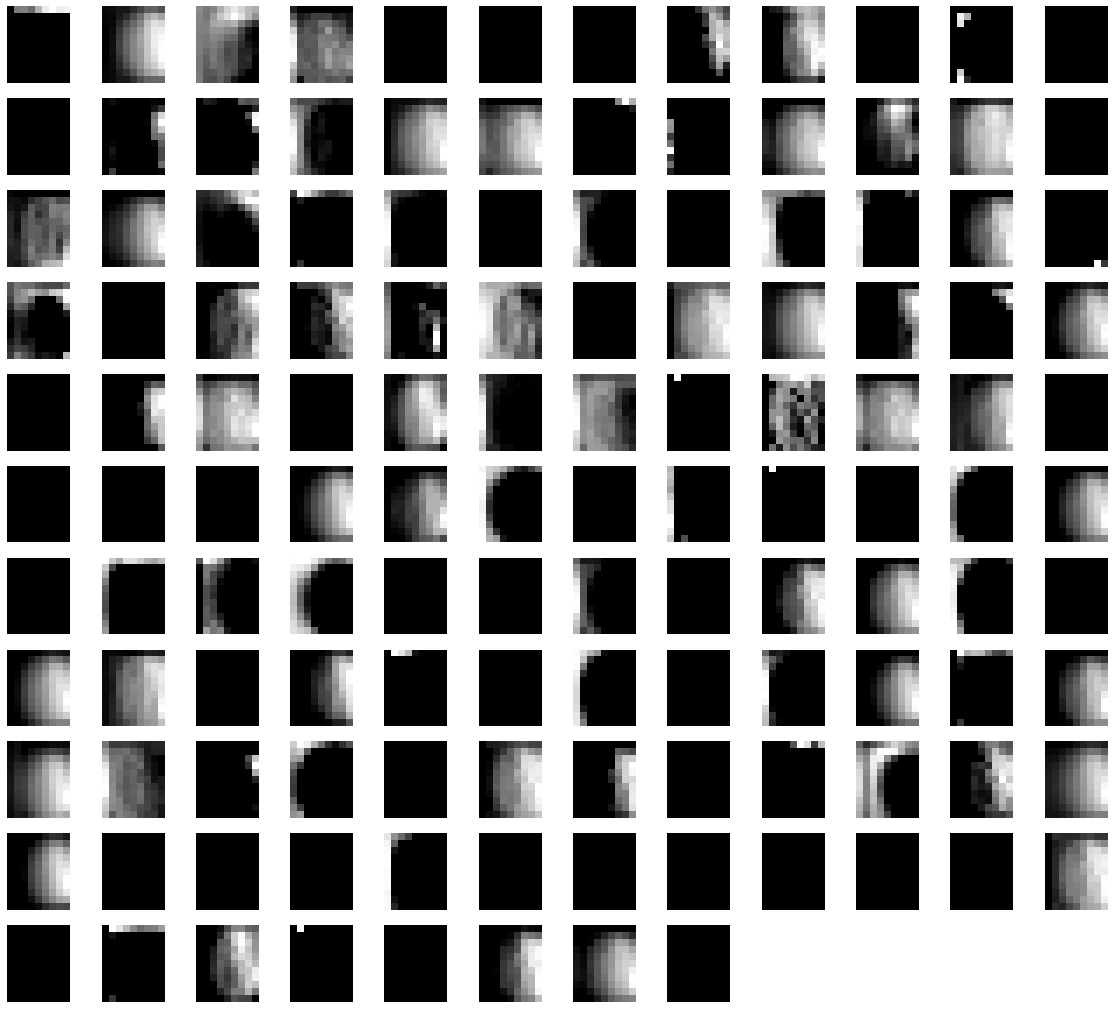

layer2.0.downsample.0  :  torch.Size([1, 128, 32, 32])


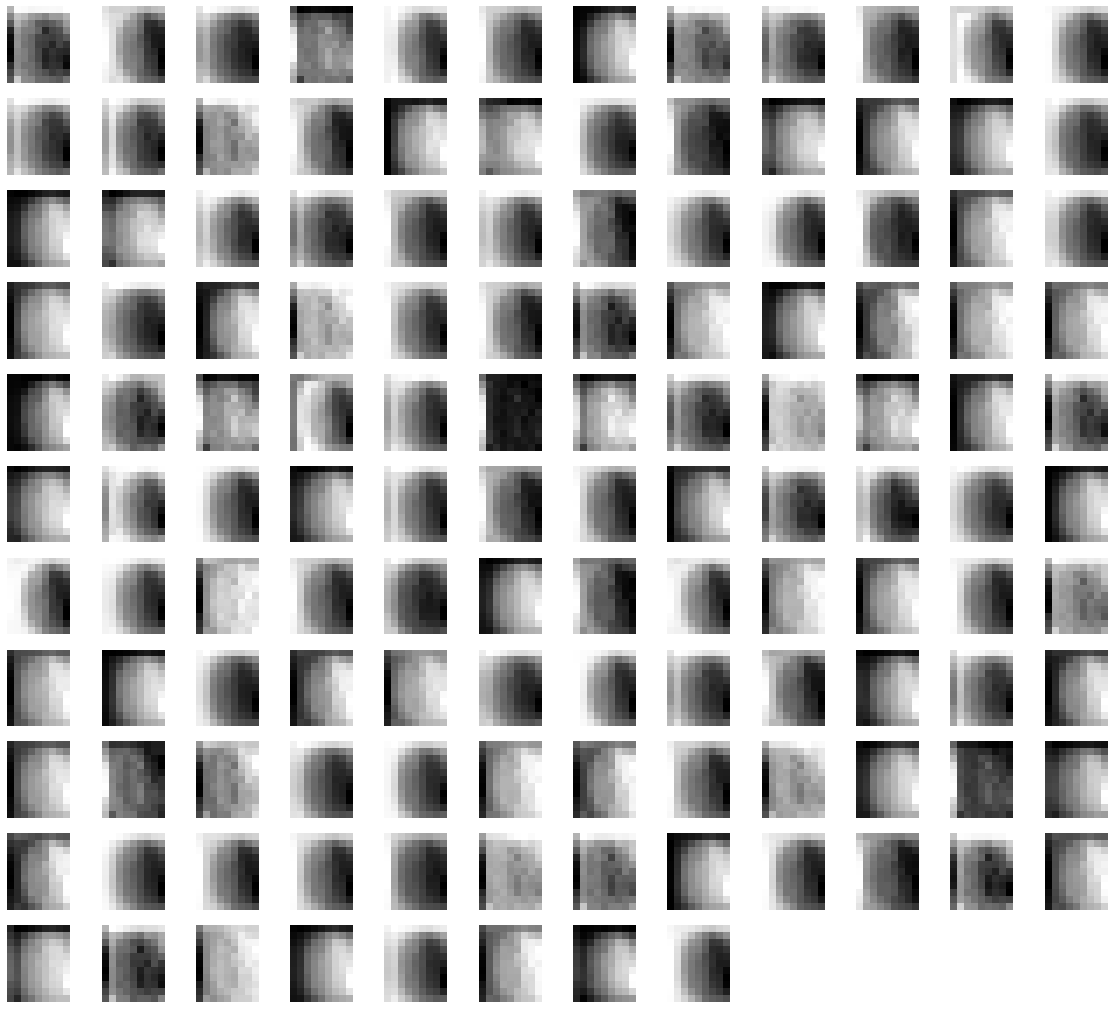

layer2.0.downsample.1  :  torch.Size([1, 128, 32, 32])


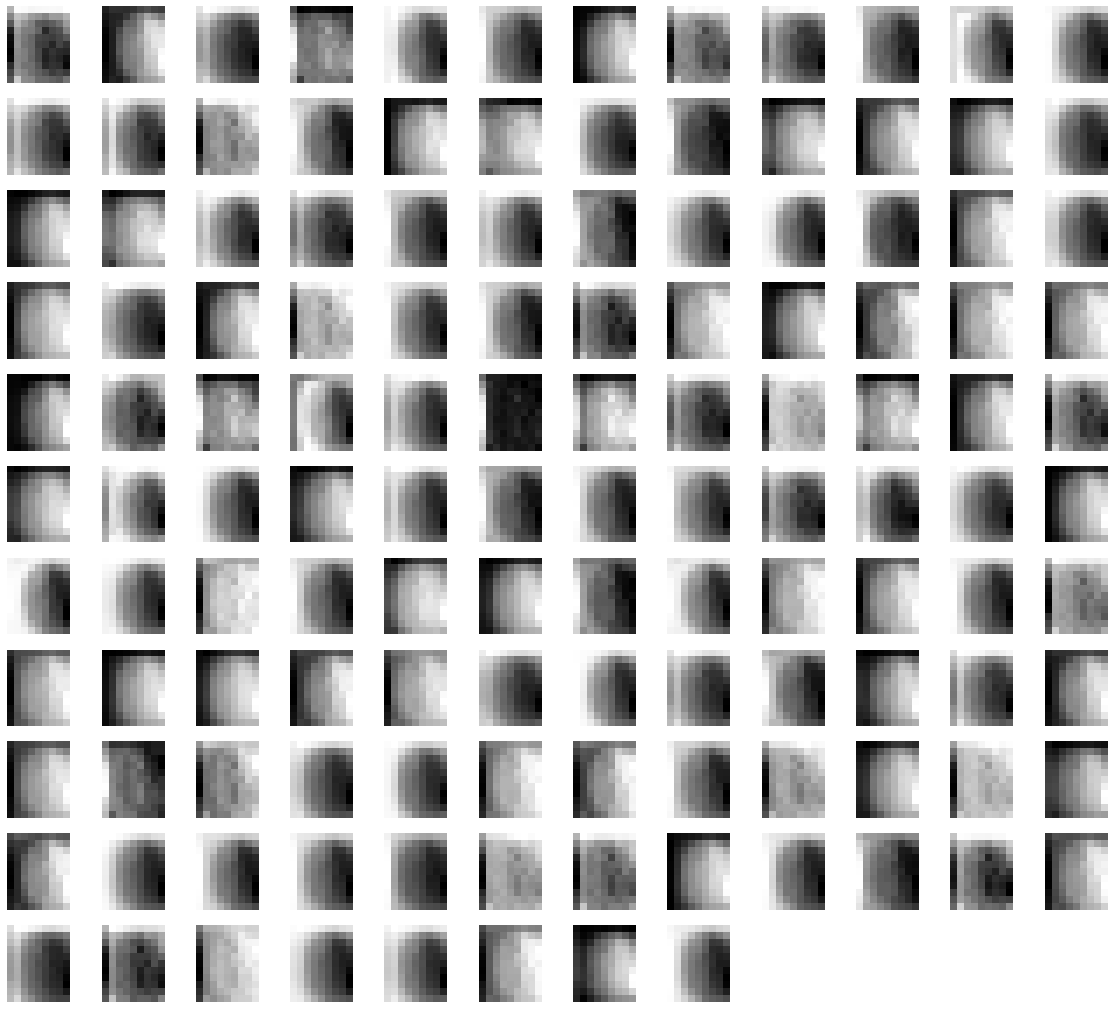

layer2.0.downsample  :  torch.Size([1, 128, 32, 32])


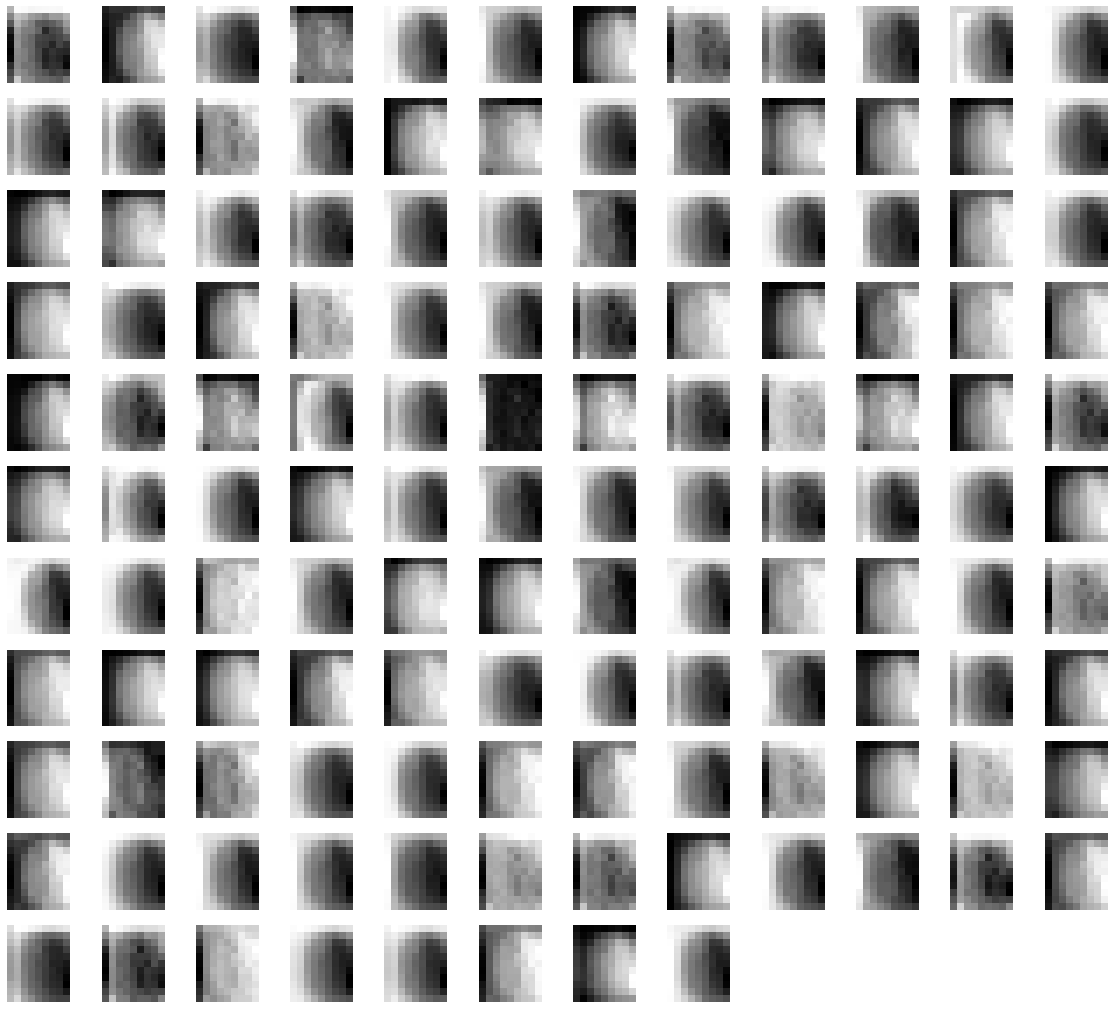

layer2.0  :  torch.Size([1, 128, 32, 32])


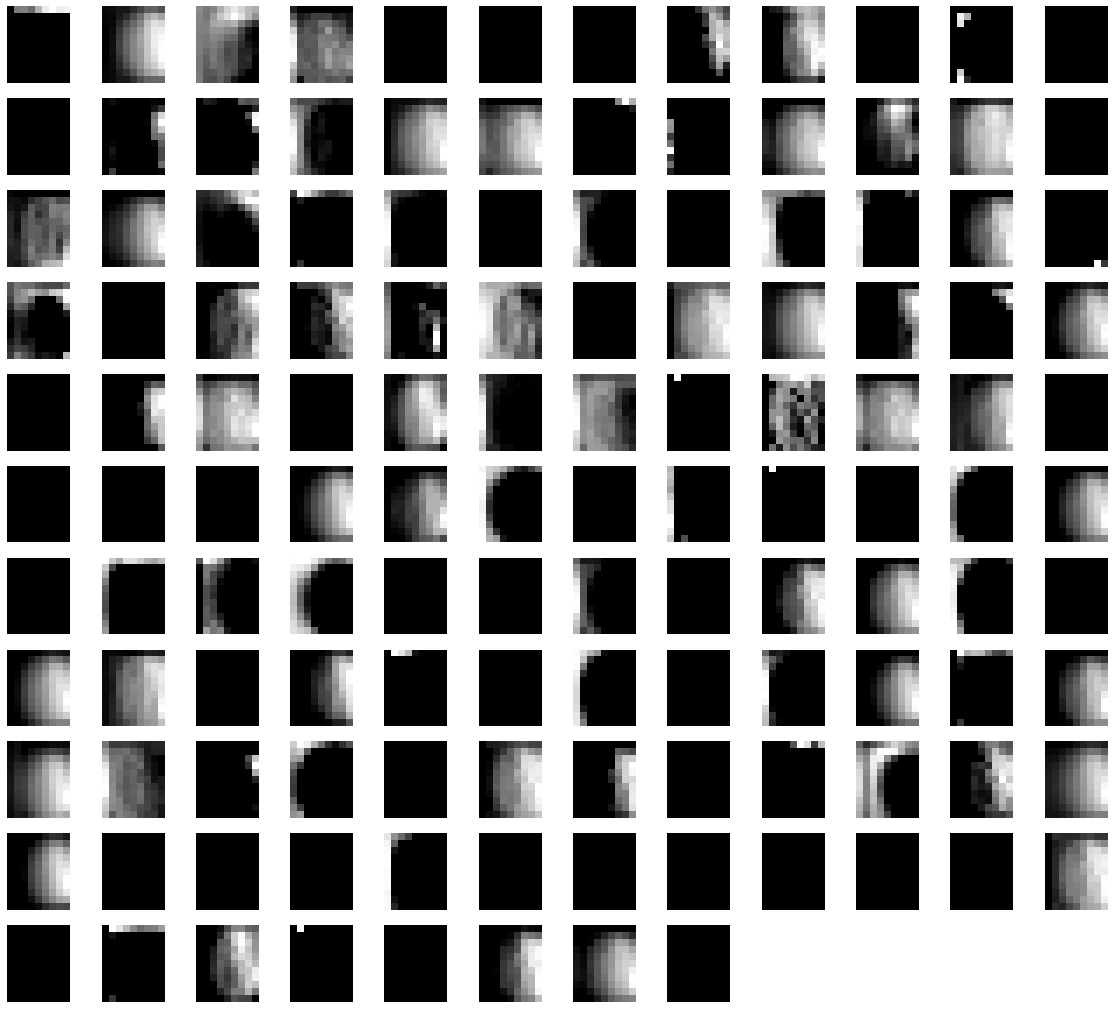

layer2.1.conv1  :  torch.Size([1, 128, 32, 32])


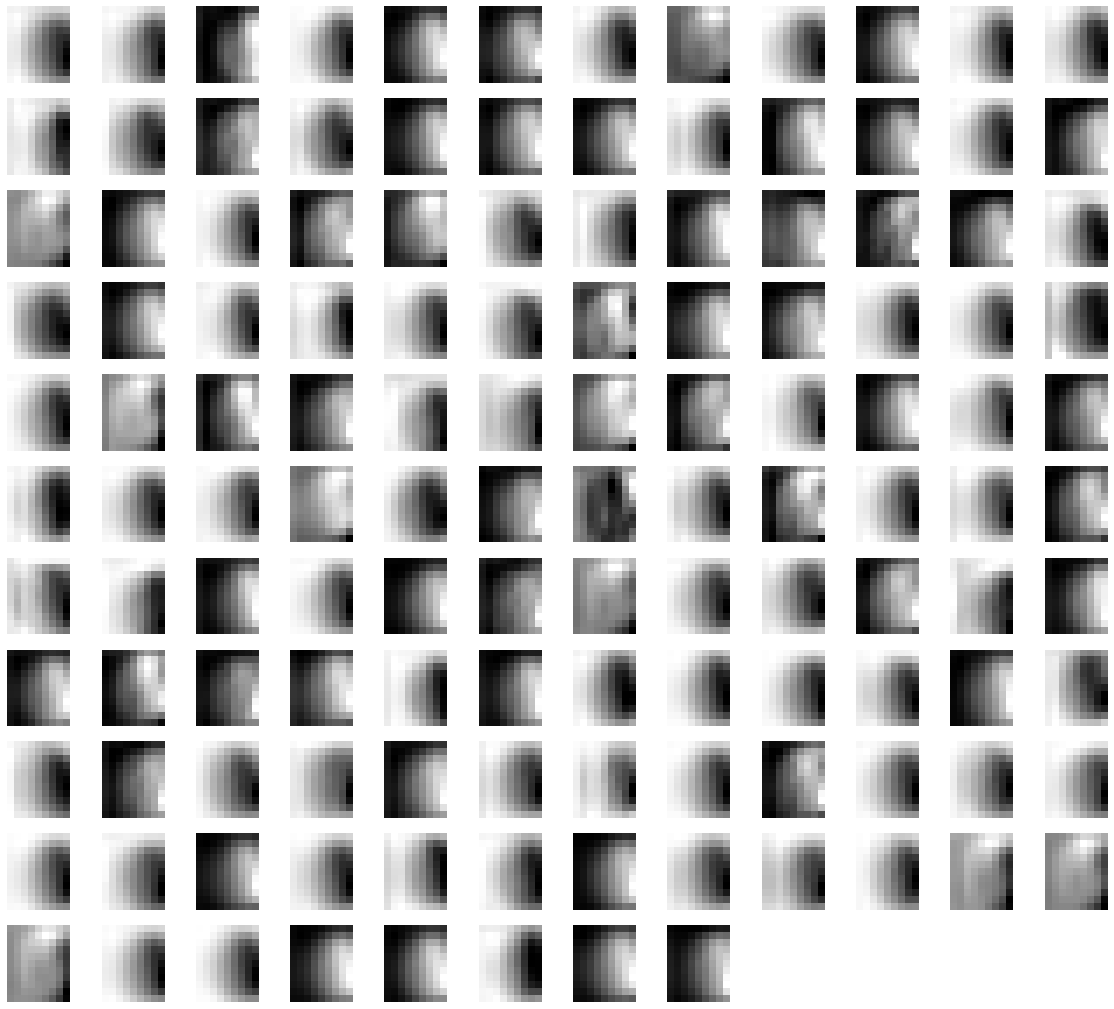

layer2.1.bn1  :  torch.Size([1, 128, 32, 32])


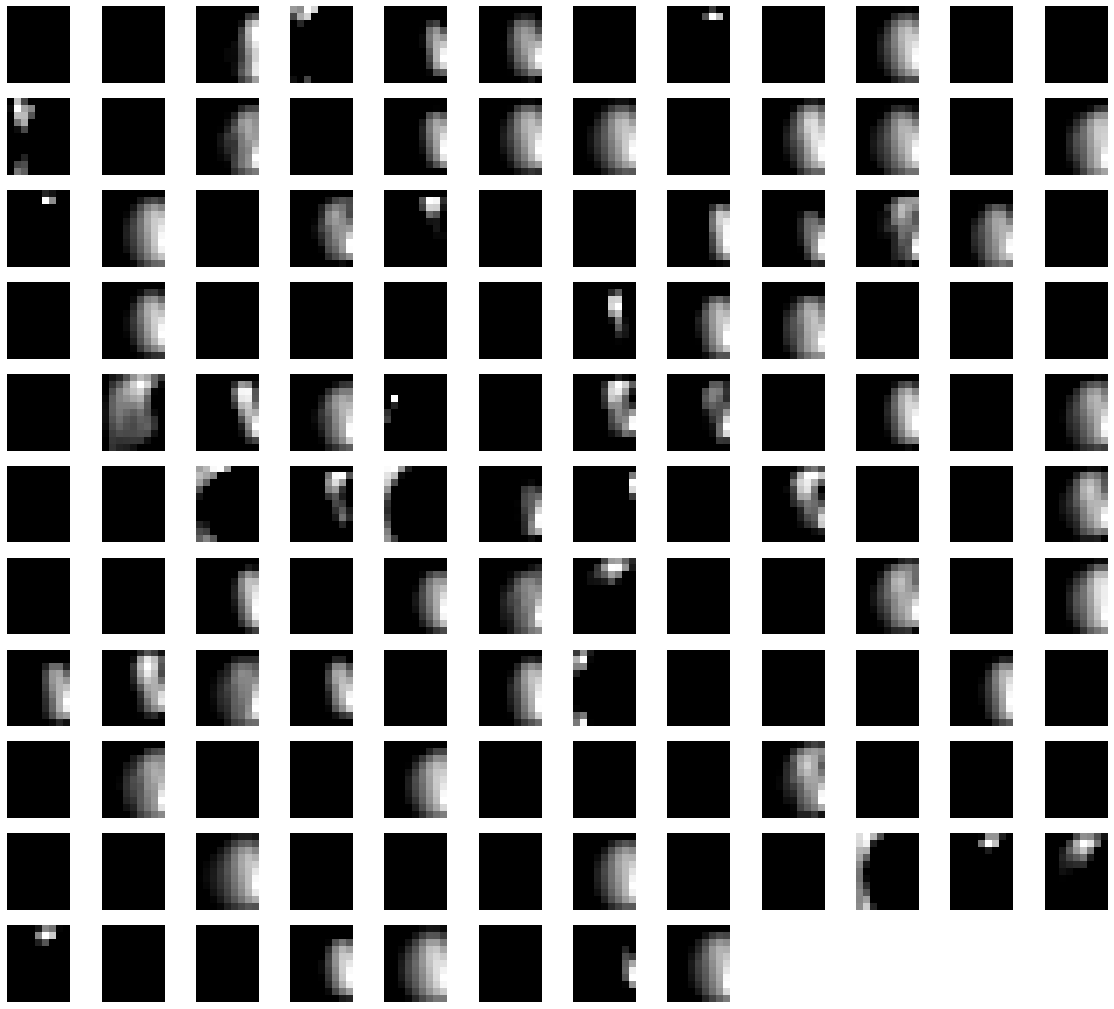

layer2.1.relu  :  torch.Size([1, 128, 32, 32])


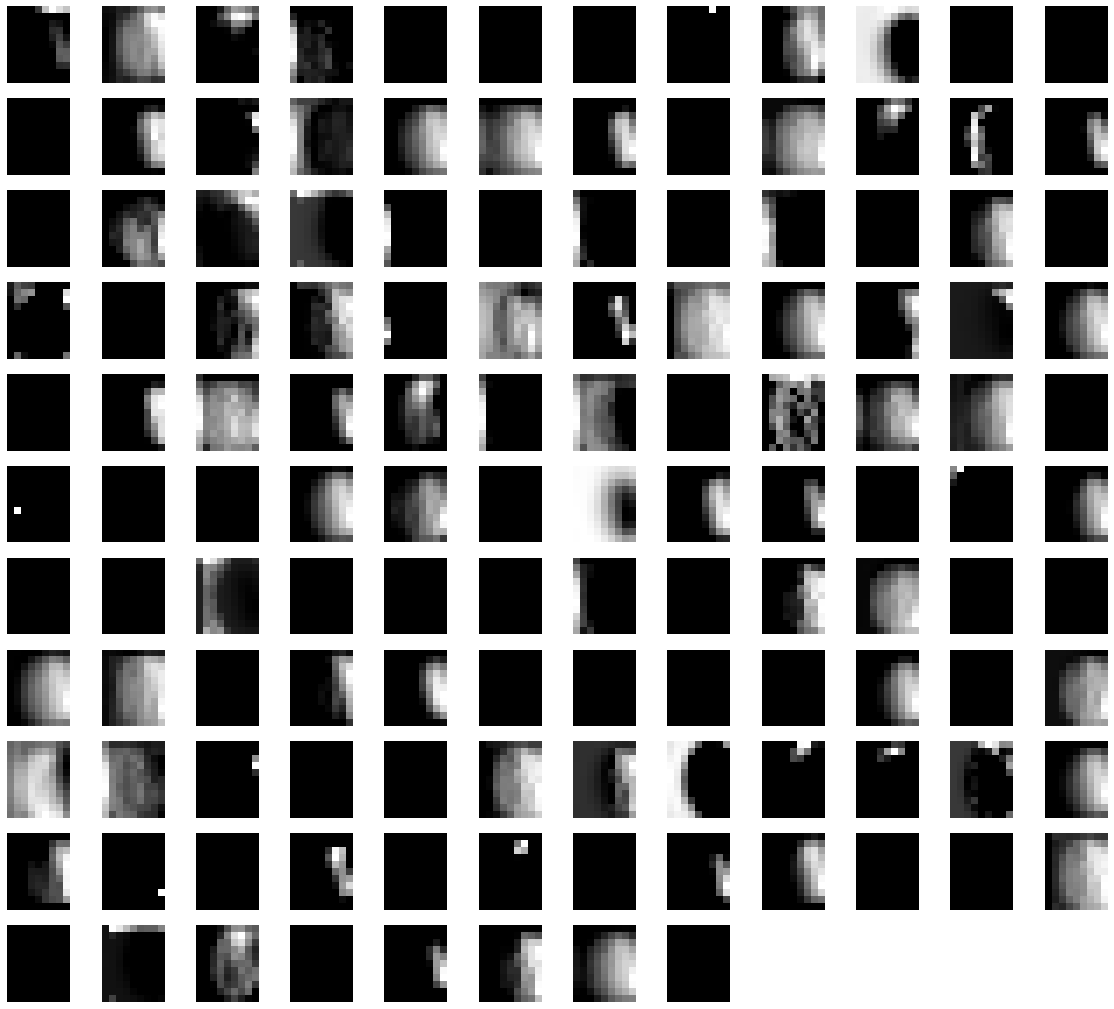

layer2.1.conv2  :  torch.Size([1, 128, 32, 32])


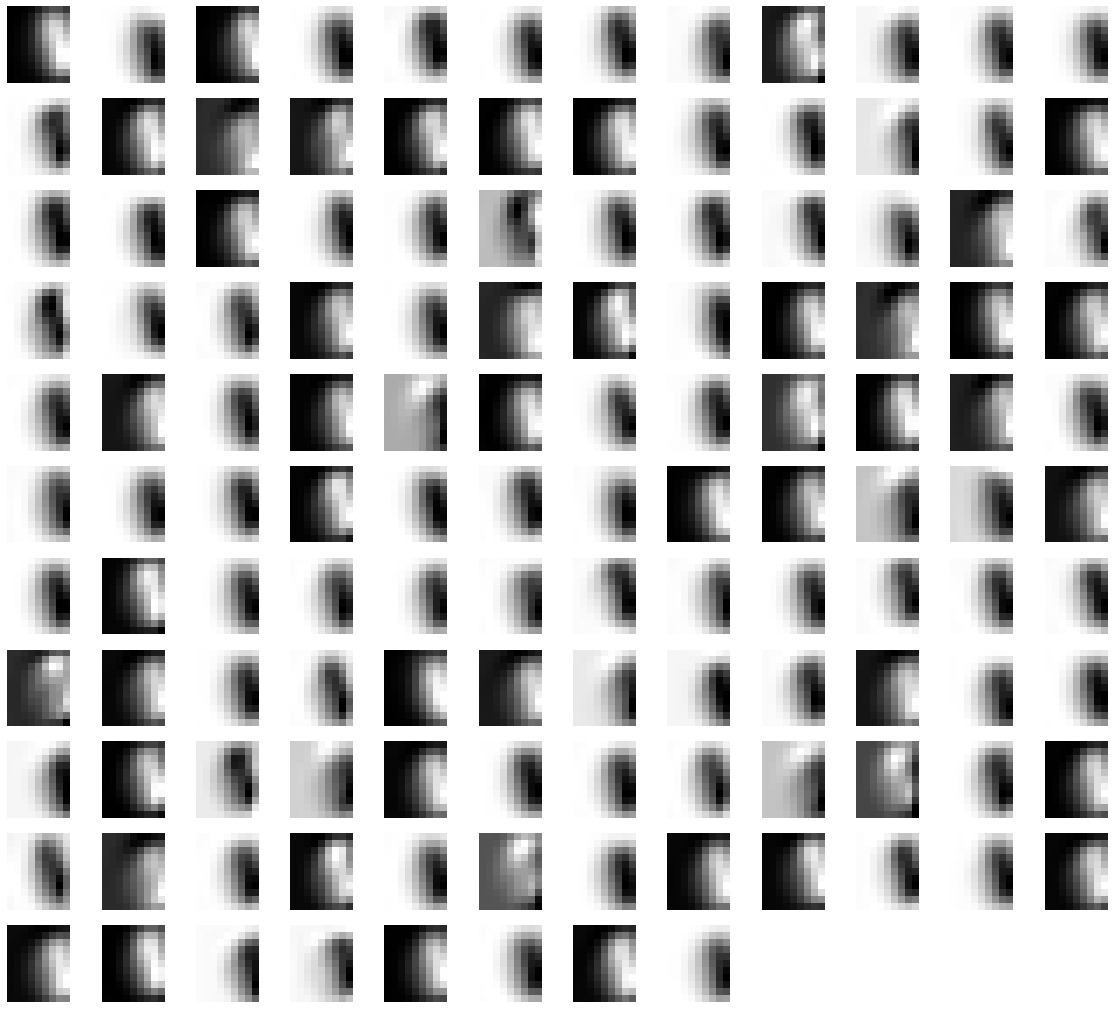

layer2.1.bn2  :  torch.Size([1, 128, 32, 32])


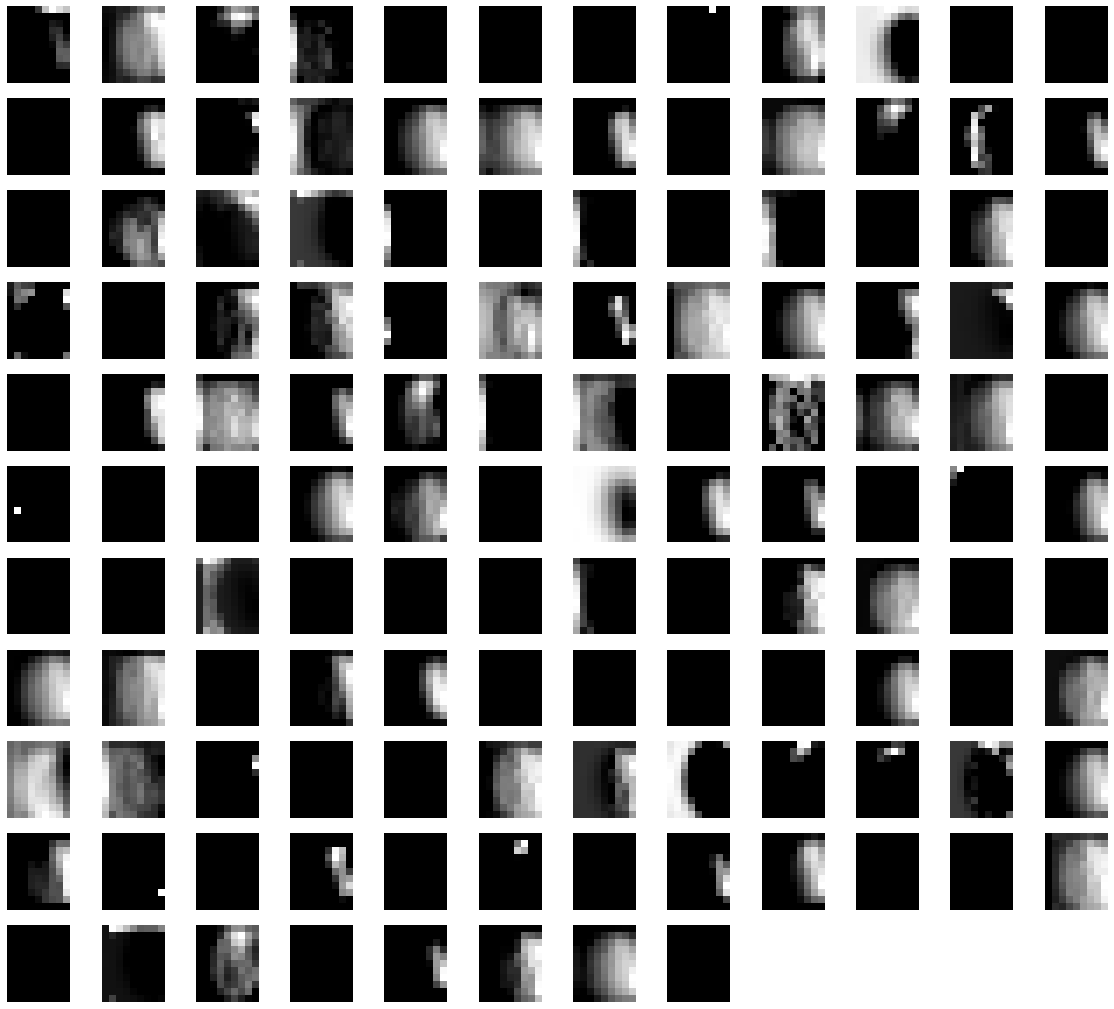

layer2.1  :  torch.Size([1, 128, 32, 32])


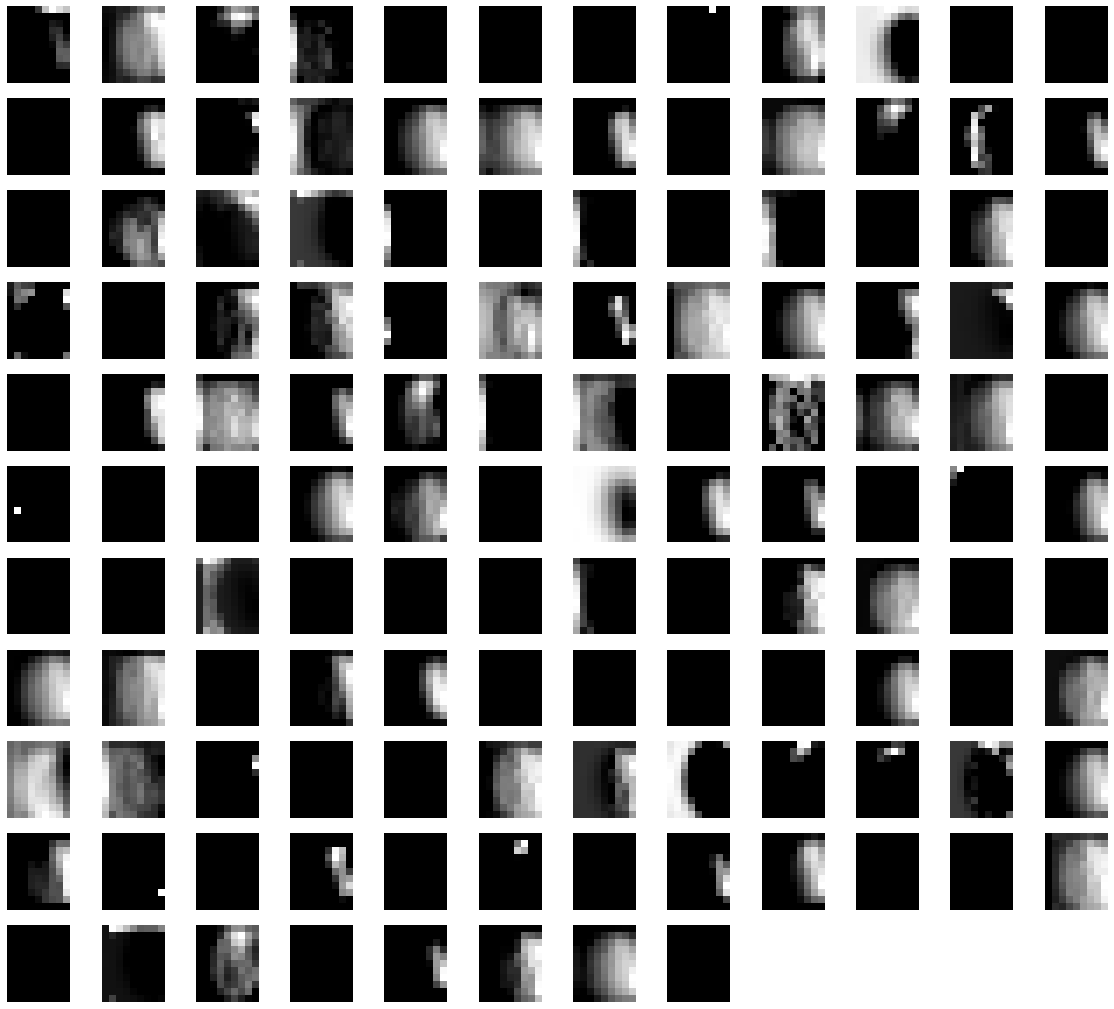

layer2  :  torch.Size([1, 128, 32, 32])


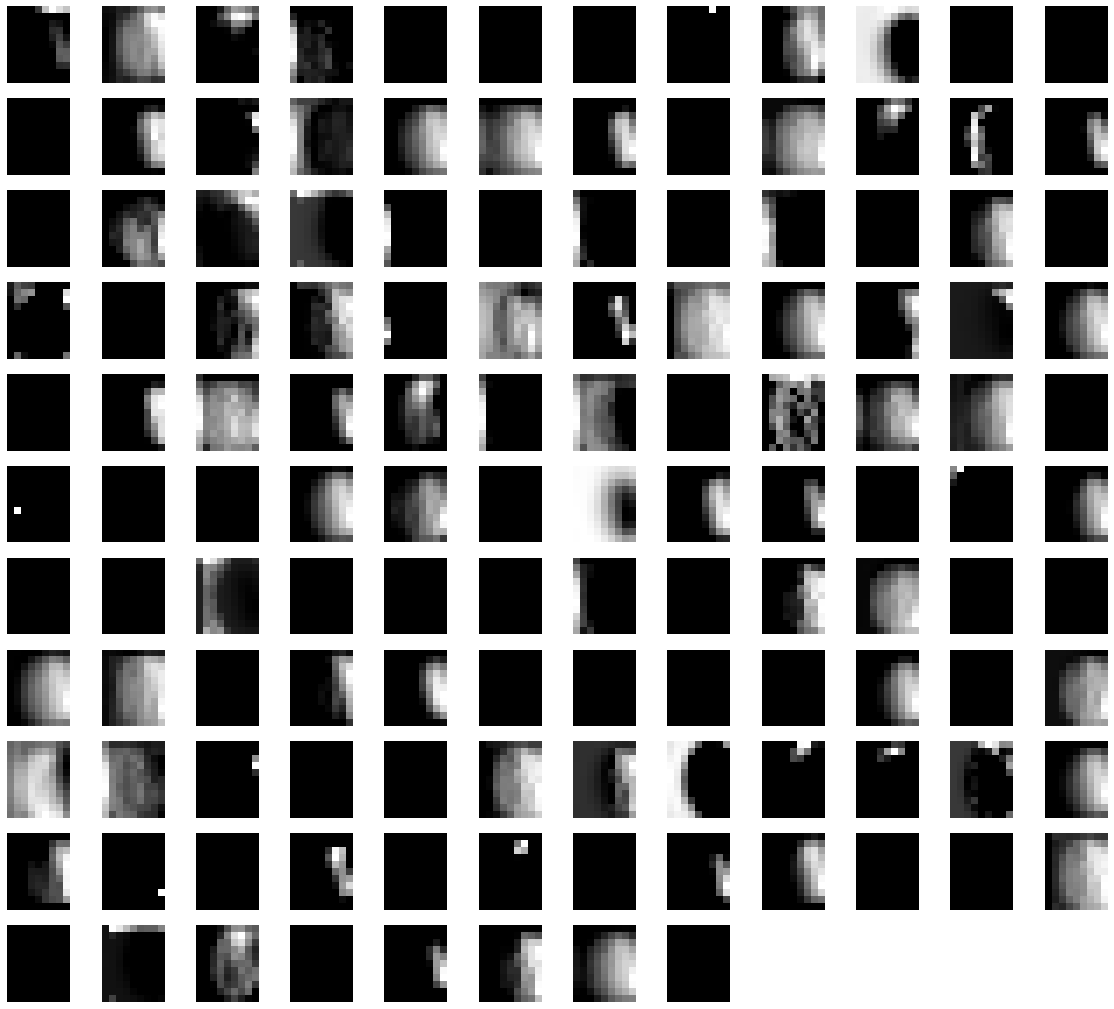

layer3.0.conv1  :  torch.Size([1, 256, 16, 16])


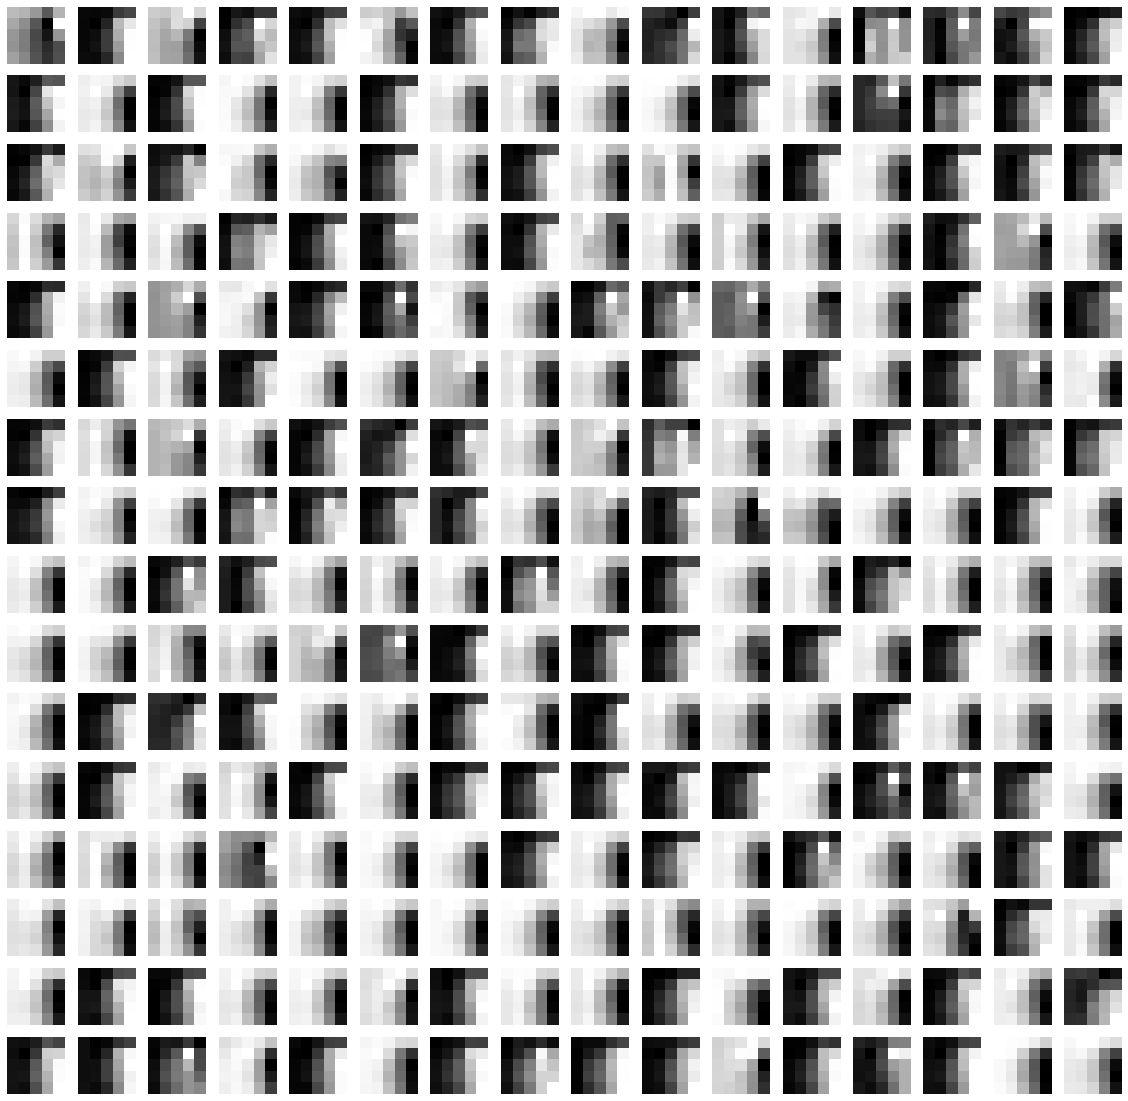

layer3.0.bn1  :  torch.Size([1, 256, 16, 16])


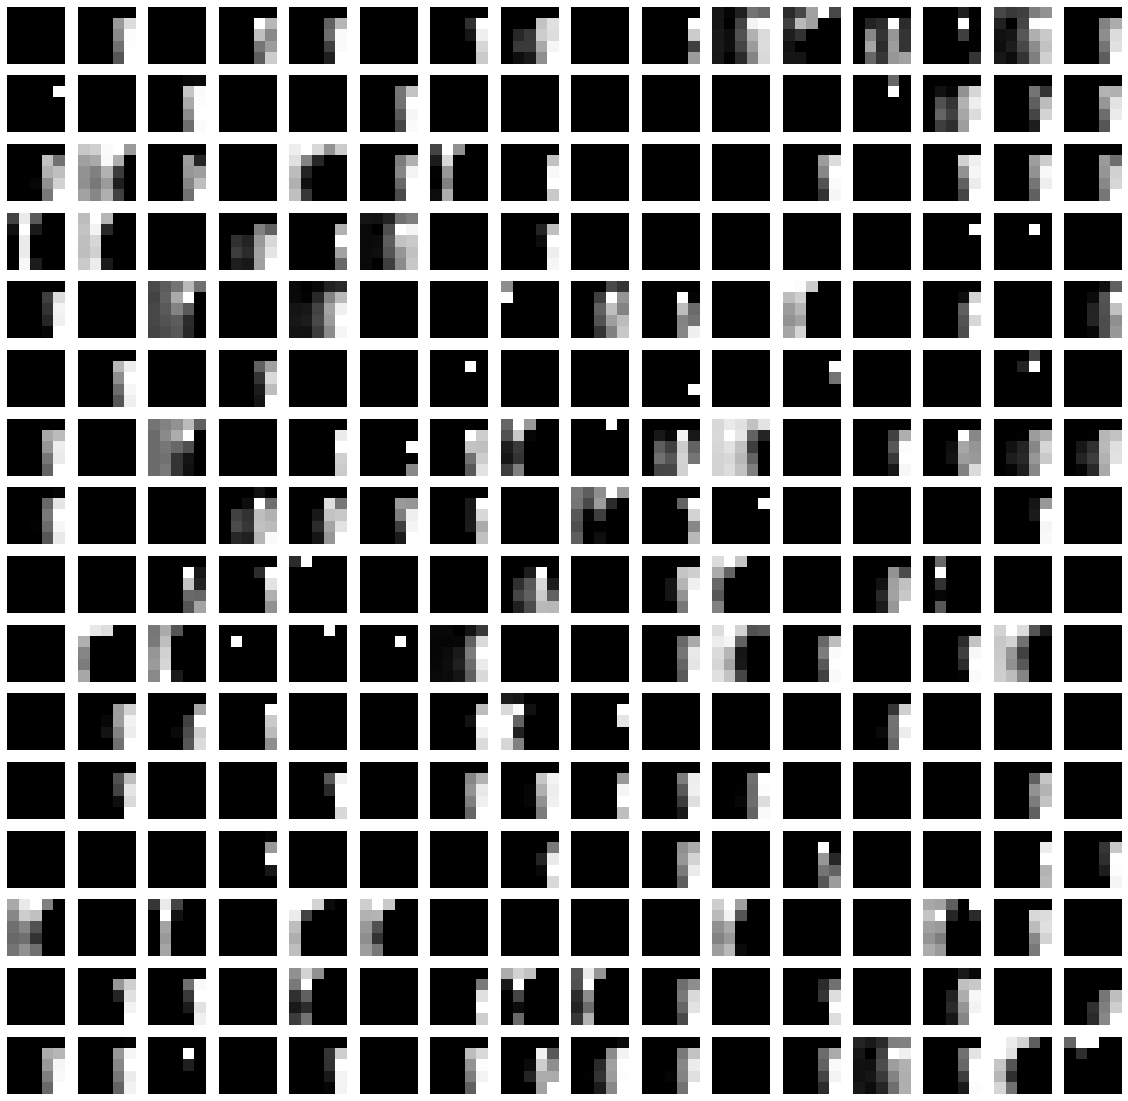

layer3.0.relu  :  torch.Size([1, 256, 16, 16])


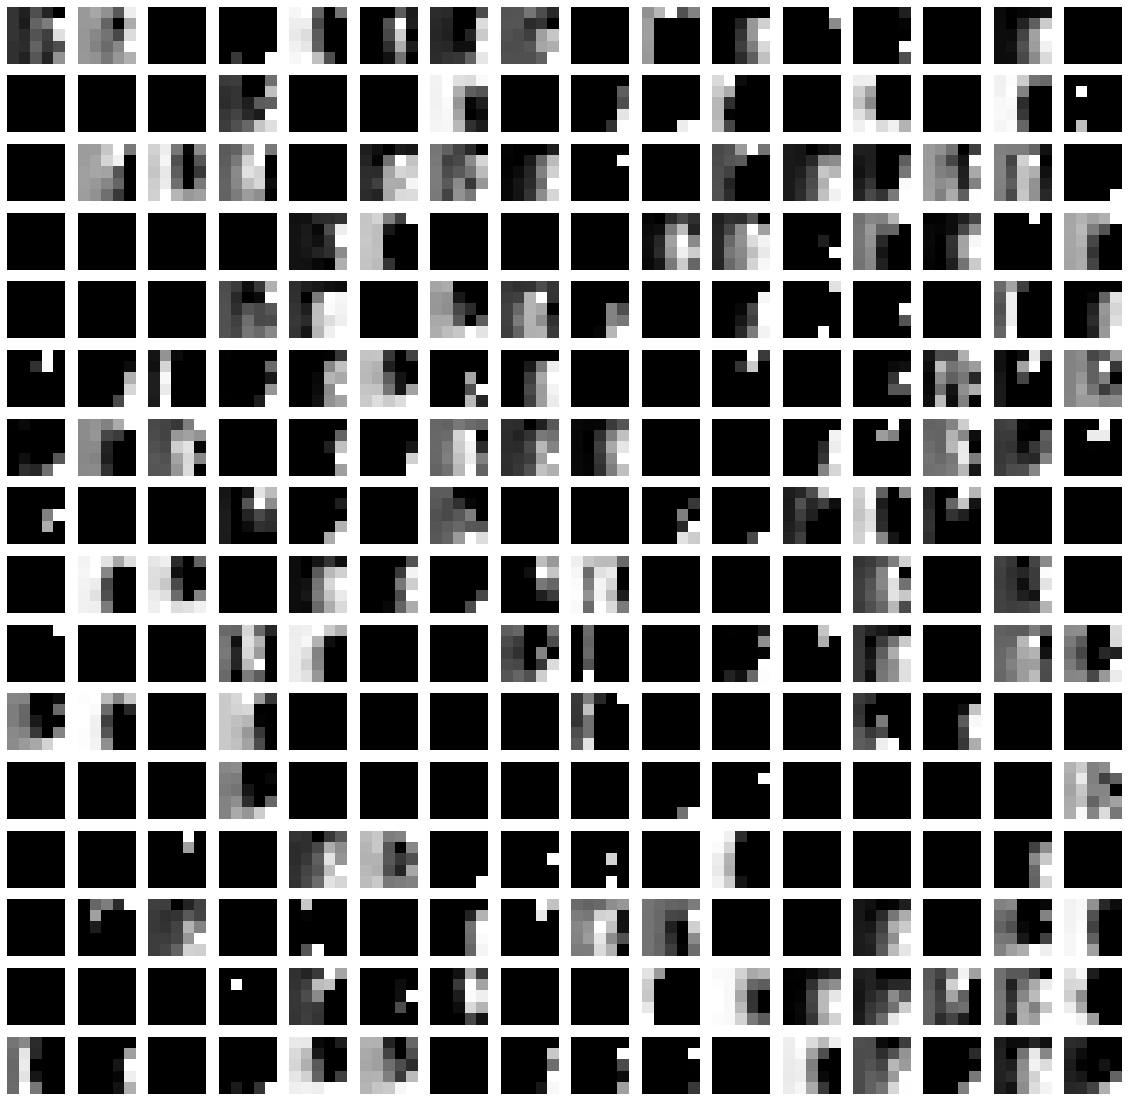

layer3.0.conv2  :  torch.Size([1, 256, 16, 16])


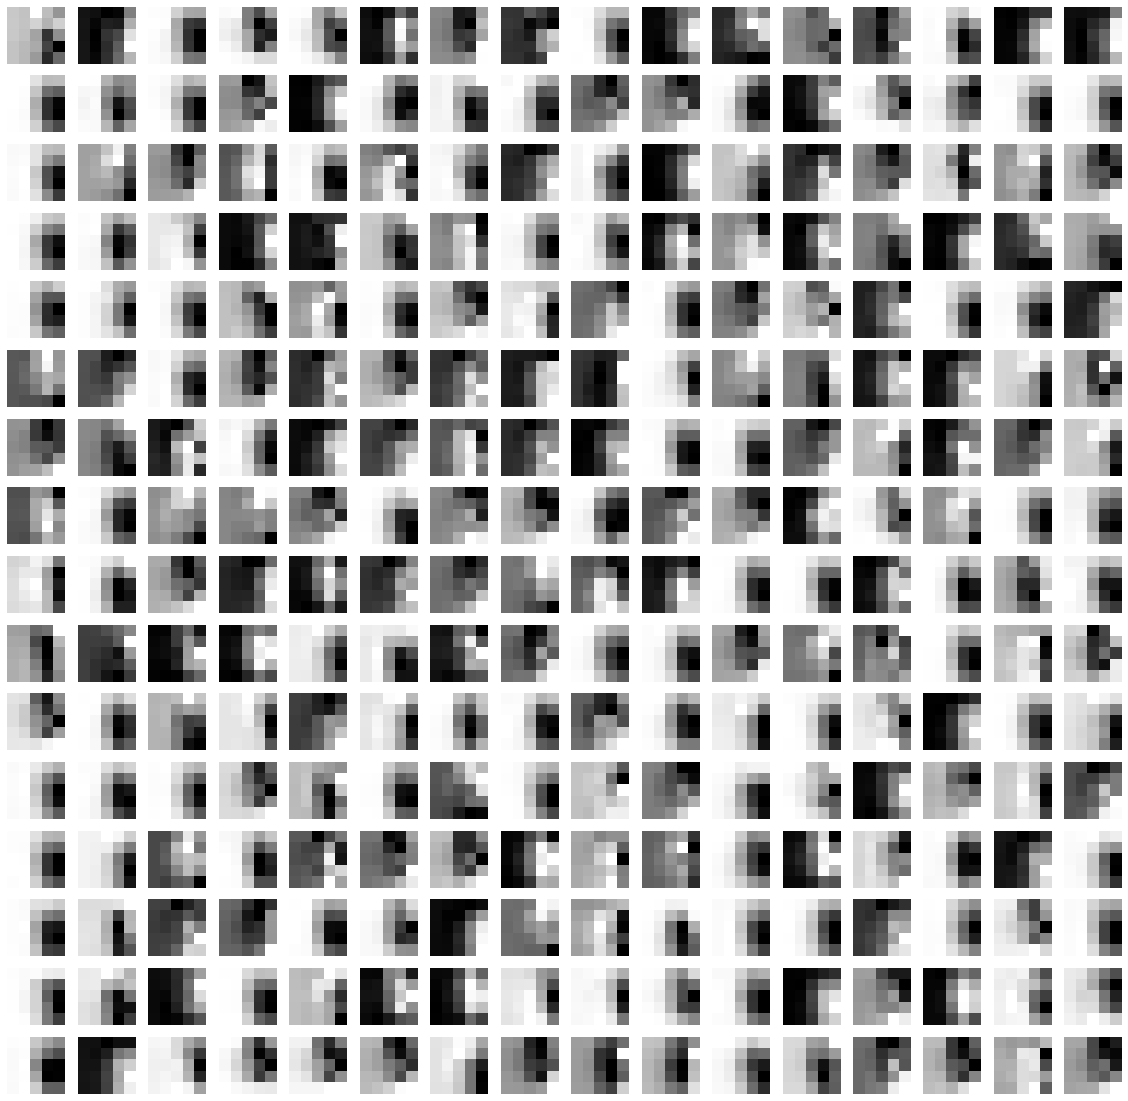

layer3.0.bn2  :  torch.Size([1, 256, 16, 16])


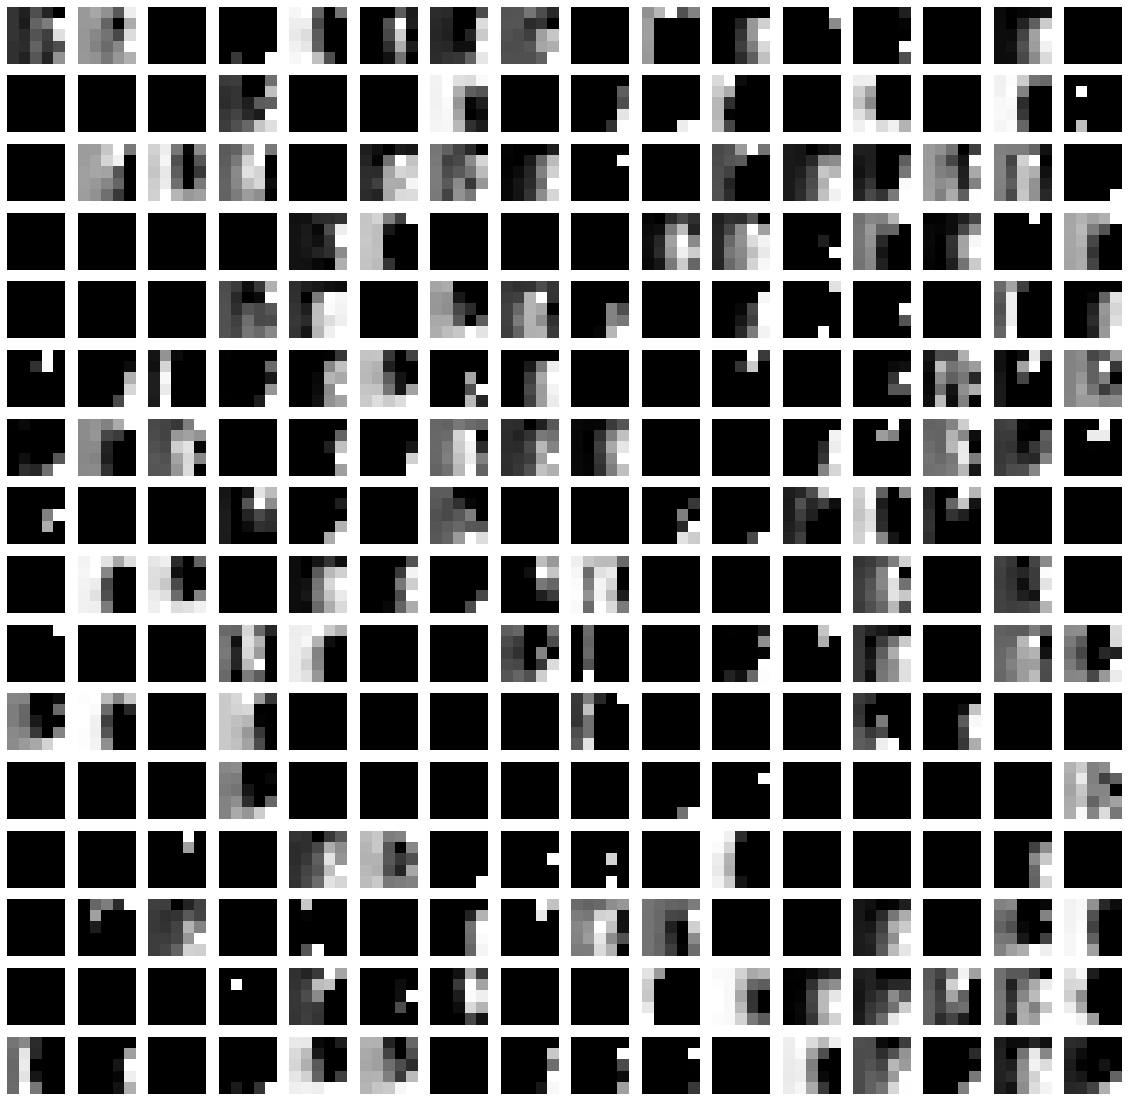

layer3.0.downsample.0  :  torch.Size([1, 256, 16, 16])


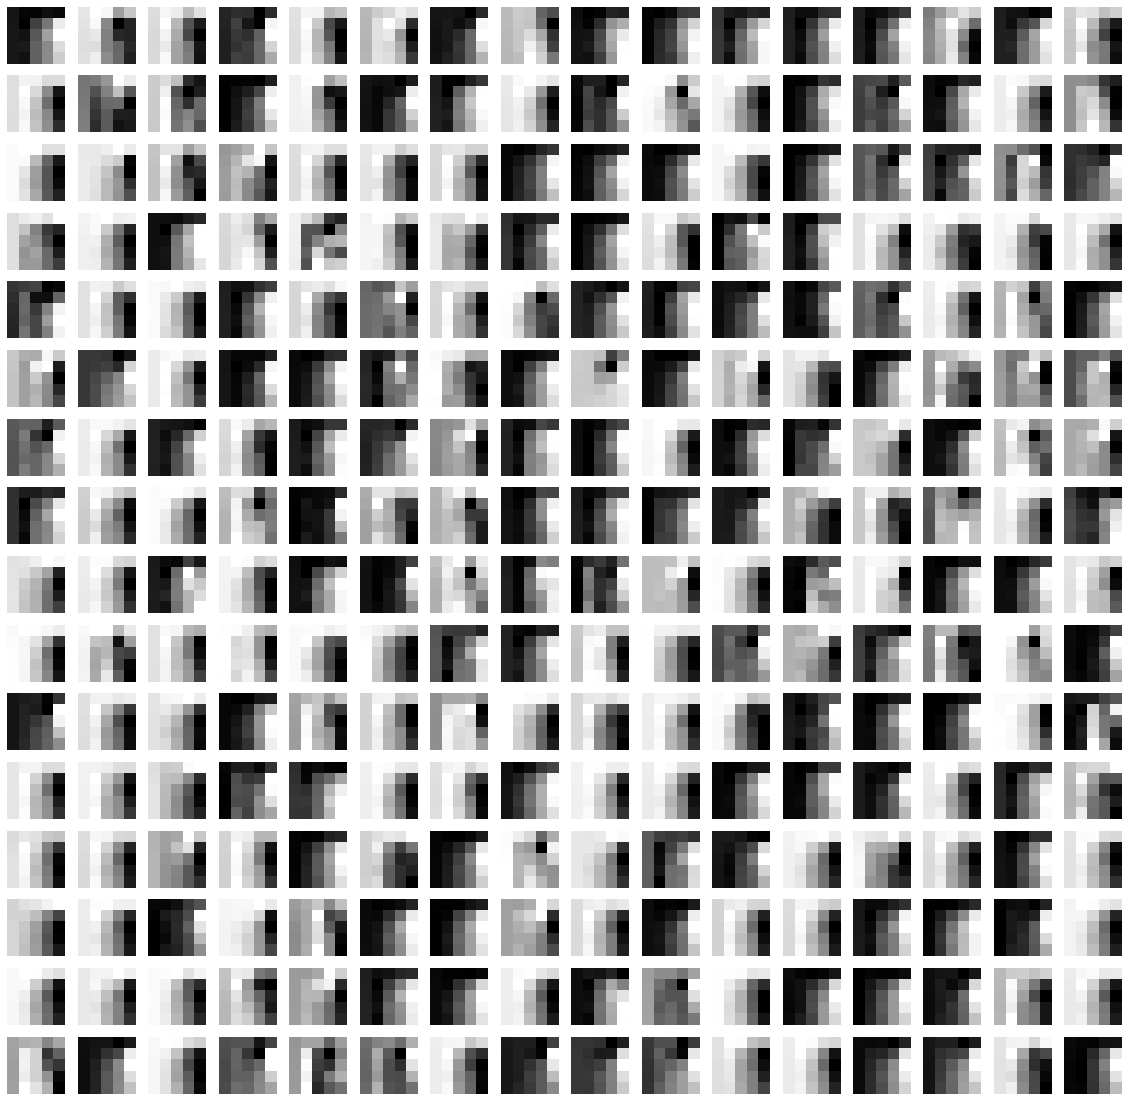

layer3.0.downsample.1  :  torch.Size([1, 256, 16, 16])


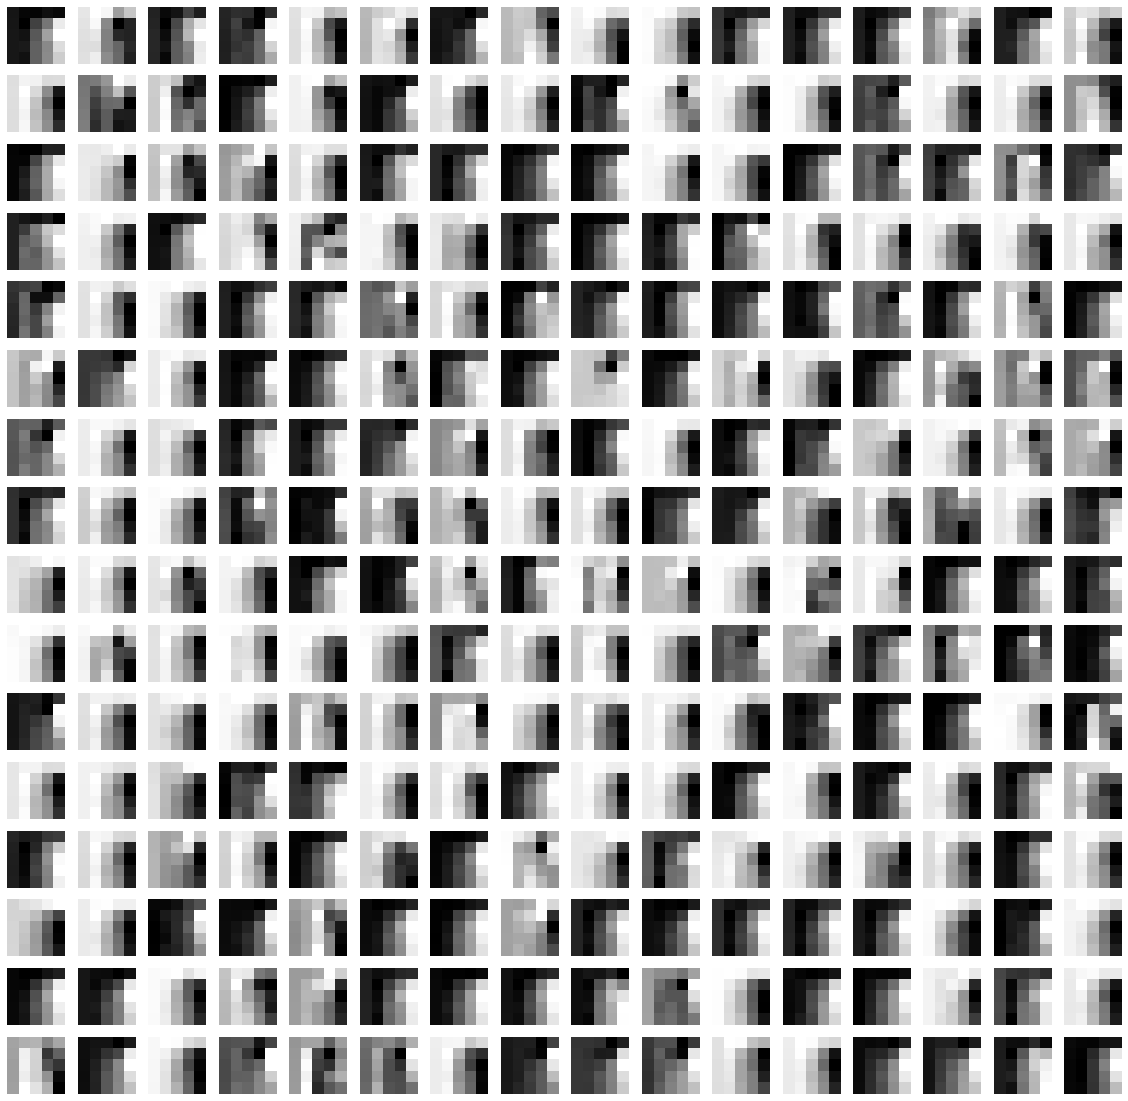

layer3.0.downsample  :  torch.Size([1, 256, 16, 16])


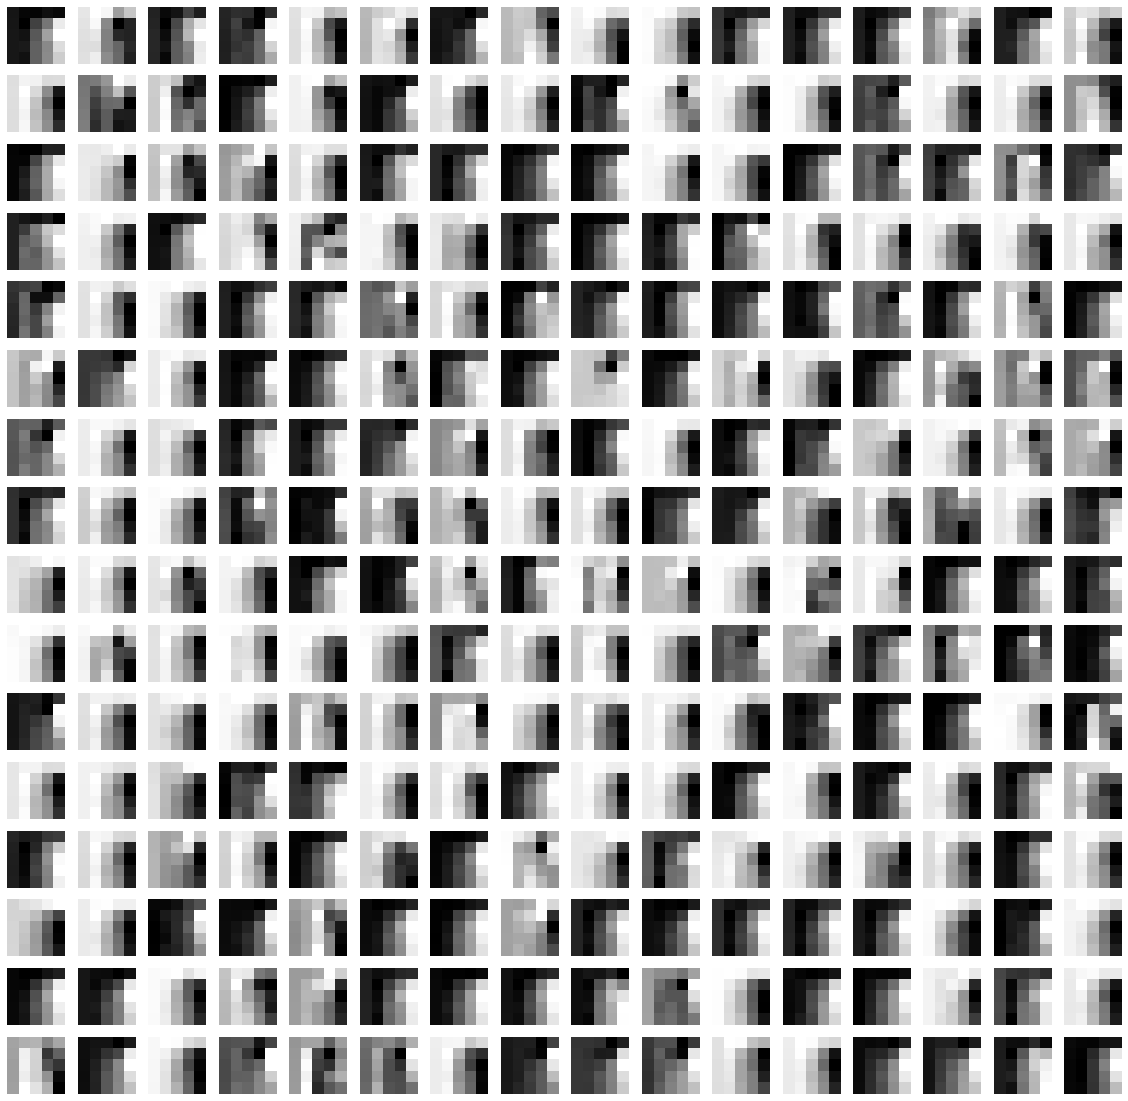

layer3.0  :  torch.Size([1, 256, 16, 16])


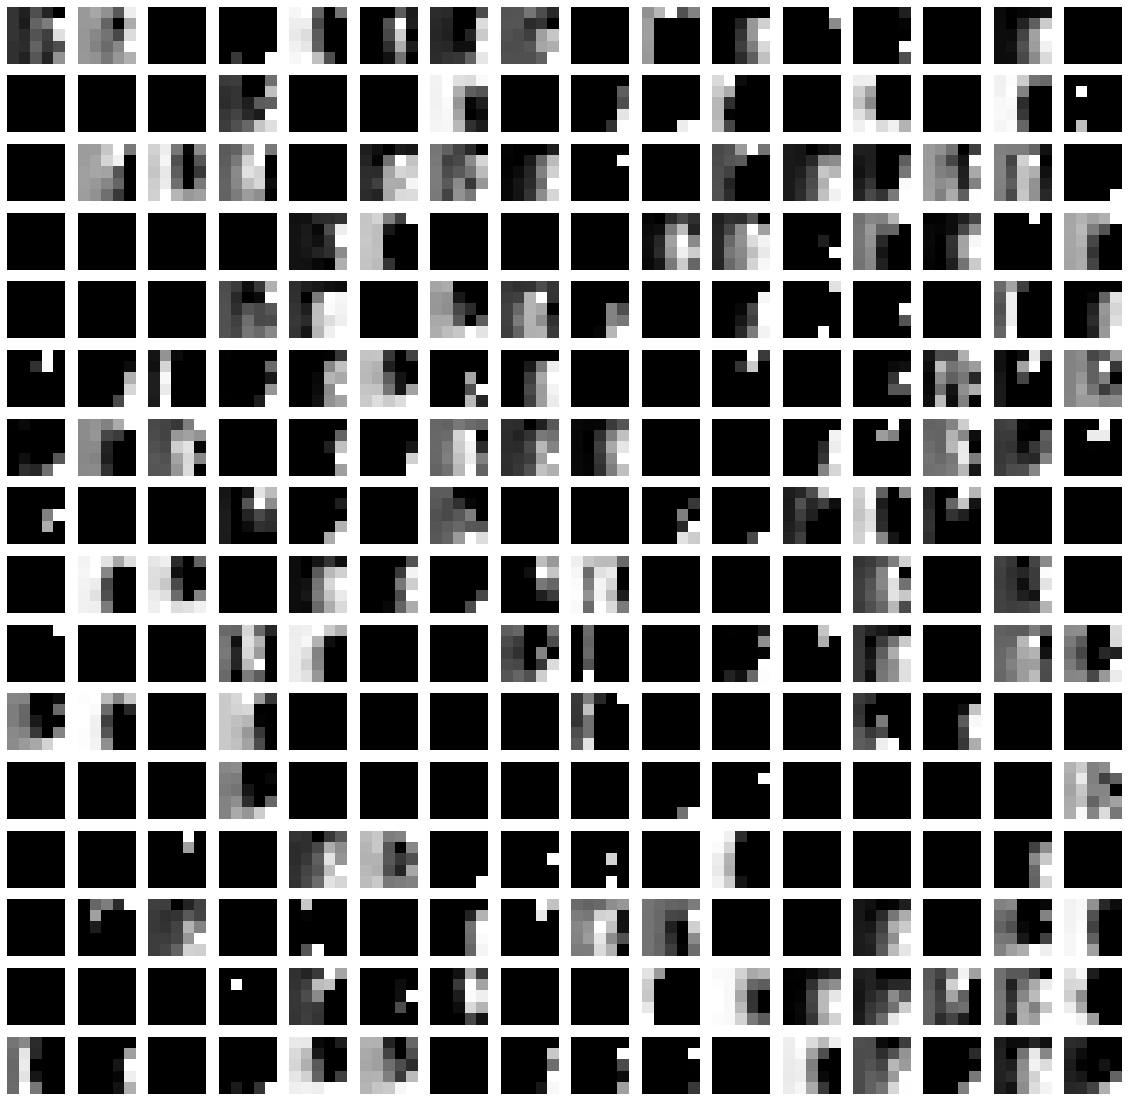

layer3.1.conv1  :  torch.Size([1, 256, 16, 16])


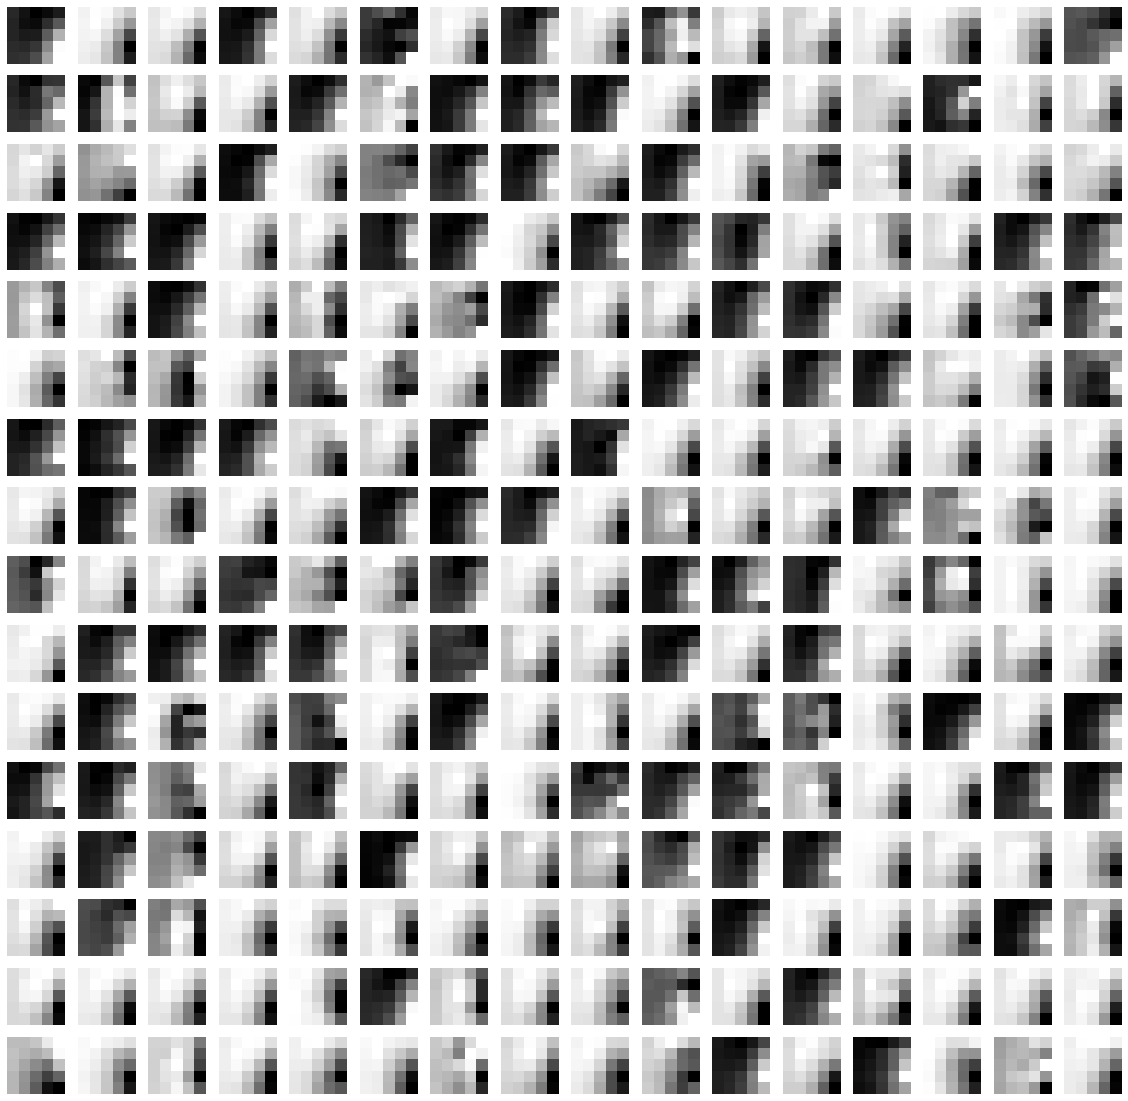

layer3.1.bn1  :  torch.Size([1, 256, 16, 16])


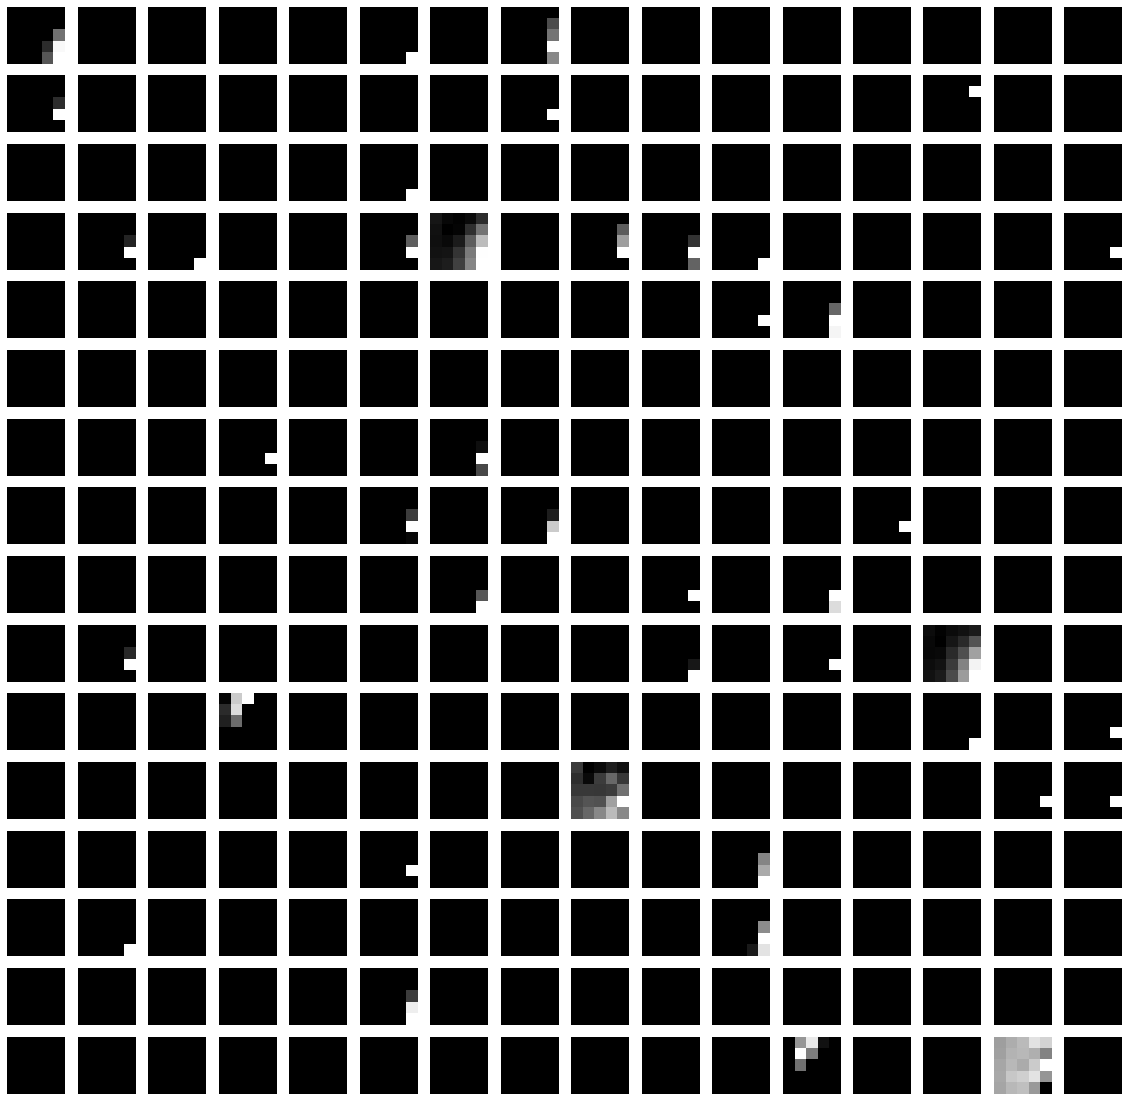

layer3.1.relu  :  torch.Size([1, 256, 16, 16])


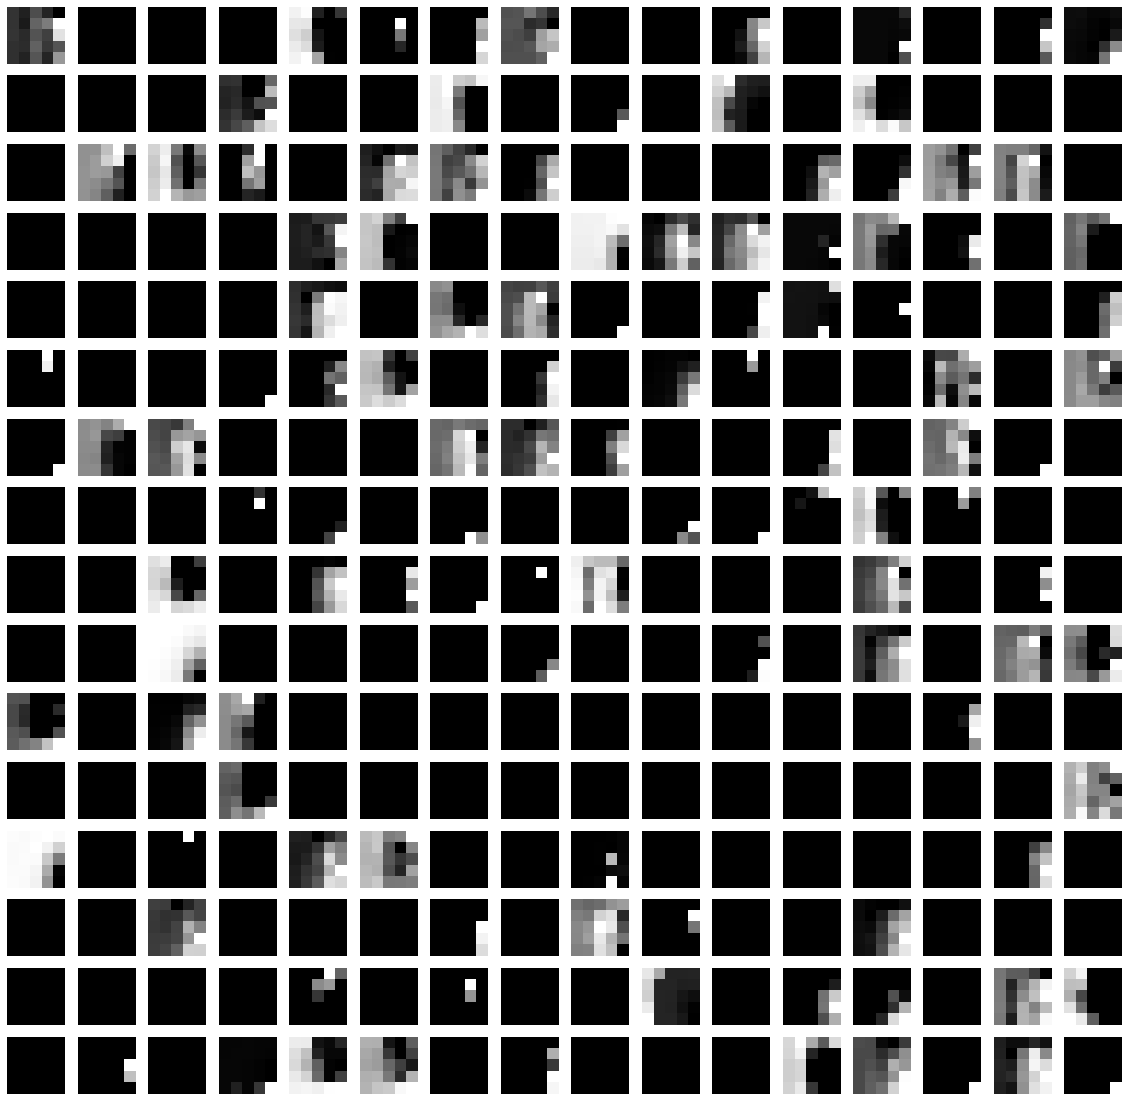

layer3.1.conv2  :  torch.Size([1, 256, 16, 16])


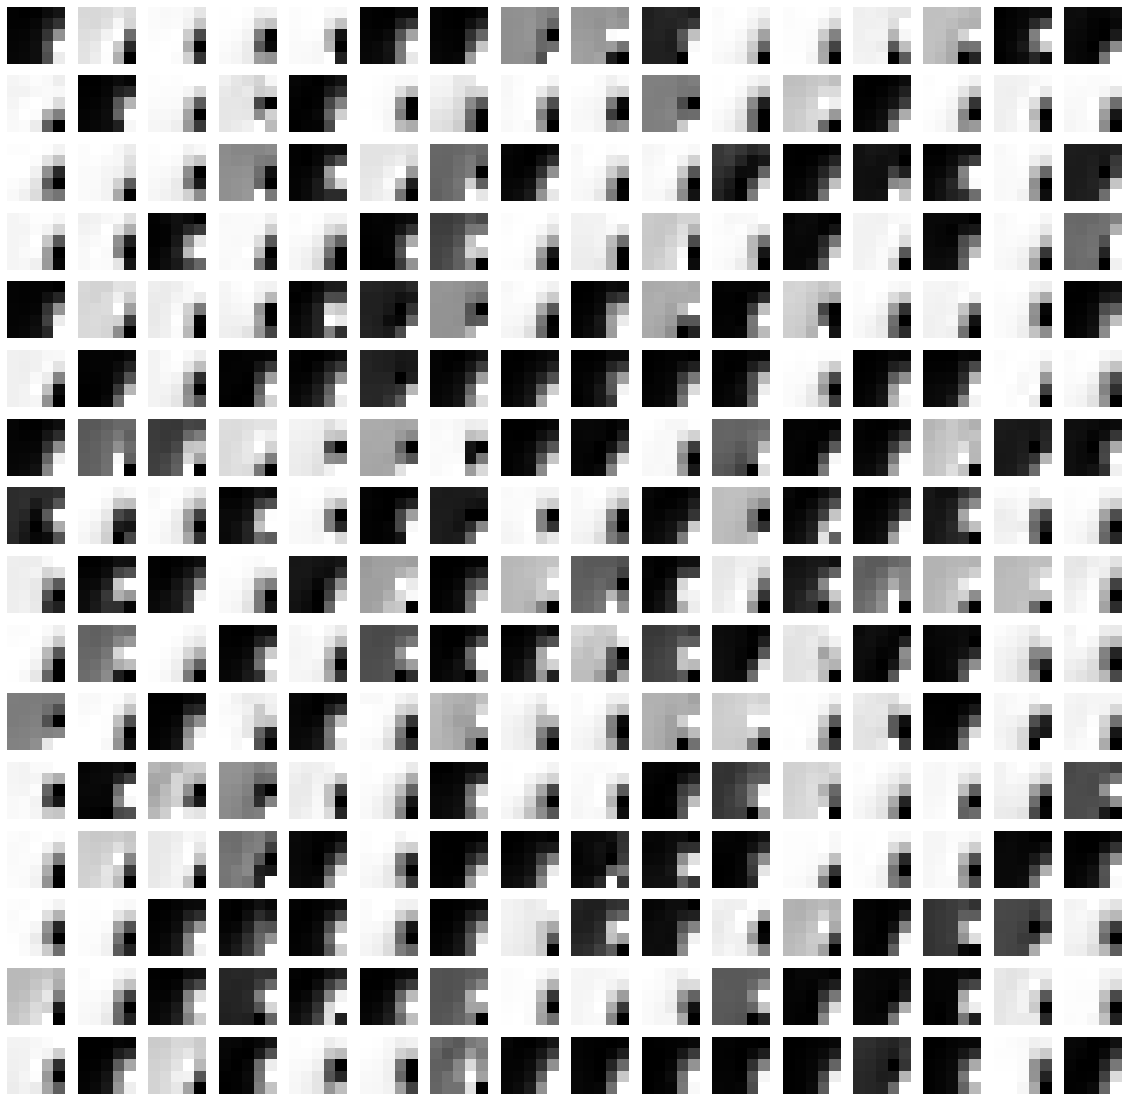

layer3.1.bn2  :  torch.Size([1, 256, 16, 16])


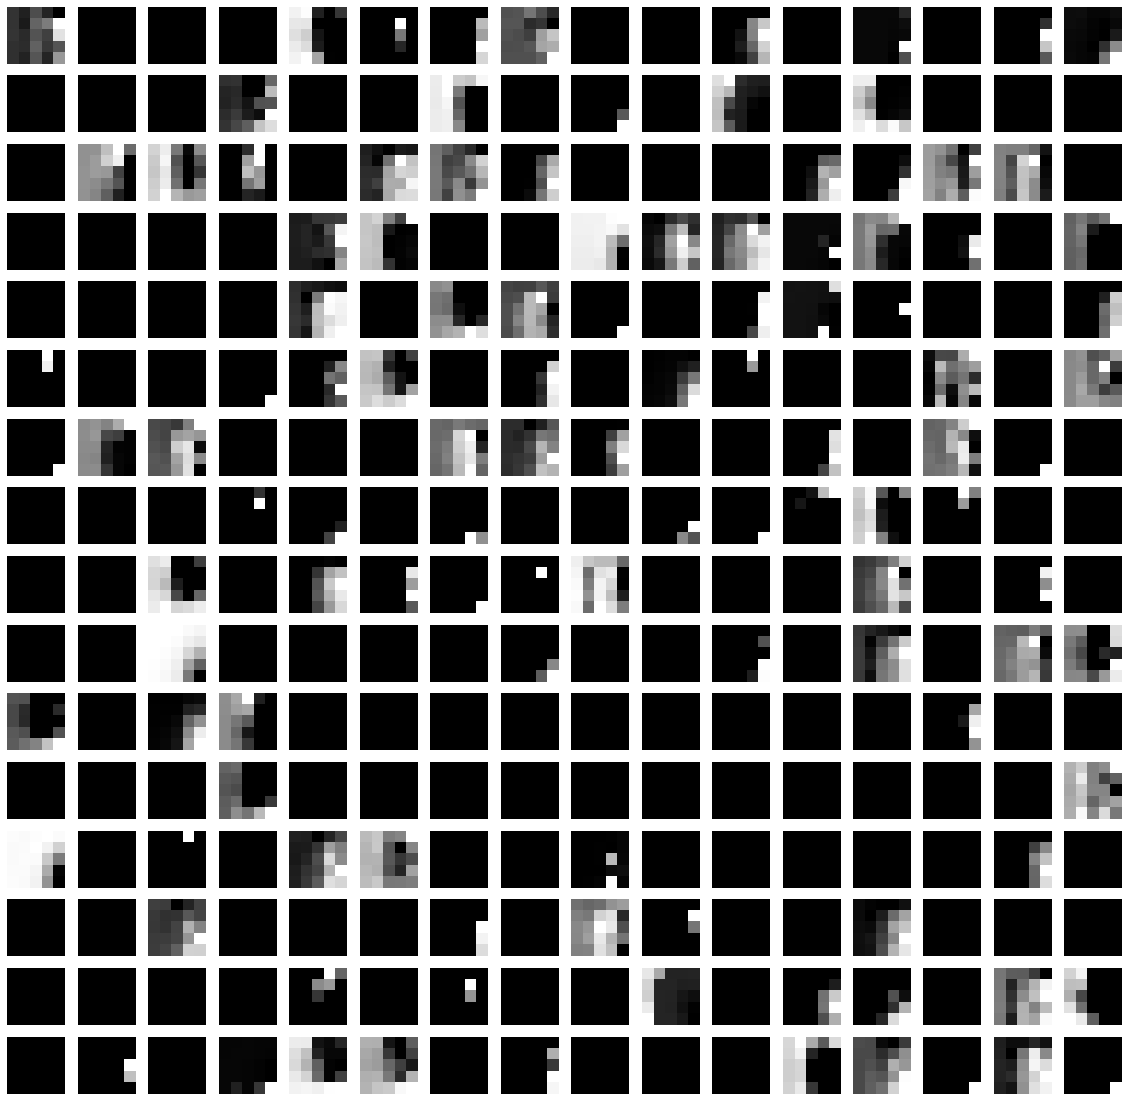

layer3.1  :  torch.Size([1, 256, 16, 16])


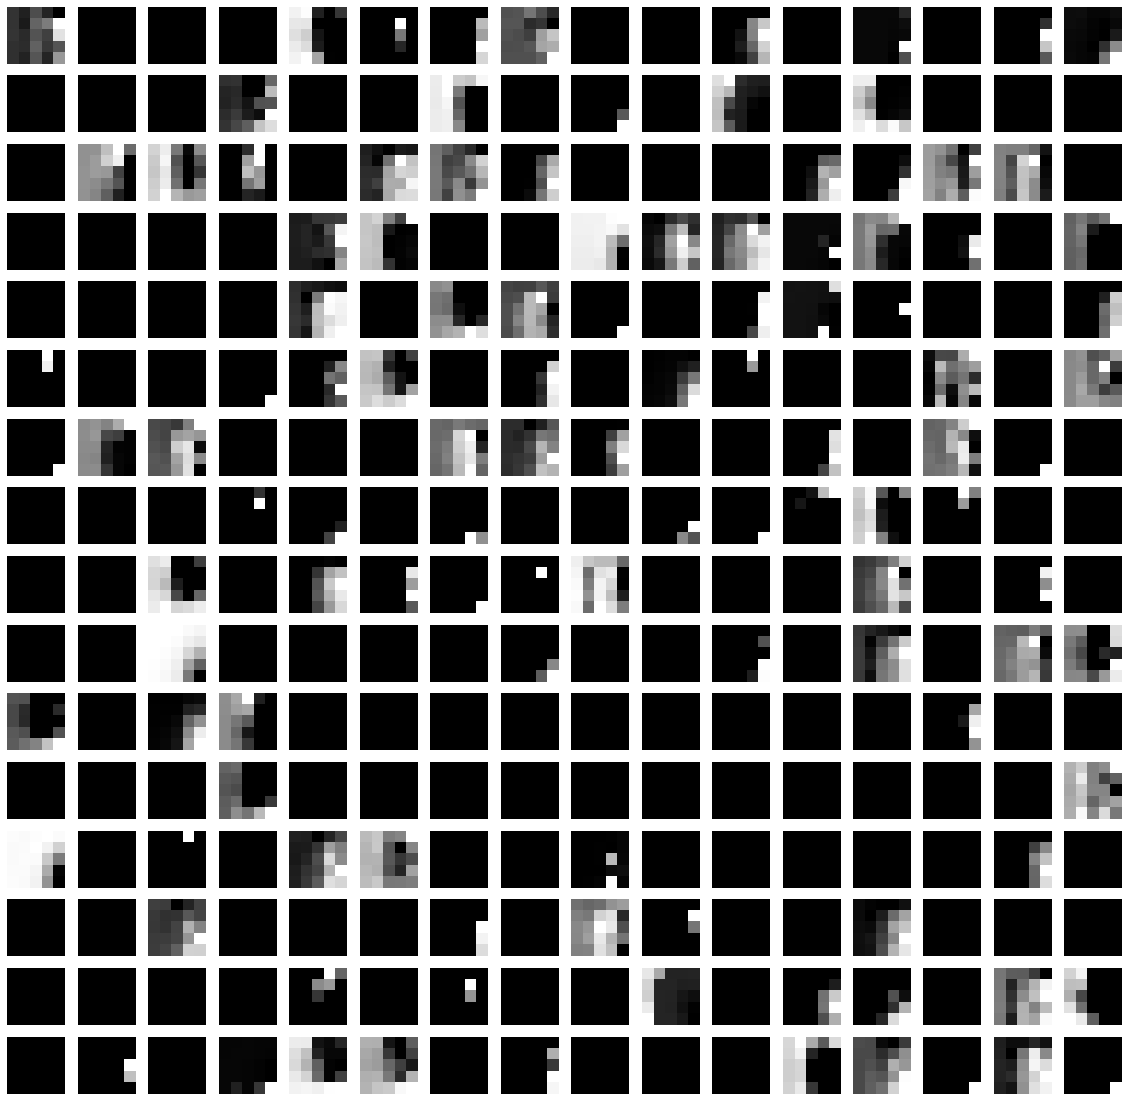

layer3  :  torch.Size([1, 256, 16, 16])


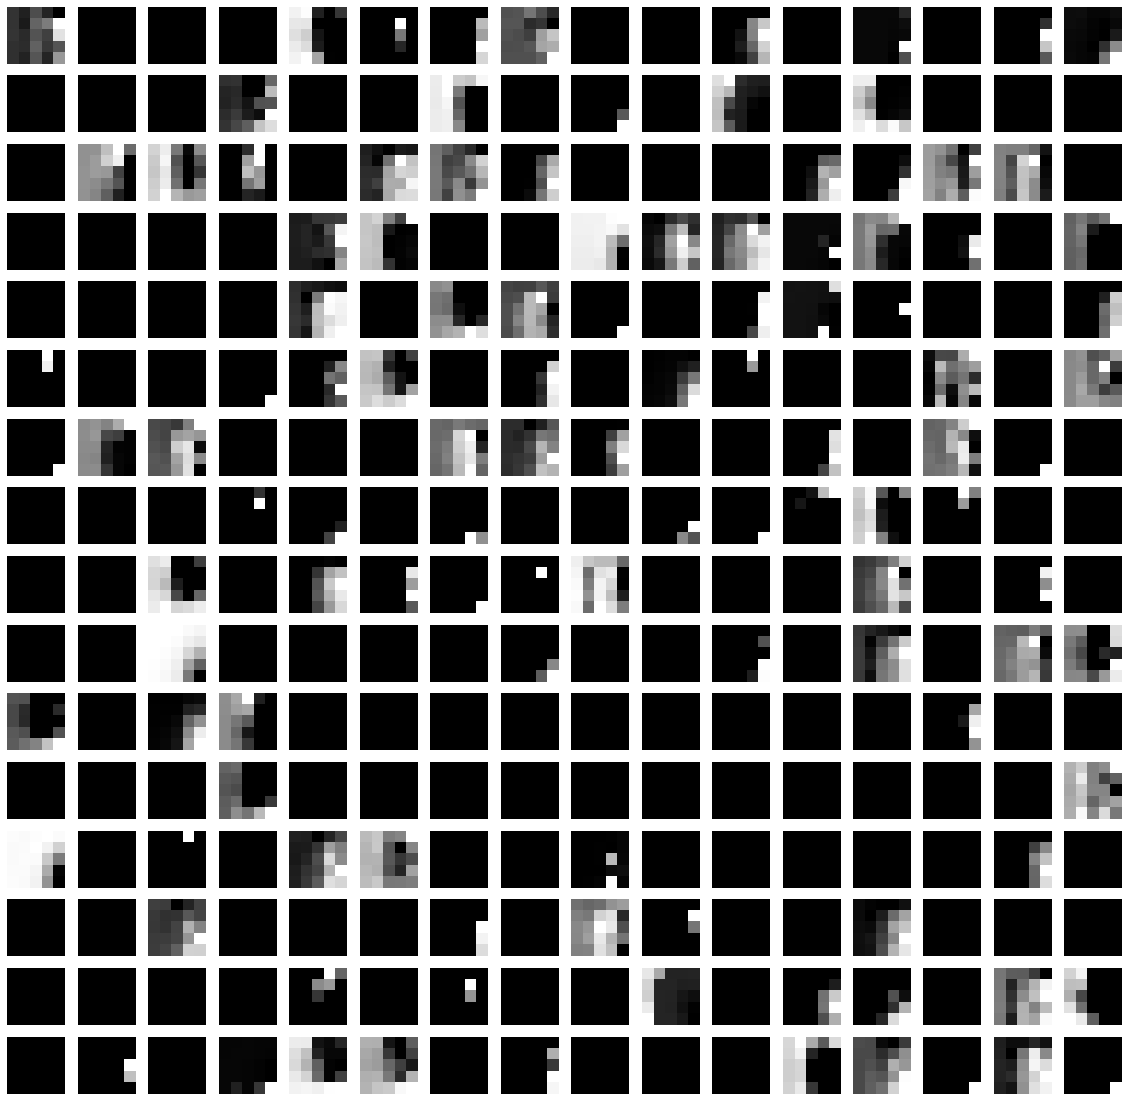

layer4.0.conv1  :  torch.Size([1, 512, 8, 8])


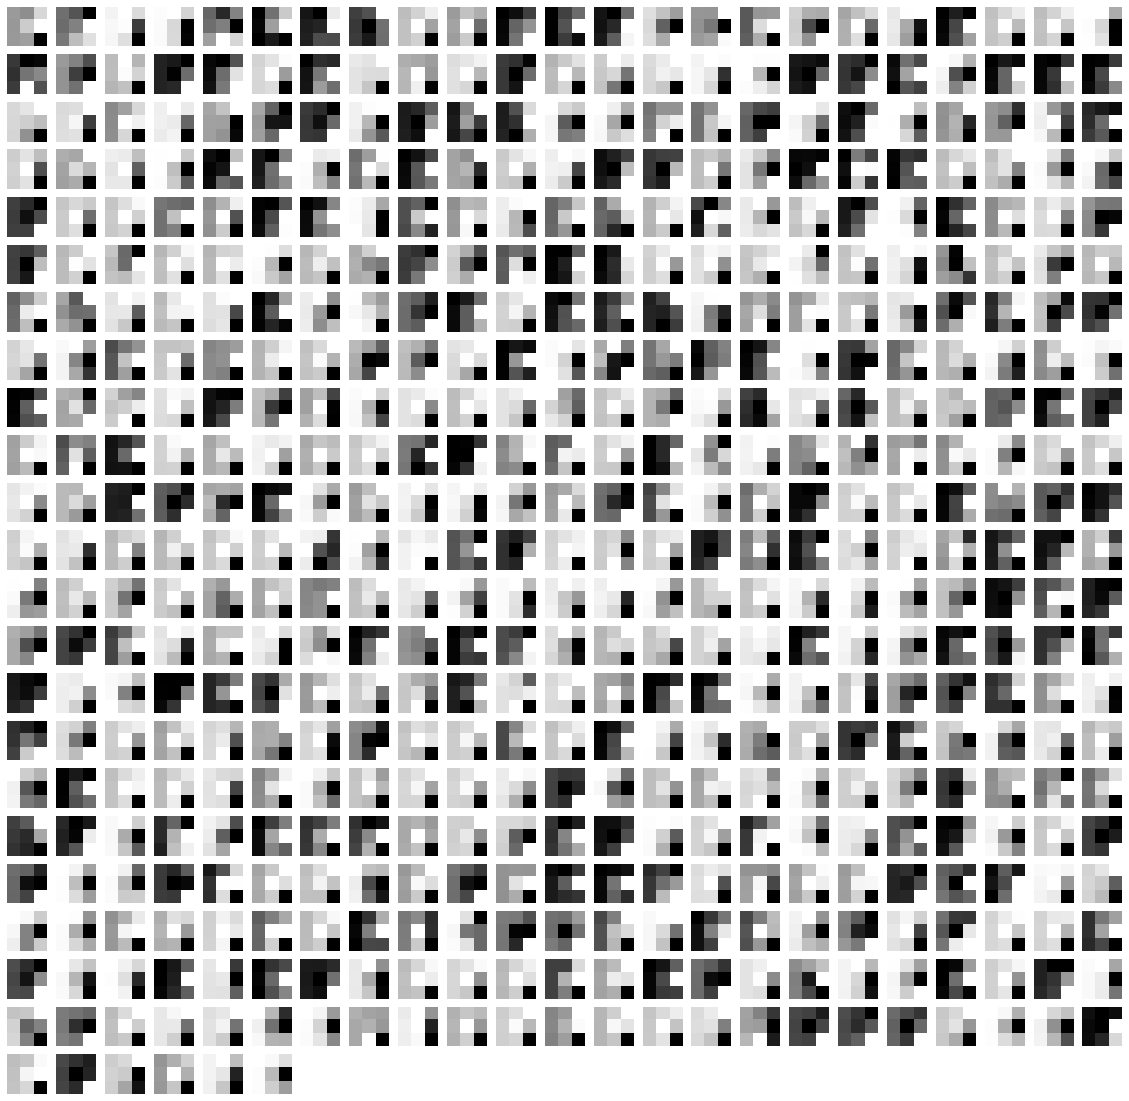

layer4.0.bn1  :  torch.Size([1, 512, 8, 8])


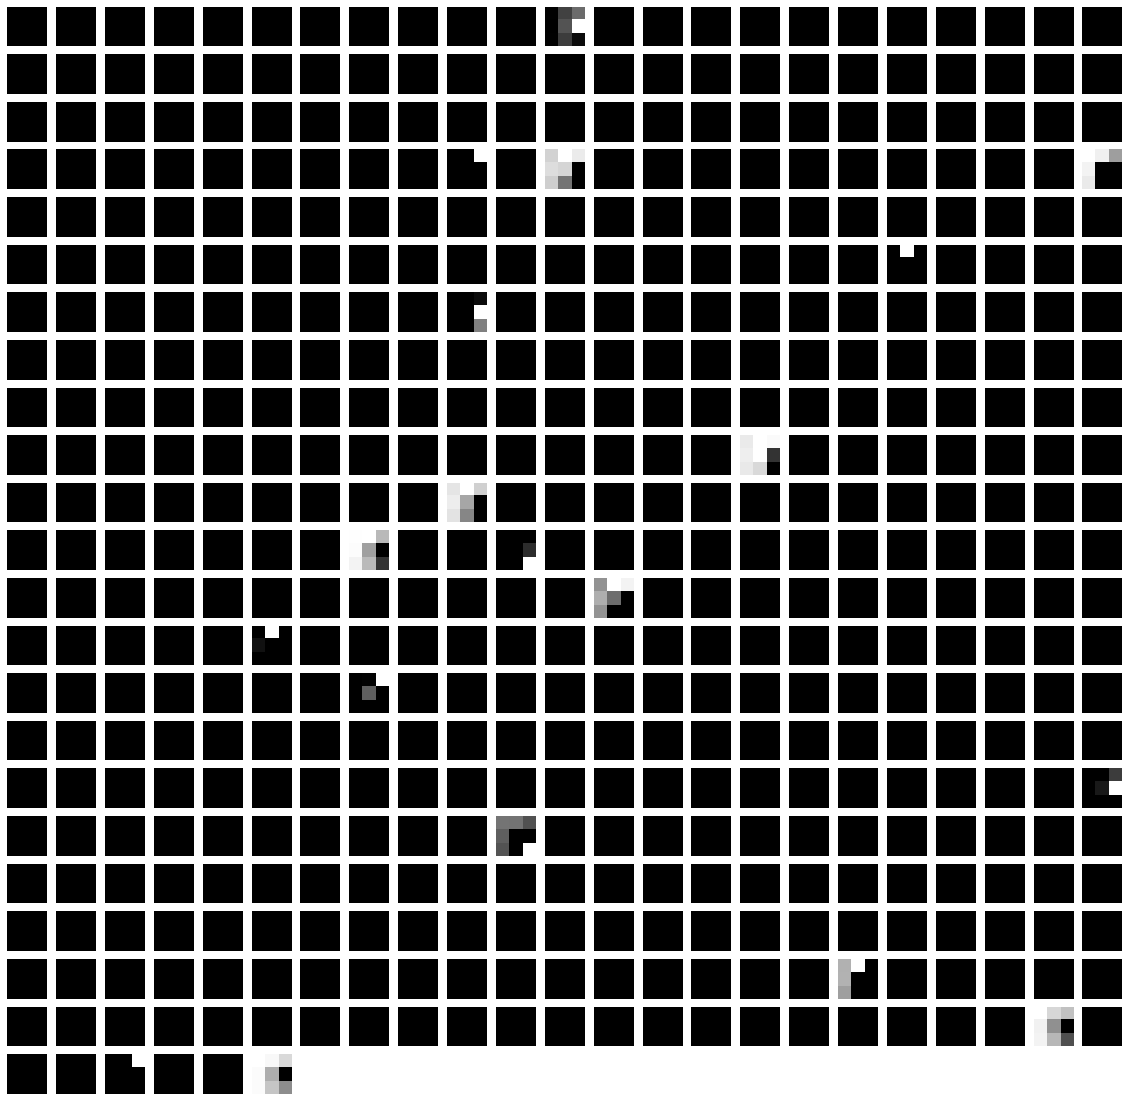

layer4.0.relu  :  torch.Size([1, 512, 8, 8])


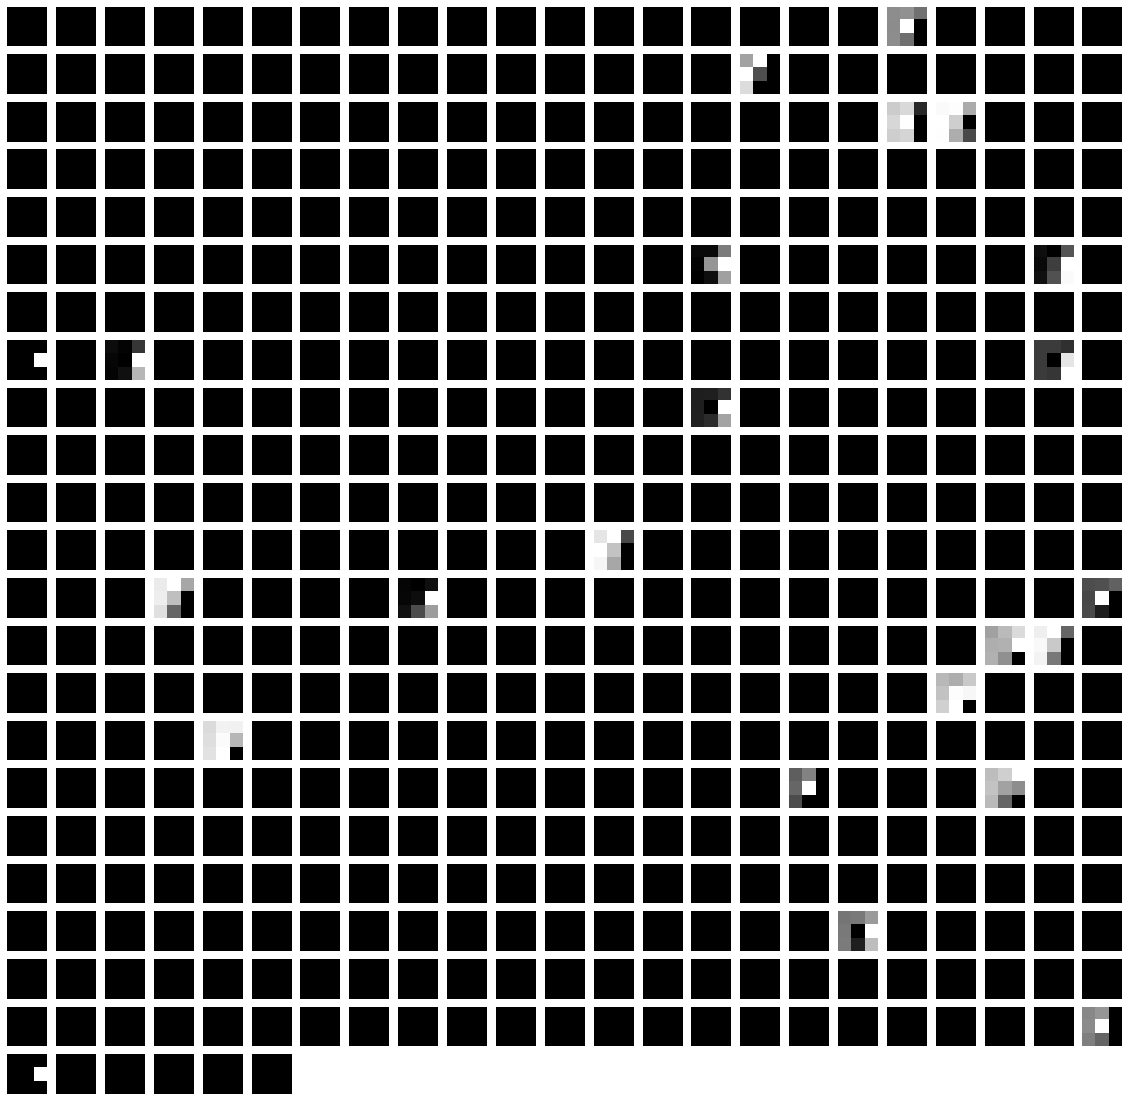

layer4.0.conv2  :  torch.Size([1, 512, 8, 8])


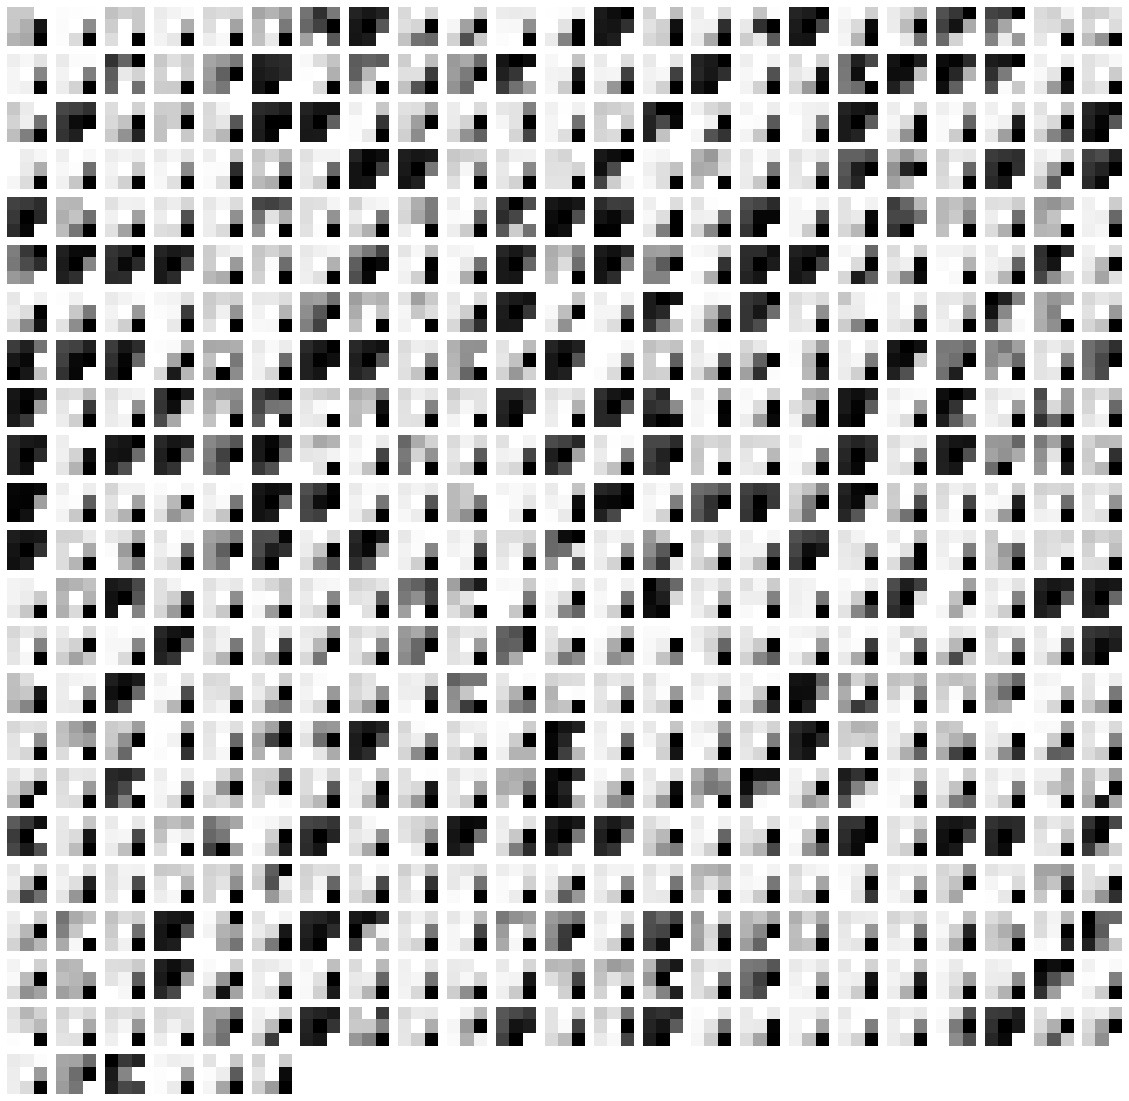

layer4.0.bn2  :  torch.Size([1, 512, 8, 8])


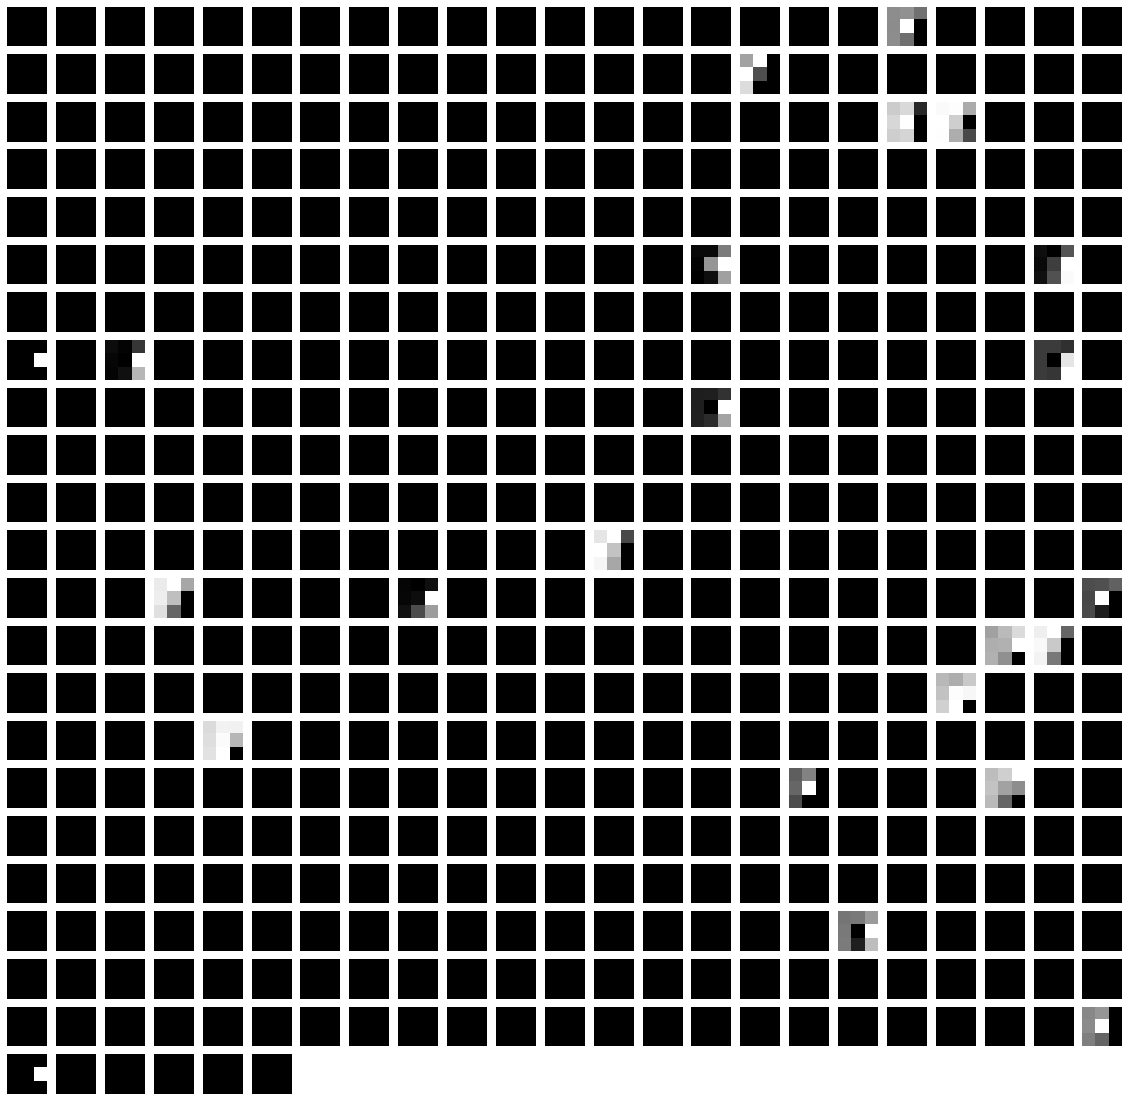

layer4.0.downsample.0  :  torch.Size([1, 512, 8, 8])


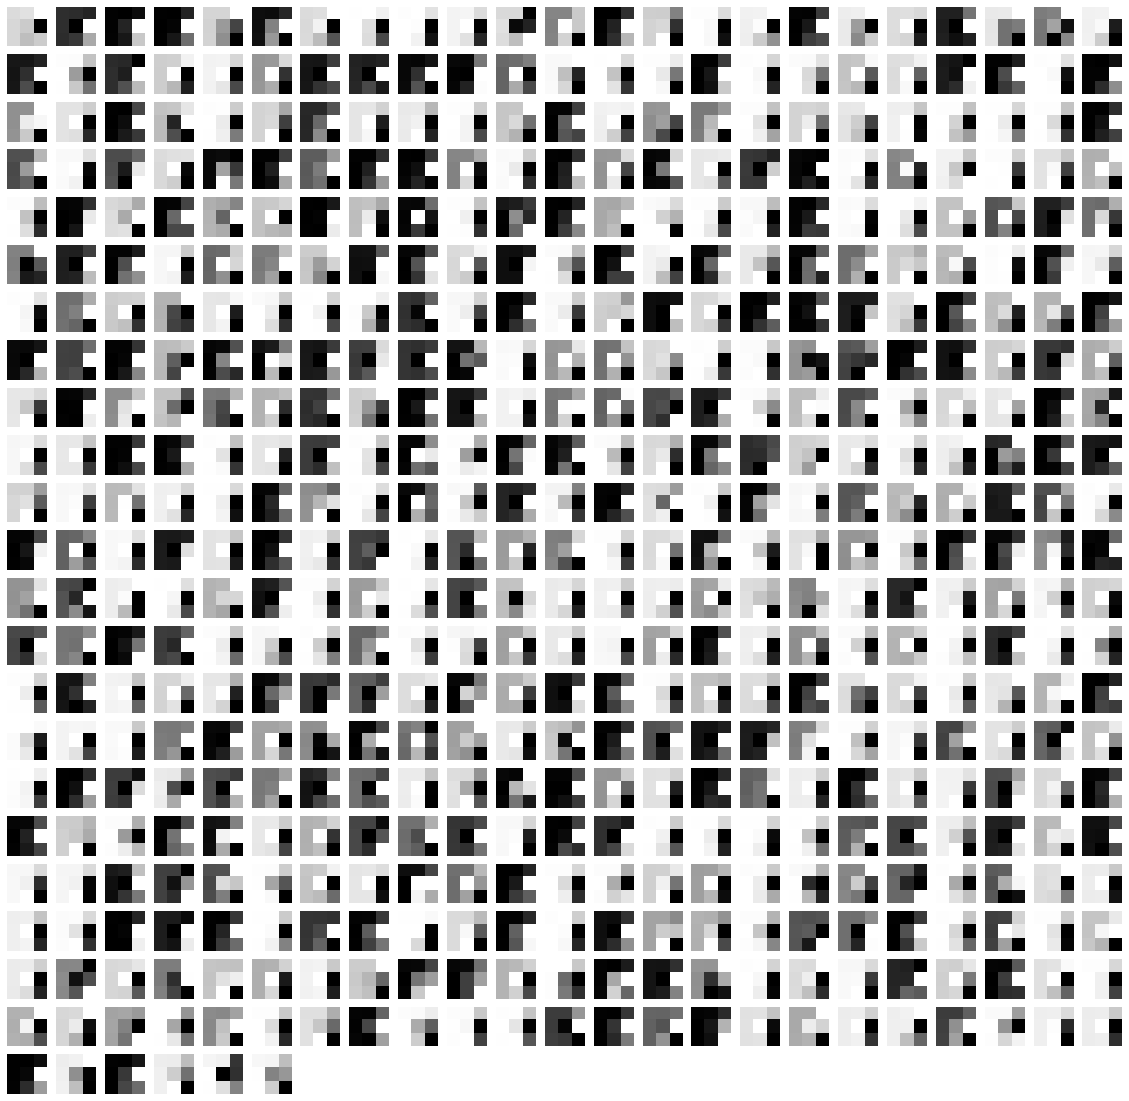

layer4.0.downsample.1  :  torch.Size([1, 512, 8, 8])


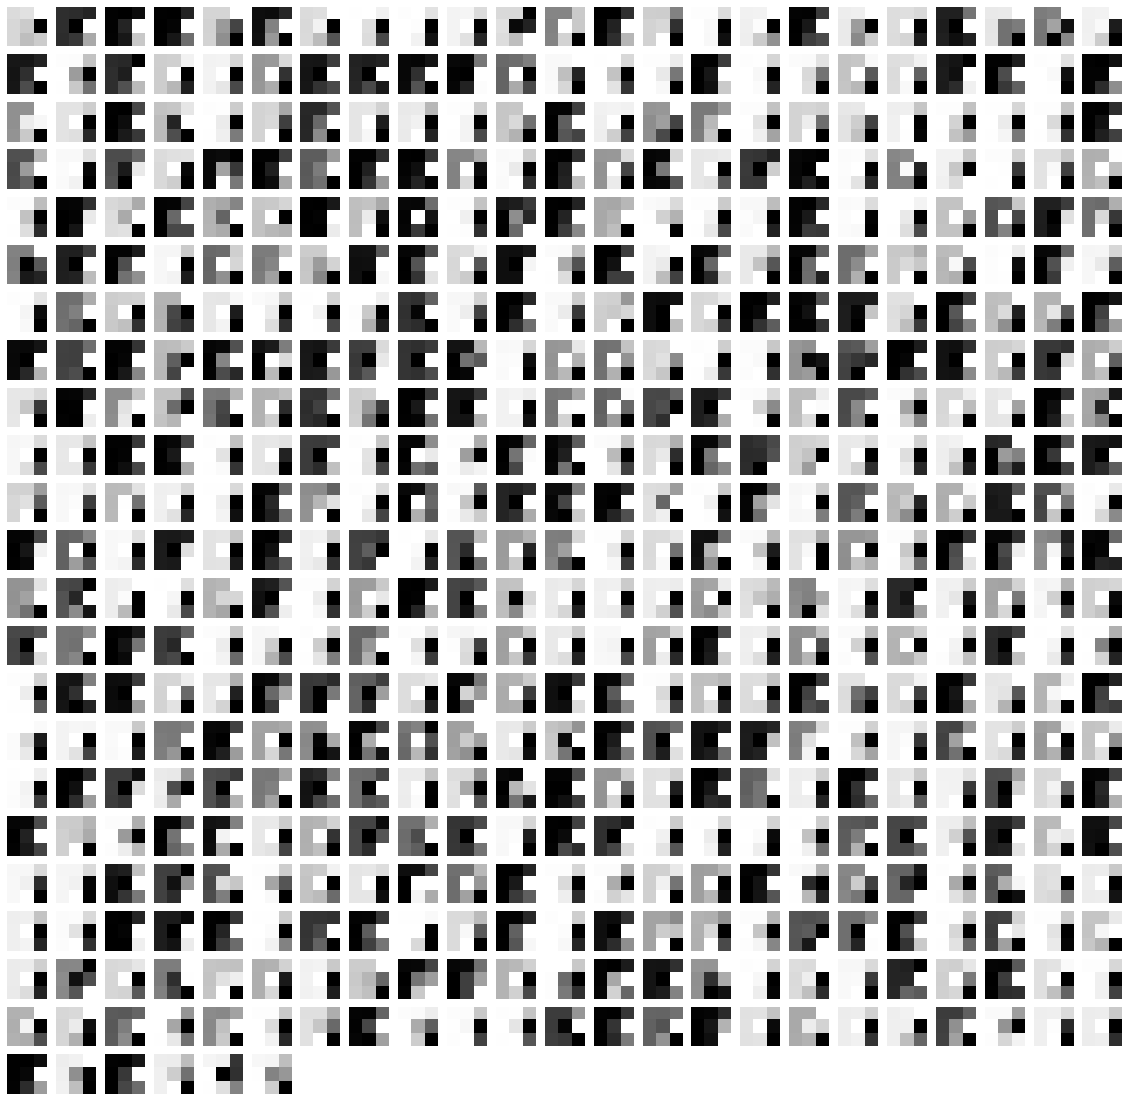

layer4.0.downsample  :  torch.Size([1, 512, 8, 8])


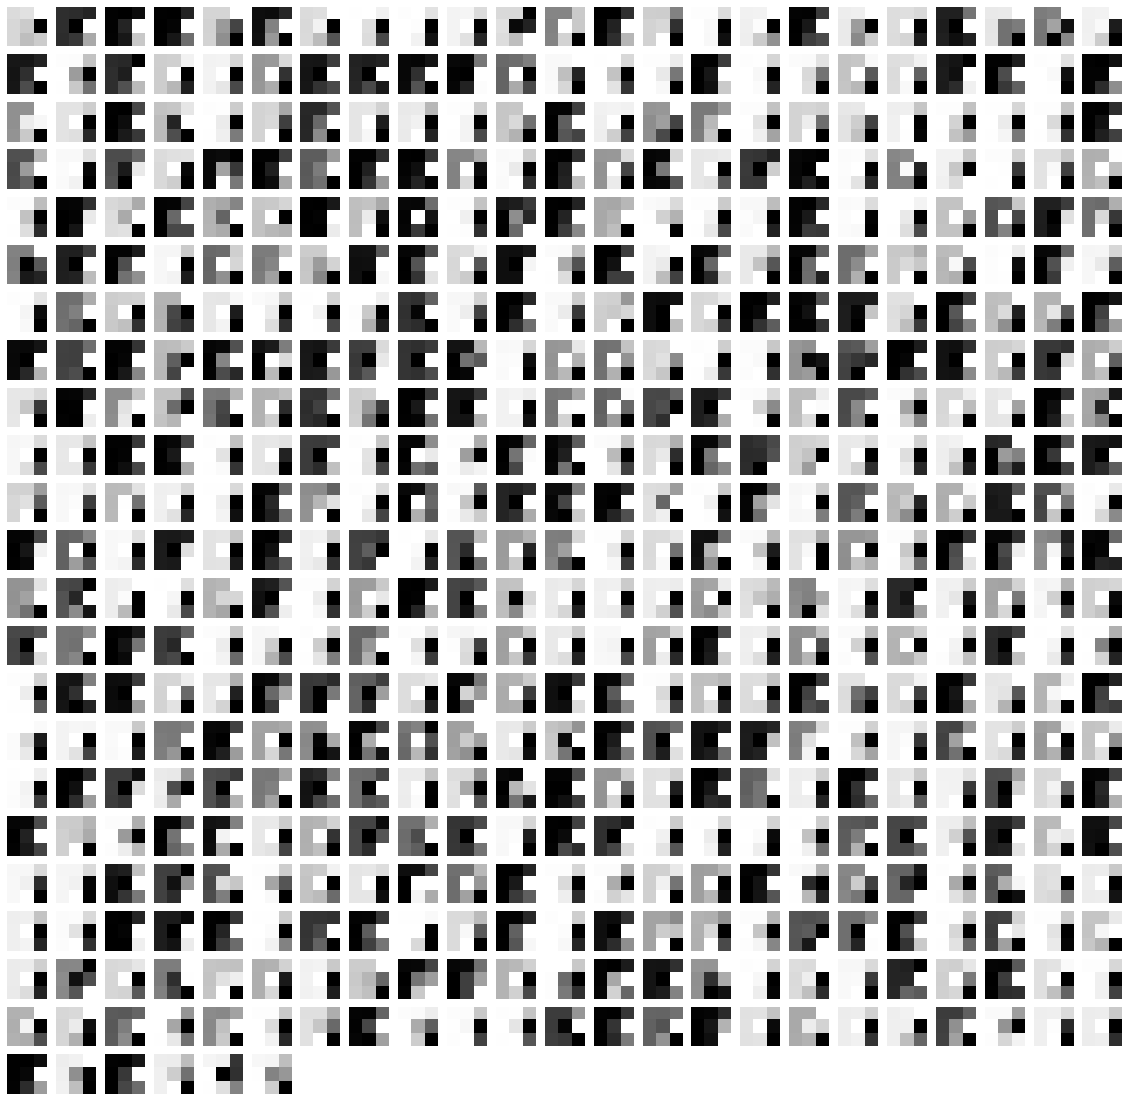

layer4.0  :  torch.Size([1, 512, 8, 8])


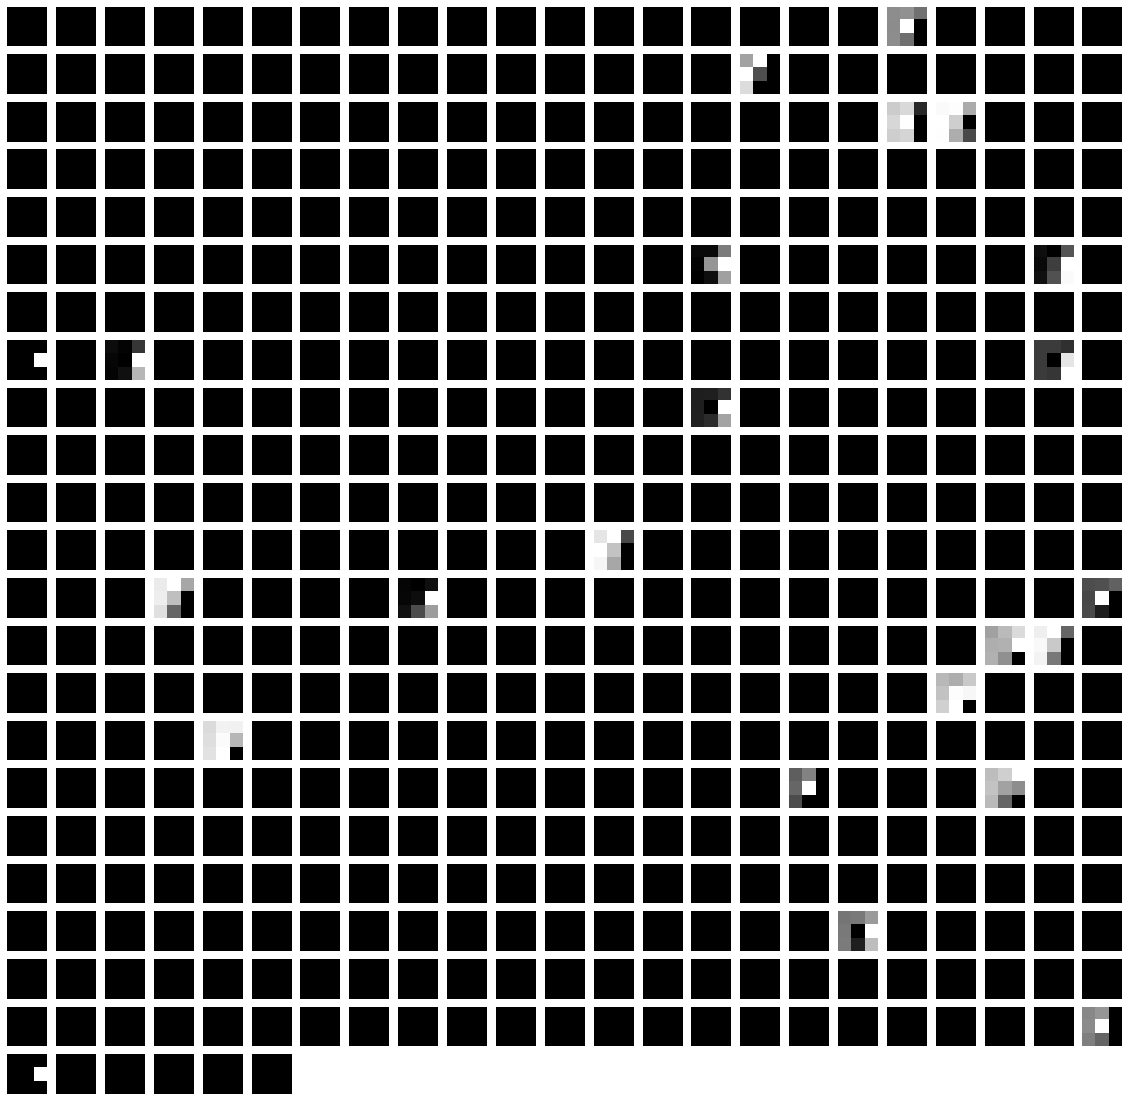

layer4.1.conv1  :  torch.Size([1, 512, 8, 8])


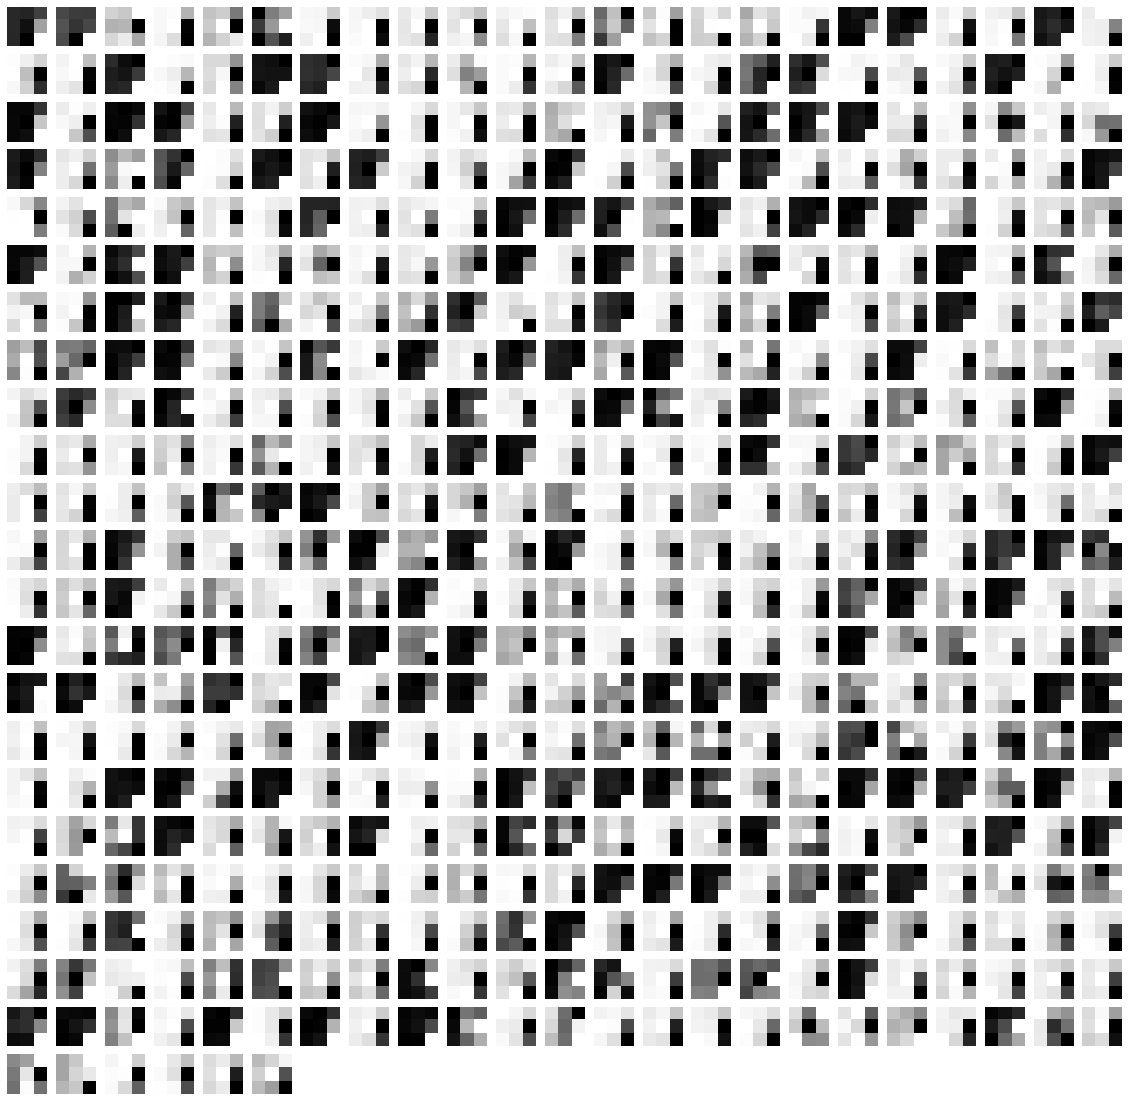

layer4.1.bn1  :  torch.Size([1, 512, 8, 8])


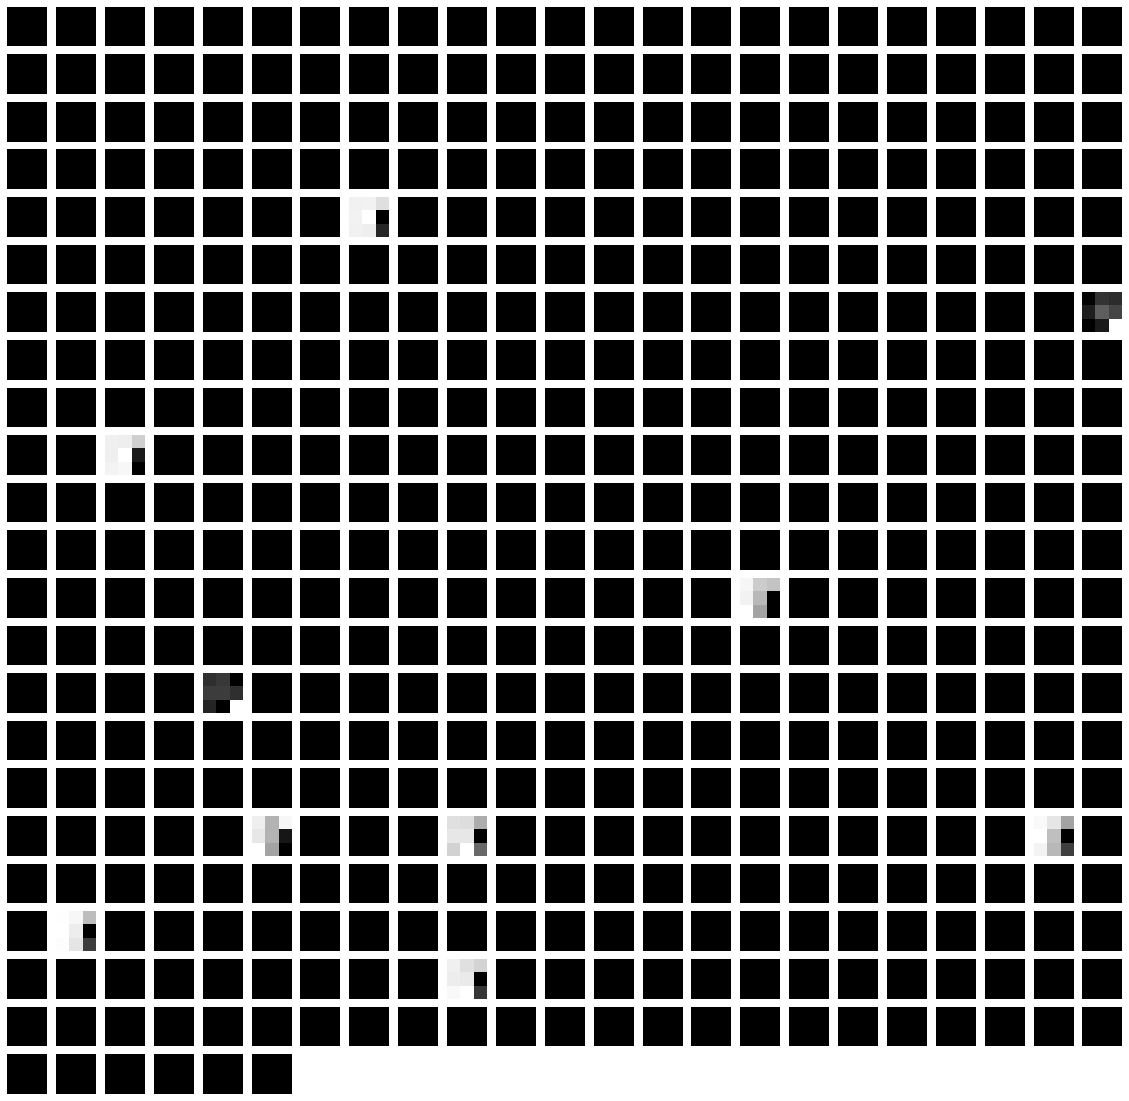

layer4.1.relu  :  torch.Size([1, 512, 8, 8])


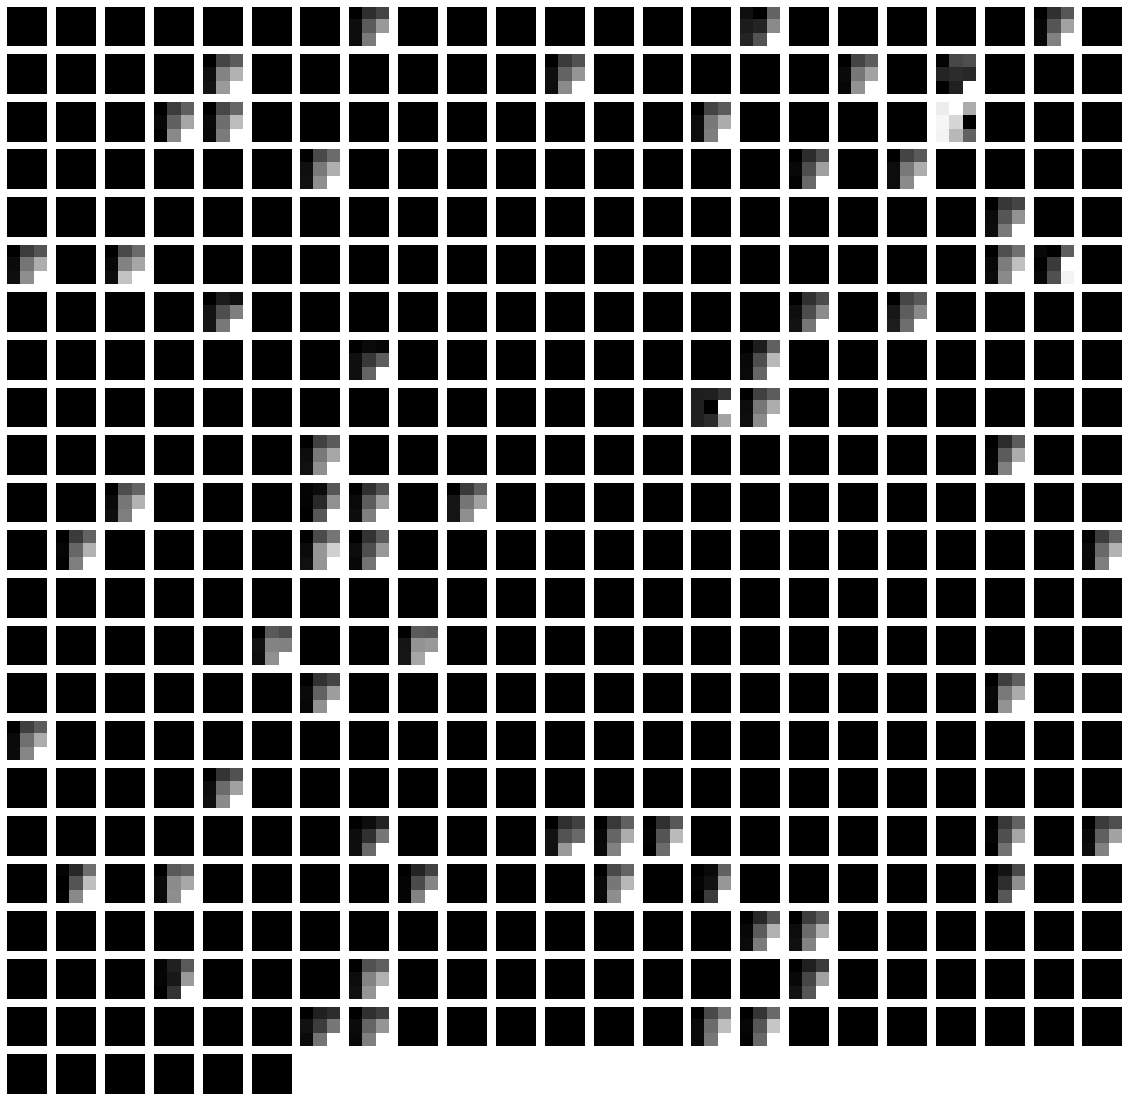

layer4.1.conv2  :  torch.Size([1, 512, 8, 8])


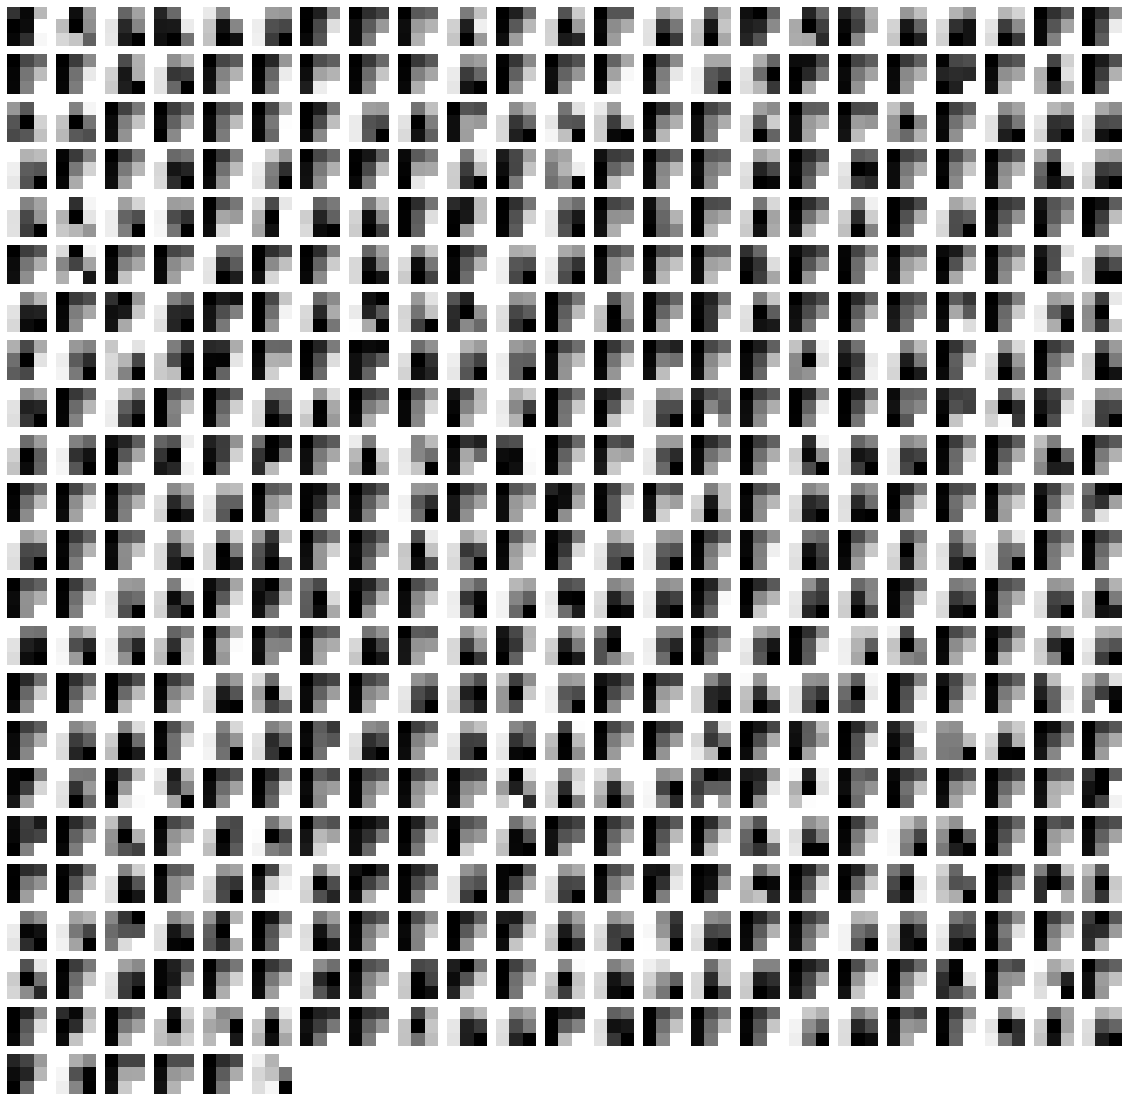

layer4.1.bn2  :  torch.Size([1, 512, 8, 8])


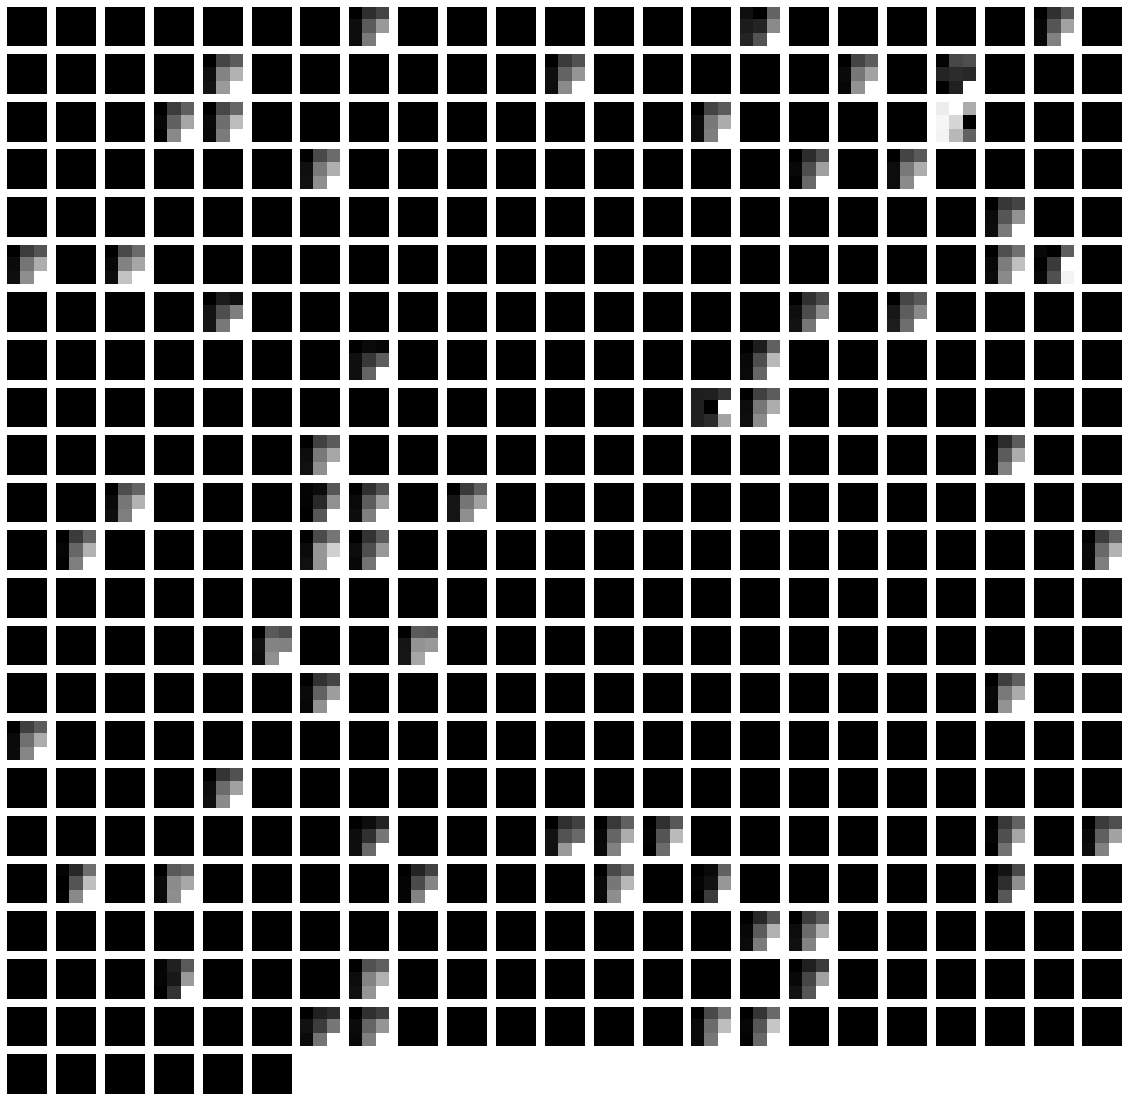

layer4.1  :  torch.Size([1, 512, 8, 8])


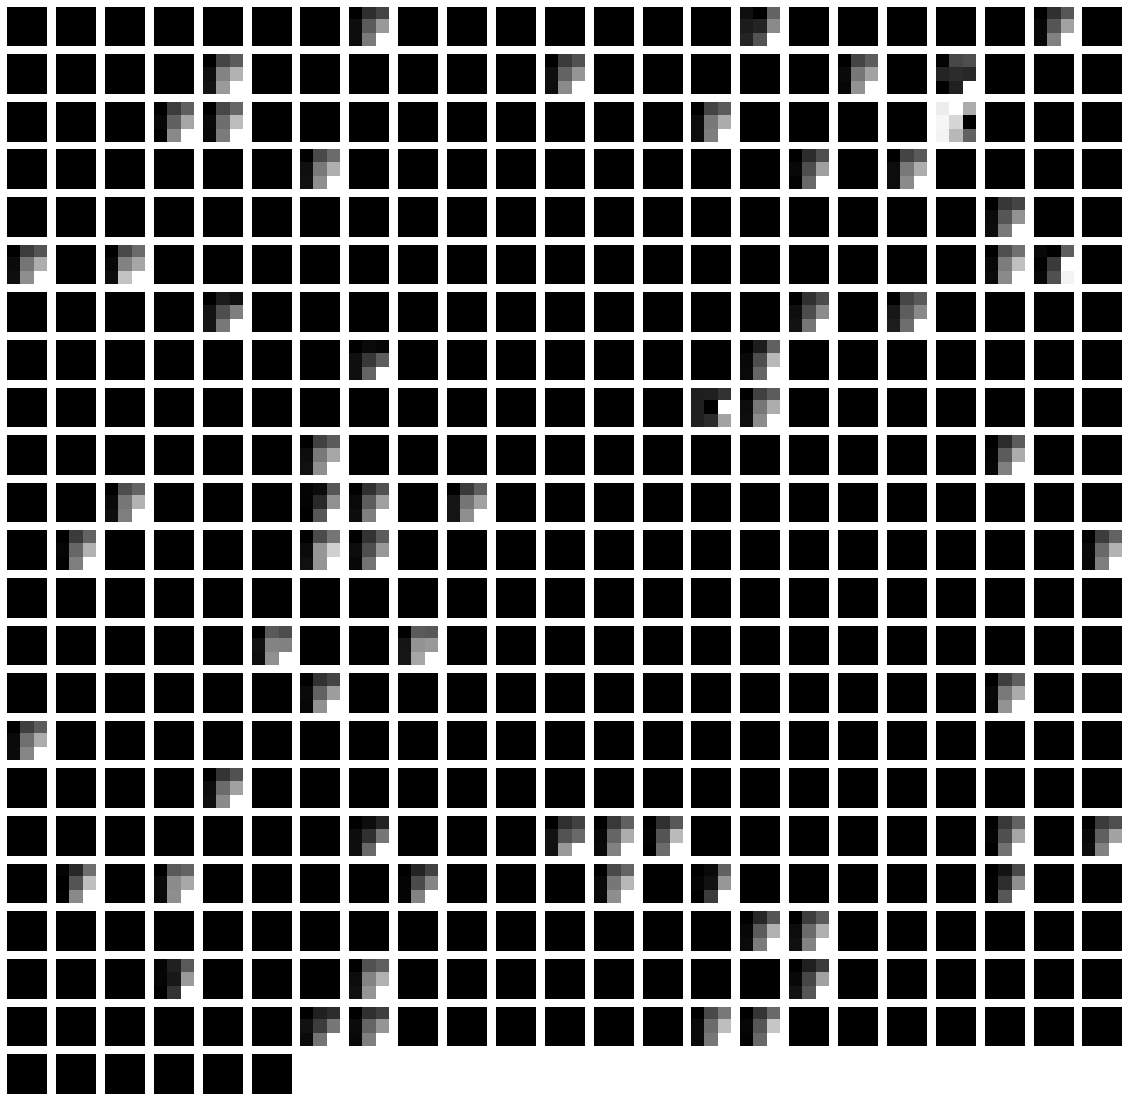

layer4  :  torch.Size([1, 512, 8, 8])


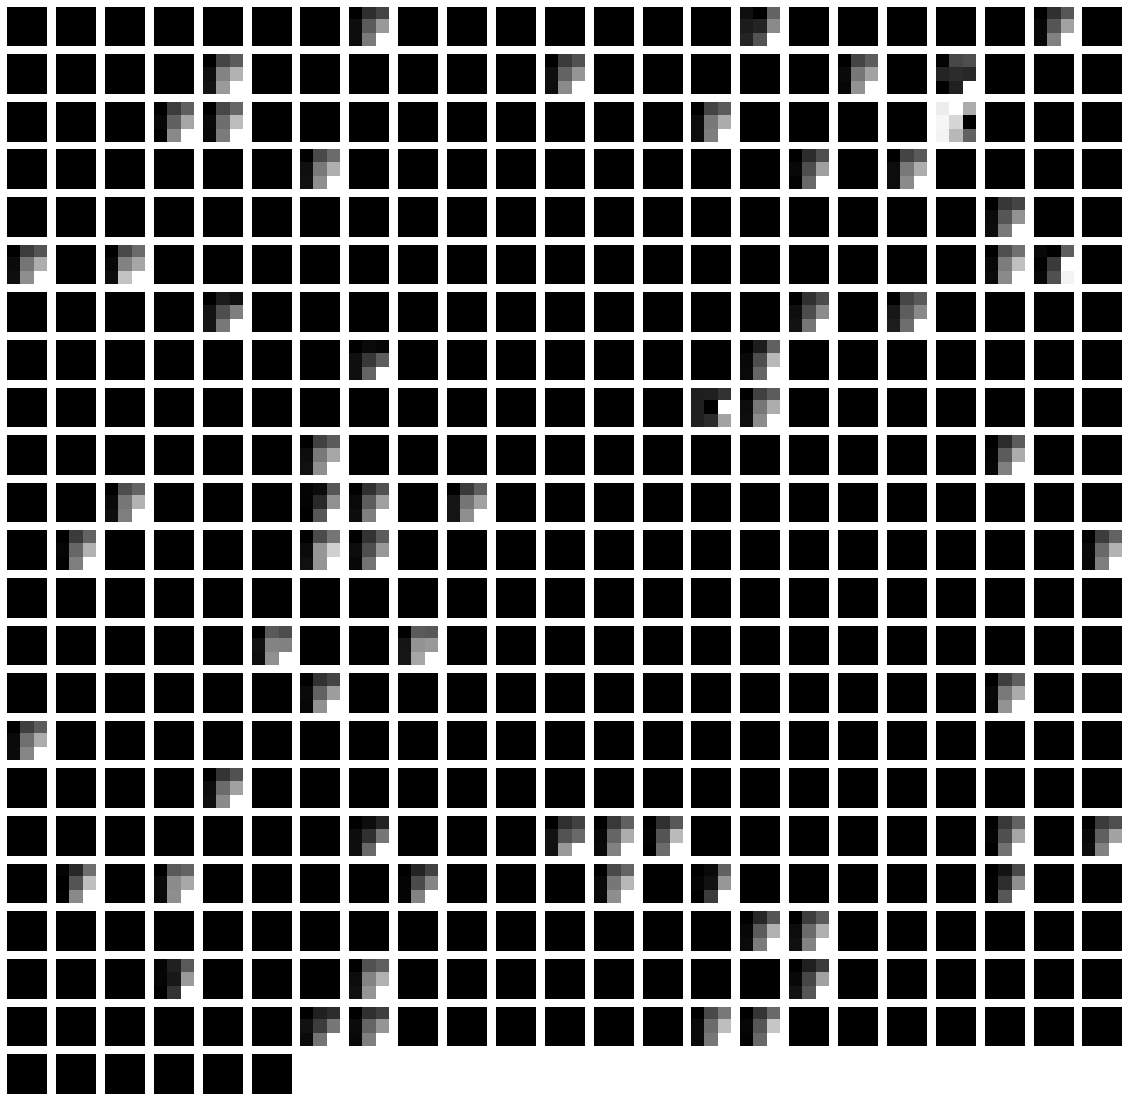

avgpool  :  torch.Size([1, 512, 1, 1])


/home/acd13264yb/jupyter_env/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
/home/acd13264yb/jupyter_env/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.


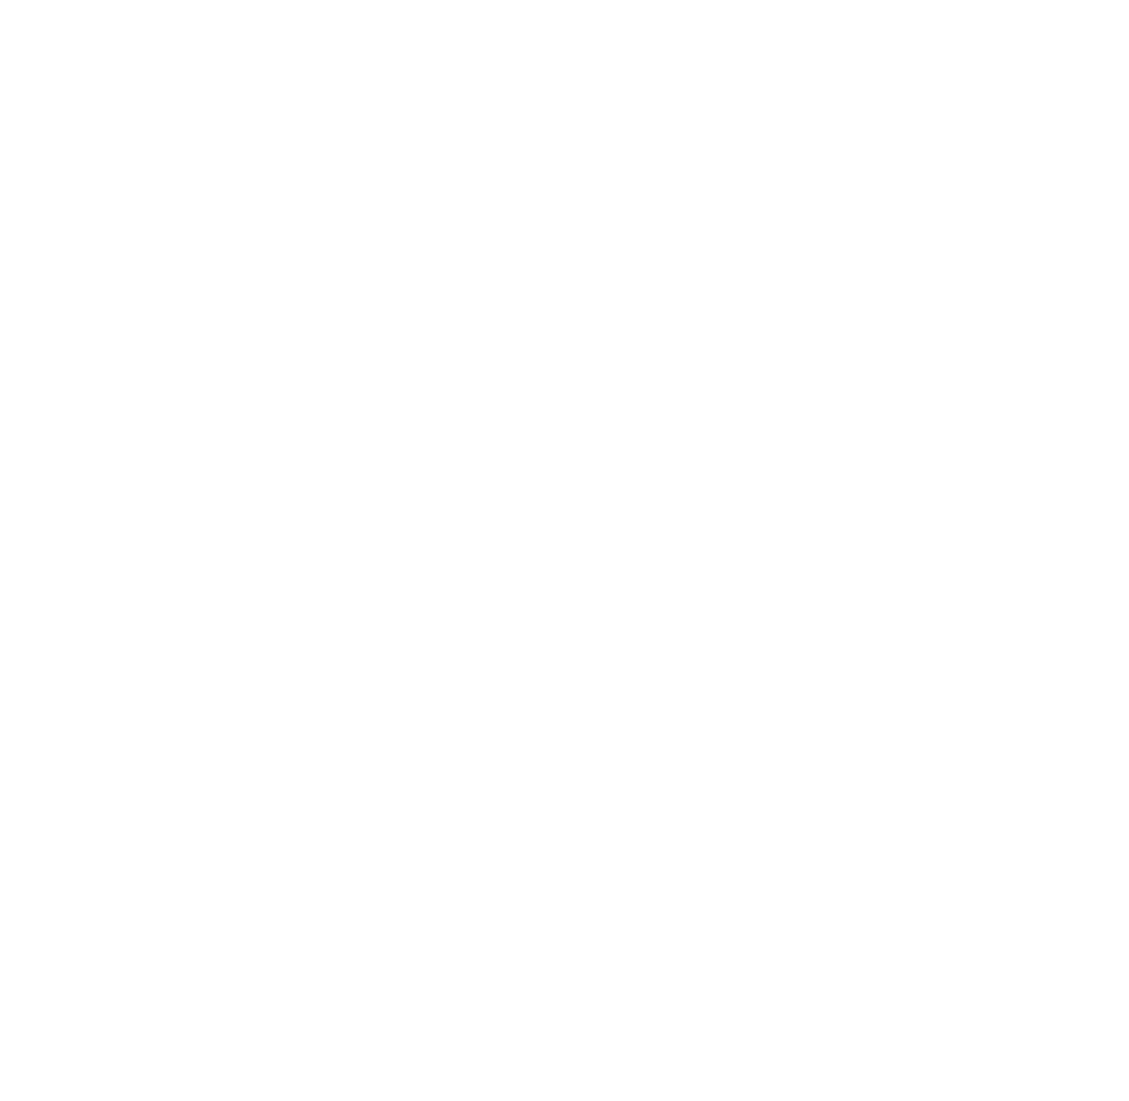

fc.0  :  torch.Size([1, 512])


IndexError: tuple index out of range

In [14]:
feature(img01) # 薬剤なし

In [ ]:
# from PIL.Image import *
# from numpy import *
 
img = random.random((8, 8))
img[1,1]=-4
print(img)
plt.imshow(img,cmap='gray')
plt.show()

img[1,1]=-10
plt.imshow(img,cmap='gray')
plt.show()

img = img*10
plt.imshow(img,cmap='gray')
plt.show()

In [ ]:
import matplotlib.image as mpimg
import imageio
from skimage import io

key="layer1.0.bn2"
bn = feature_activation[key].cpu()
bn = np.array(bn)

i = 6
img = bn[0,i,:,:]
print(img.shape)
print("np.min(img)",np.miwwwn(img))
print("np.max(img)",np.max(img))
print(img)
#     plt.figure(figsize=(20,20))
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
# for key in feature_activation:
#     print(key)
#     bn = feature_activation[key].cpu()
#     bn = np.array(bn)
#     for i in range(bn.shape[1]):
#         savename = "./data/"+str(key)+"/"+str(key)+"_"+str(i)+".tif"
#         plt.savefig(name)
#         cv2.imwrite(savename, bn[0,i,:,:])

# HeatMap可視化

## GradCAM

In [ ]:
class GradCAM(nn.Module):
    def __init__(self):
        super(GradCAM, self).__init__()
        # 获取模型的特征提取层
        self.feature = nn.Sequential(OrderedDict({
                name:layer for name, layer in model.named_children()
                if name not in ['avgpool','fc']
        }))
        # 获取模型最后的平均池化层
        self.avgpool = model.avgpool
        # 获取模型的输出层
        self.classifier = nn.Sequential(OrderedDict([
            ('fc', model.fc),
#             ('softmax', model.softmax)
        ]))
        # 生成梯度占位符
        self.gradients = None
    
    # 获取梯度的钩子函数
    def activations_hook(self, grad):
        self.gradients = grad
    
    def forward(self, x):
        x = self.feature(x)
        # 注册钩子
        h = x.register_hook(self.activations_hook)
        # 对卷积后的输出使用平均池化
        x = self.avgpool(x)
        x = x.view((1,-1))
        x = self.classifier(x)
        return x
    
    # 获取梯度的方法
    def get_activations_gradient(self):
        return self.gradients
    
    # 获取卷积层输出的方法
    def get_activations(self, x):
        return self.feature(x)

In [ ]:
# 获取热力图
def get_heatmap(model, img):
    model.eval()
    img_pre = model(img)
    # 获取预测最高的类别
    pre_class = torch.argmax(img_pre, dim=-1).item()
    # 获取相对于模型参数的输出梯度
    img_pre[:, pre_class].backward()
    # 获取模型的梯度
    gradients = model.get_activations_gradient()
    # 计算梯度相应通道的均值
    mean_gradients = torch.mean(gradients, dim=[0,2,3])
    # 获取图像在相应卷积层输出的卷积特征
    activations = model.get_activations(input_img).detach()
    # 每个通道乘以相应的梯度均值
    for i in range(len(mean_gradients)):
        activations[:,i,:,:] *= mean_gradients[i]
    # 计算所有通道的均值输出得到热力图
    heatmap = torch.mean(activations, dim=1).squeeze()
    # 使用Relu函数作用于热力图
    heatmap = F.relu(heatmap)
    # 对热力图进行标准化
    heatmap /= torch.max(heatmap)
    heatmap = heatmap.cpu().numpy()

    return heatmap

## load image

In [ ]:
# 从测试集中读取一张图片，并显示出来
img_path = '../../Datasets/211202NDAcquisition/CellsNoMask/NDAcquisition-02Nami_x40/NDAcquisition-02Nami_x40_XY001_4.tif'
img02 = cv2.imread(img_path)

plt.figure(figsize=(8,8))
plt.imshow(img02*3)
plt.show()

In [ ]:
cam = GradCAM()
# 获取热力图
heatmap = get_heatmap(cam, input_img)
# 可视化热力图
plt.matshow(heatmap)
plt.show()

In [ ]:
# 合并热力图和原题，并显示结果
def merge_heatmap_image(heatmap, image_path):
    img = cv2.imread(image_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    grad_cam_img = heatmap * 0.4 + img
    grad_cam_img = grad_cam_img / grad_cam_img.max()
    # 可视化图像
    b,g,r = cv2.split(grad_cam_img)
    grad_cam_img = cv2.merge([r,g,b])

    plt.figure(figsize=(8,8))
    plt.imshow(grad_cam_img)
    plt.show()

In [ ]:
# for row in img:
#     print(' '.join(map(str,row)))